In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize']=(10,12)

In [2]:
train_df=pd.read_csv('train (1).csv')
test_df=pd.read_csv('test (1).csv')

print(train_df.shape)
print(test_df.shape)


(69999, 172)
(30000, 171)


In [3]:
train_df['churn']=[1 if i>=0.5 else 0 for i in train_df['churn_probability'] ]

In [4]:
train_df['churn'].value_counts()

0    62867
1     7132
Name: churn, dtype: int64

In [145]:
df1=pd.concat([train_df,test_df])

In [146]:
df1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 29999
Data columns (total 173 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [148]:
#removing the spaces if any in the dataset
df1.columns=df1.columns.to_series().apply(lambda x:x.strip())

In [149]:
# differentiate between Categorical,Numerical, Date and Boolean variables
date_columns=[col for col in df1.columns if df1[col].dtype=="object"]
id_columns=["id",'circle_id']
numeric_columns=[col for col in df1.columns if col not in date_columns+id_columns]

In [150]:
df1[date_columns]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
29995,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/27/2014,8/29/2014,6/19/2014,NaN,NaN
29996,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/24/2014,8/29/2014,NaN,7/10/2014,NaN
29997,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/30/2014,NaN,NaN,NaN
29998,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/18/2014,8/31/2014,NaN,NaN,NaN


In [151]:
#making change in the date format
for i in date_columns:
    df1[i]=pd.to_datetime(df1[i])

In [152]:
#I am not considering the date columns for the further analysis
dates=df[date_columns]
df1=df1.drop(columns=dates)

KeyError: "None of [Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',\n       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',\n       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',\n       'date_of_last_rech_data_8'],\n      dtype='object')] are in the [columns]"

In [153]:
#there can be columns which are only having single category or number in data
to_drop=list(filter(lambda x :len(df1[x].value_counts())<2,df1.columns))

In [154]:
to_drop

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [155]:
df1=df1.drop(columns=to_drop)

**Our target is to find the churn rate for the next month that is in the 9th month of the Data since we dont have the data for 9th month we are using**

**Let us filter the customers who dont have incoming outgoing 2g 3g for month 8th that would be called as churned customers**

In [158]:
df1 = train_df.loc[:,['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']]
df1

,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8
0,40.56,3.63,0.00,0.00
1,25.04,31.66,0.00,0.00
2,36.64,0.00,0.00,0.00
3,83.84,53.84,0.00,0.00
4,28.31,15.76,213.47,0.00
...,...,...,...,...
69994,269.56,392.58,144.31,0.00
69995,136.01,280.69,0.00,0.00
69996,414.54,342.29,0.00,0.00
69997,17.76,19.28,44.64,658.19


In [159]:
churned_ids=train_df.loc[(df1.total_ic_mou_8 == 0.00)
                            & (df1.total_og_mou_8 == 0.00)
                            & (df1.vol_2g_mb_8 == 0.00)
                            & (df1.vol_3g_mb_8 == 0.00), ['id']
                          ]


In [160]:

churned_ids['churn']=1
churned_ids['churn'].value_counts()

1    5490
Name: churn, dtype: int64

In [161]:
churned_ids.columns

Index(['id', 'churn'], dtype='object')

In [162]:
churn = pd.merge(train_df, churned_ids, how='outer', on='id')
train_df['churn'] = train_df['churn'].fillna(0)


In [163]:
df=train_df.copy()

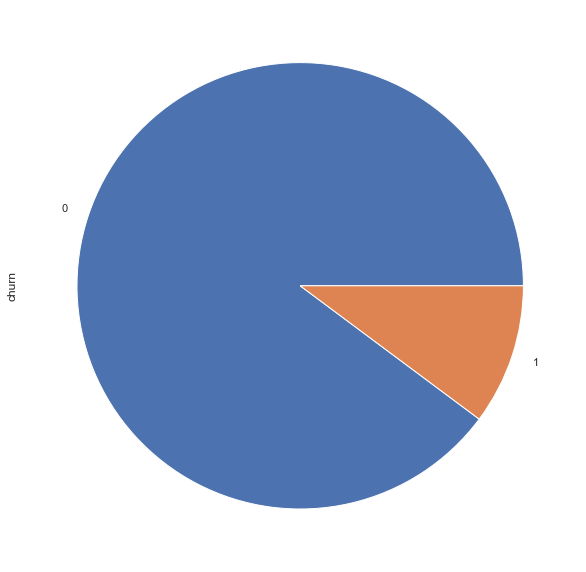

In [164]:
(df.churn.value_counts(normalize=True)*100).plot(kind='pie');

In [165]:
# Removing the less than zero from the data
df = df.loc[(df.arpu_6 > 0) & (df.arpu_7 > 0) & (df.arpu_8 >0)]
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.0,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,0.0,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.00,0.00,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,6/15/2014,7/21/2014,8/25/2014,110,110,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [166]:
cat_columns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6", "fb_user_7", "fb_user_8"]
df[cat_columns].isna().sum()/len(df)

night_pck_user_6    0.739389
night_pck_user_7    0.730965
night_pck_user_8    0.720197
fb_user_6           0.739389
fb_user_7           0.730965
fb_user_8           0.720197
dtype: float64

In [167]:
df[cat_columns]=df[cat_columns].fillna(0)

In [168]:
df.isnull().sum()/len(churn)

id                          0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.002643
std_og_t2o_mou              0.002643
loc_ic_t2o_mou              0.002643
last_date_of_month_6        0.000000
last_date_of_month_7        0.000000
last_date_of_month_8        0.000000
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
onnet_mou_6                 0.007729
onnet_mou_7                 0.006614
onnet_mou_8                 0.007643
offnet_mou_6                0.007729
offnet_mou_7                0.006614
offnet_mou_8                0.007643
roam_ic_mou_6               0.007729
roam_ic_mou_7               0.006614
roam_ic_mou_8               0.007643
roam_og_mou_6               0.007729
roam_og_mou_7               0.006614
roam_og_mou_8               0.007643
loc_og_t2t_mou_6            0.007729
loc_og_t2t_mou_7            0.006614
loc_og_t2t_mou_8            0.007643
loc_og_t2m_mou_6            0.007729
l

In [169]:
import regex
df1=df.filter(regex='6')

In [170]:
df1.columns

Index(['last_date_of_month_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6',
       'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6',
       'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6',
       'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user

In [171]:

# Merging the related columns(outgoing calls)
df['loc_og_t_mou_6']=df.loc_og_t2t_mou_6+df.loc_ic_t2f_mou_6+df.loc_ic_t2m_mou_6+df.loc_og_t2c_mou_6
df['loc_og_t_mou_7']=df.loc_og_t2t_mou_7+df.loc_ic_t2f_mou_7+df.loc_ic_t2m_mou_7+df.loc_og_t2c_mou_7
df['loc_og_t_mou_8']=df.loc_og_t2t_mou_8+df.loc_ic_t2f_mou_8+df.loc_ic_t2m_mou_8+df.loc_og_t2c_mou_8

df=df.drop(columns=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6',
                    'loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'])

In [172]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,loc_og_t_mou_6,loc_og_t_mou_7,loc_og_t_mou_8
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,0,3.06,21.08,17.19
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,0.0,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.00,0.00,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,6/15/2014,7/21/2014,8/25/2014,110,110,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0,0,68.21,48.98,65.17
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6

In [173]:
df.filter(regex='std_og').columns

Index(['std_og_t2o_mou', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'],
      dtype='object')

In [174]:
df['std_og_t_mou_6']=df.std_og_t2t_mou_6+df.std_ic_t2f_mou_6+df.std_ic_t2m_mou_6+df.std_og_t2c_mou_6
df['std_og_t_mou_7']=df.std_og_t2t_mou_7+df.std_ic_t2f_mou_7+df.std_ic_t2m_mou_7+df.std_og_t2c_mou_7
df['std_og_t_mou_8']=df.std_og_t2t_mou_8+df.std_ic_t2f_mou_8+df.std_ic_t2m_mou_8+df.std_og_t2c_mou_8
df=df.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8'])

In [175]:
for i in date_columns:
    df[i]=pd.to_datetime(df[i])
#I am not considering the date columns for the further analysis
dates=df[date_columns]
df=df.drop(columns=dates)

In [176]:
# Merging telephone local Incoming calls
df['loc_ic_mou_t_6']=df['loc_ic_t2t_mou_6']+df['loc_ic_t2m_mou_6']+df['loc_ic_t2f_mou_6']
df['loc_ic_mou_t_7']=df['loc_ic_t2t_mou_7']+df['loc_ic_t2m_mou_7']+df['loc_ic_t2f_mou_7']
df['loc_ic_mou_t_8']=df['loc_ic_t2t_mou_8']+df['loc_ic_t2m_mou_8']+df['loc_ic_t2f_mou_8']

df=df.drop(columns=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'])

In [177]:
# Merging telephone std Incoming calls
df['std_ic_mou_t_6']=df['std_ic_t2t_mou_6']+df['std_ic_t2m_mou_6']+df['std_ic_t2f_mou_6']
df['std_ic_mou_t_7']=df['std_ic_t2t_mou_7']+df['std_ic_t2m_mou_7']+df['std_ic_t2f_mou_7']
df['std_ic_mou_t_8']=df['std_ic_t2t_mou_8']+df['std_ic_t2m_mou_8']+df['std_ic_t2f_mou_8']

df=df.drop(columns=['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8'])

In [178]:
df.filter(regex='rech').columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [179]:
df[['total_rech_data_6', 'total_rech_data_7', 
    'total_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']]=df[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                                                                                               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']].fillna(0)

In [180]:
df['total_recharge_amt_data_6']=df.av_rech_amt_data_6*df.total_rech_data_6
df['total_recharge_amt_data_7']=df.av_rech_amt_data_7*df.total_rech_data_7

In [181]:
df['total_avg_recharge_amount_6_7_months']=(df.total_recharge_amt_data_6+df.total_recharge_amt_data_7+
                                            df.total_rech_amt_7+df.total_recharge_amt_data_7)/2

In [182]:
df[["id","total_avg_recharge_amount_6_7_months"]]

,id,total_avg_recharge_amount_6_7_months
0,0,32.5
3,3,120.0
4,4,2017.5
5,5,45.0
6,6,0.0
...,...,...
69994,69994,1143.5
69995,69995,156.5
69996,69996,125.0
69997,69997,467.5


In [183]:
high_valued_customers=df['total_avg_recharge_amount_6_7_months'].quantile(0.7)

high_valued_customers=df[df['total_avg_recharge_amount_6_7_months']>high_valued_customers]

In [184]:
high_valued_customers

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,loc_og_t_mou_6,loc_og_t_mou_7,loc_og_t_mou_8,std_og_t_mou_6,std_og_t_mou_7,std_og_t_mou_8,loc_ic_mou_t_6,loc_ic_mou_t_7,loc_ic_mou_t_8,std_ic_mou_t_6,std_ic_mou_t_7,std_ic_mou_t_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_avg_recharge_amount_6_7_months
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.00,15.73,0.0,0.00,58.91,25.94,15.76,4.35,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0,0,26.25,22.64,31.76,0.00,0.00,0.00,21.53,9.35,28.29,0.00,0.00,0.00,1225.0,1337.0,2017.5
7,7,109,0.0,0.0,0.0,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,24.78,15.21,41.33,0.0,0.0,0.0,0.33,0.68,2.49,25.11,15.89,43.83,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,2,3,2,198,198,198,198,198,198,198,198,0,1.0,1.0,1.0,198.0,198.0,198.0,1.0,1.0,1.0,0.0,0.0,0.0,198.0,198.0,198.0,167.53,6.29,5.40,177.90,151.58,271.40,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0,0,13.41,9.16,12.87,0.33,0.68,2.49,24.77,15.20,41.31,0.33,0.68,2.49,198.0,198.0,396.0
23,23,109,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.00,0.00,0.0,0.00,950.91,822.78,387.79,202.08,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.00,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,455,0.00,0.00,0.00,0,0,1017.62,703.28,173.38,207.03,0.00,0.00,391.37,448.20,202.88,207.03,0.00,0.00,0.0,0.0,495.0
27,27,109,0.0,0.0,0.0,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,182.83,0.00,0.0,0.00,0.00,0.0,0.00,139.21,170.21,195.51,2.53,0.00,0.00,0.00,0.00,0.00,0.0

In [185]:
df.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,loc_og_t_mou_6,loc_og_t_mou_7,loc_og_t_mou_8,std_og_t_mou_6,std_og_t_mou_7,std_og_t_mou_8,loc_ic_mou_t_6,loc_ic_mou_t_7,loc_ic_mou_t_8,std_ic_mou_t_6,std_ic_mou_t_7,std_ic_mou_t_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_avg_recharge_amount_6_7_months
count,61847.000000,61847.0,61662.0,61662.0,61662.0,61847.000000,61847.000000,61847.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61847.000000,61847.000000,61847.000000,61306.000000,61384.000000,61312.000000,61306.0,61384.0,61312.0,61306.000000,61384.000000,61312.000000,61847.000000,61847.000000,61847.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.00000,61312.000000,61306.000000,61384.000000,61312.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,16118.000000,16639.000000,17305.000000,16118.000000,16639.000000,17305.000000,16118.000000,16639.000000,17305.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,16118.000000,16639.000000,17305.000000,16118.000000,16639.000000,17305.000000,61847.000000,61847.00000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61847.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.00000,61312.000000,61306.000000,61384.000000,61312.000000,61306.000000,61384.000000,61312.000000,61847.000000,61847.000000,61847.000000
mean,35047.252963,109.0,0.0,0.0,0.0,297.212811,299.783320,298.805391,135.059398,139.819981,135.375891,203.137428,206.463610,200.640003,9.887068,7.206709,7.208357,14.228333,10.041909,10.012724,150.753827,150.111337,147.606313,169.173399,181.982812,174.230378,0.814509,0.827317,0.845019,3.964697,5.059229,5.039739,0.450631,0.025755,0.035

In [186]:
def plot_box(df,numeric_variable):
    sns.boxplot(y=df[numeric_variable])
    plt.title('Distribution of'+numeric_variable)
    plt.show()

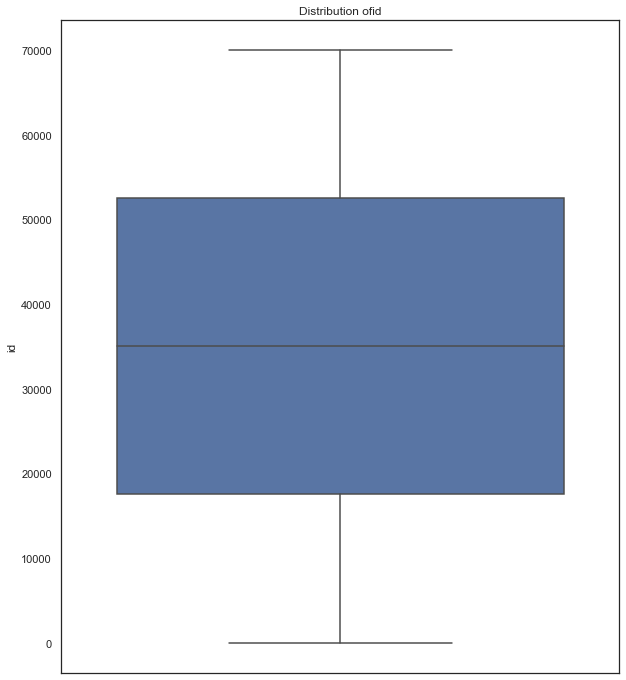

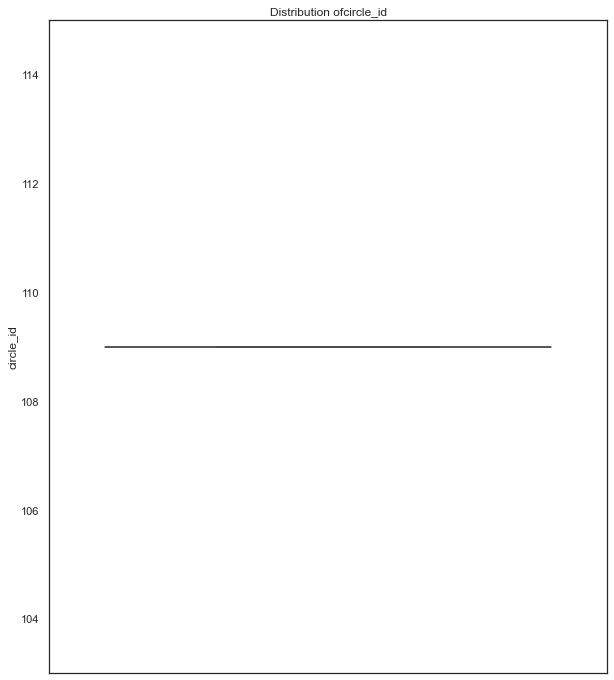

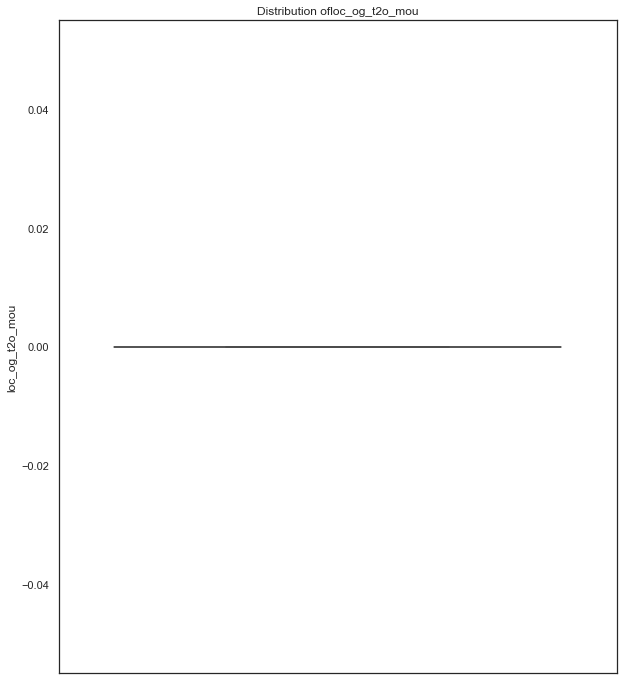

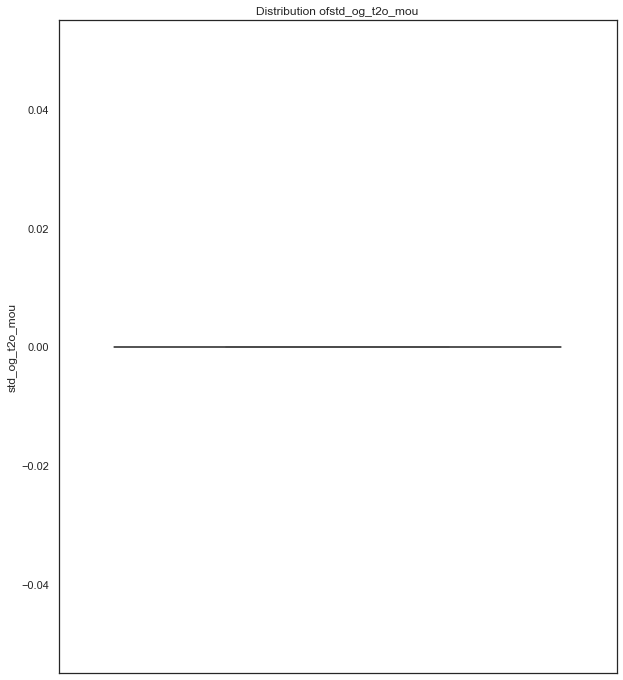

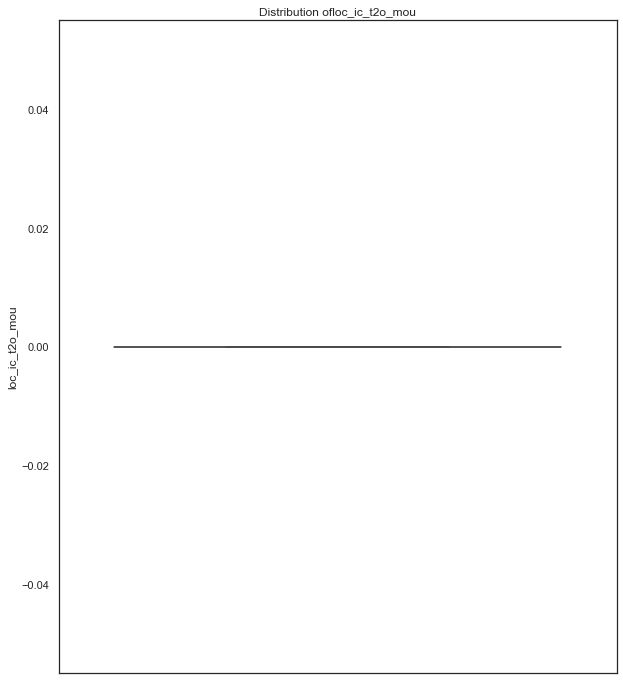

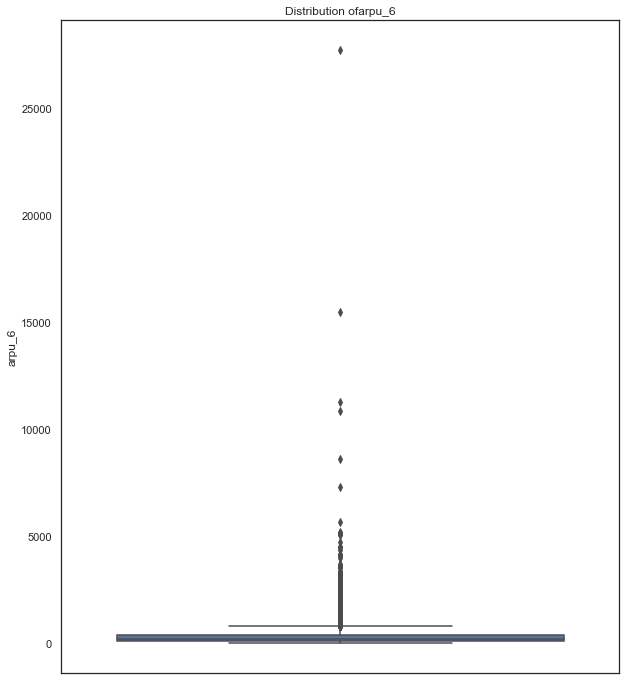

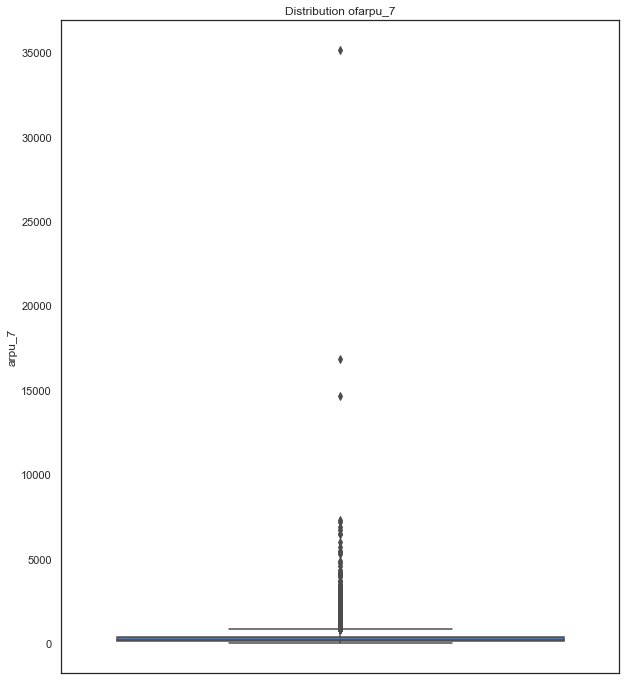

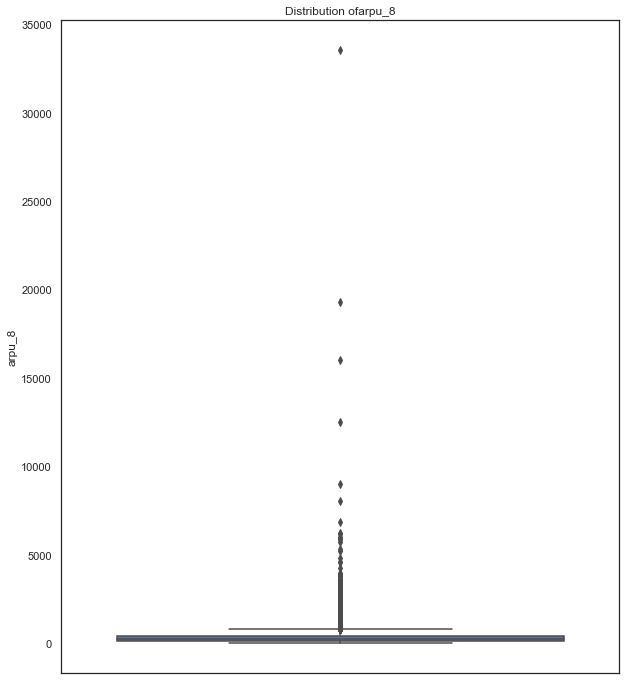

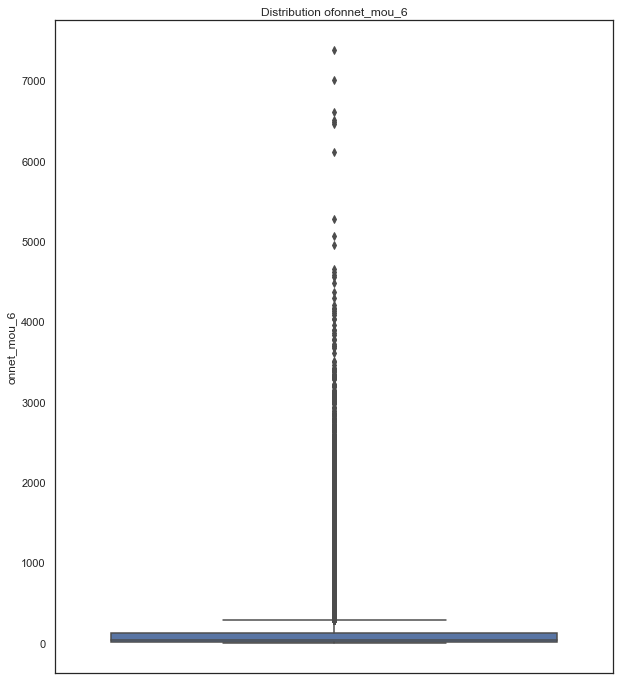

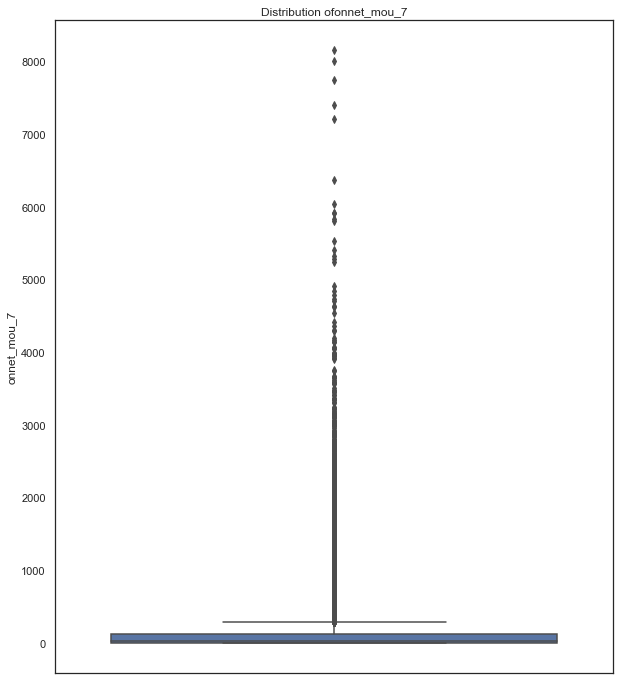

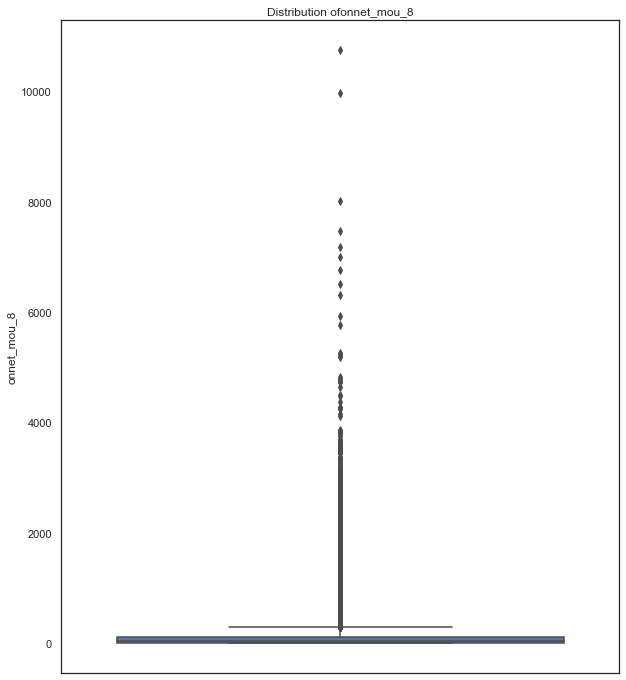

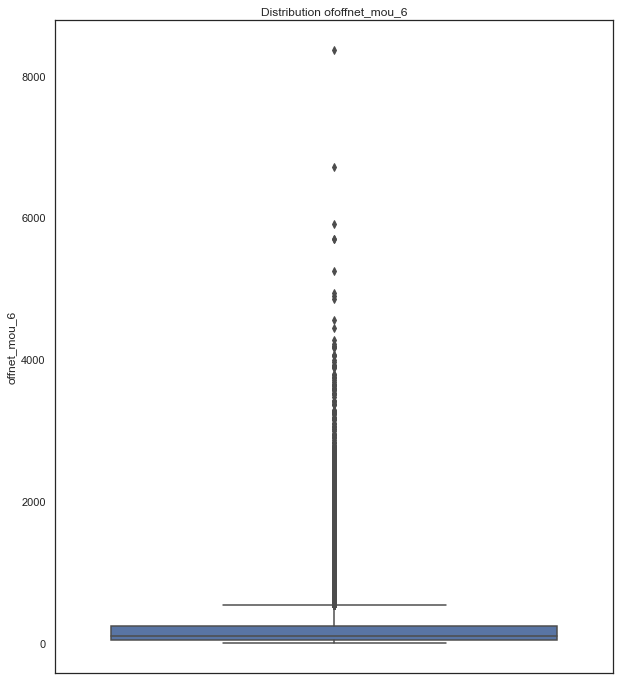

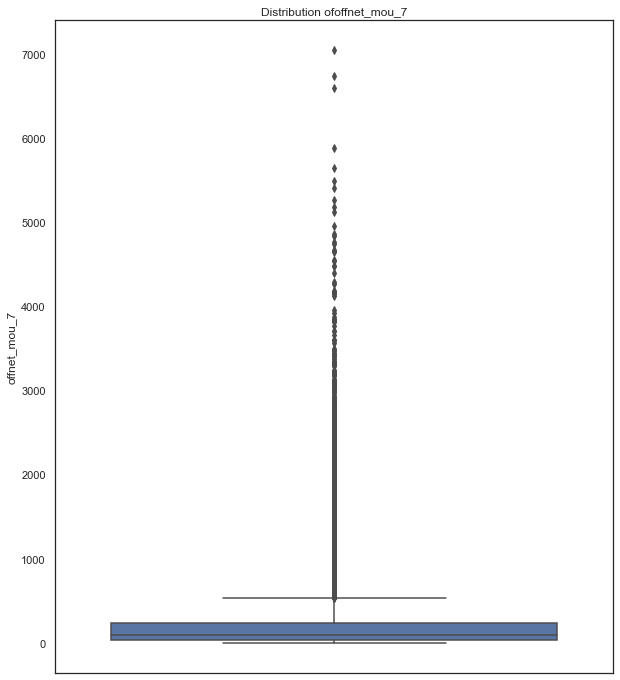

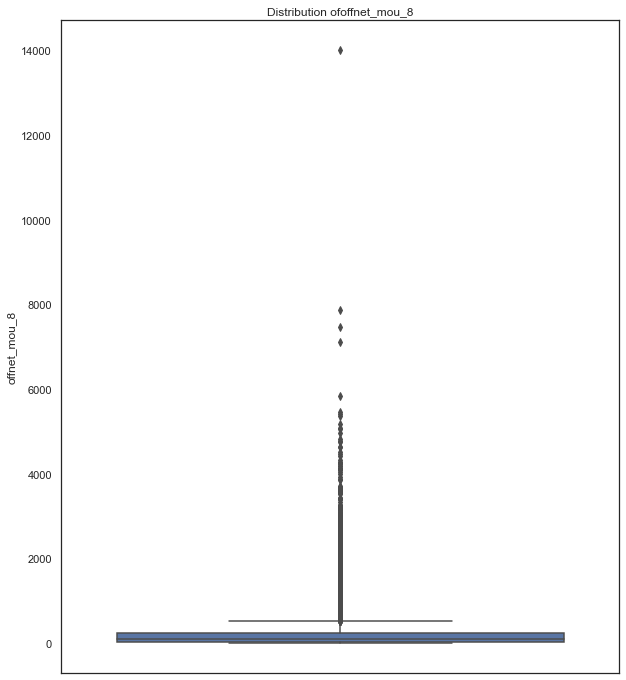

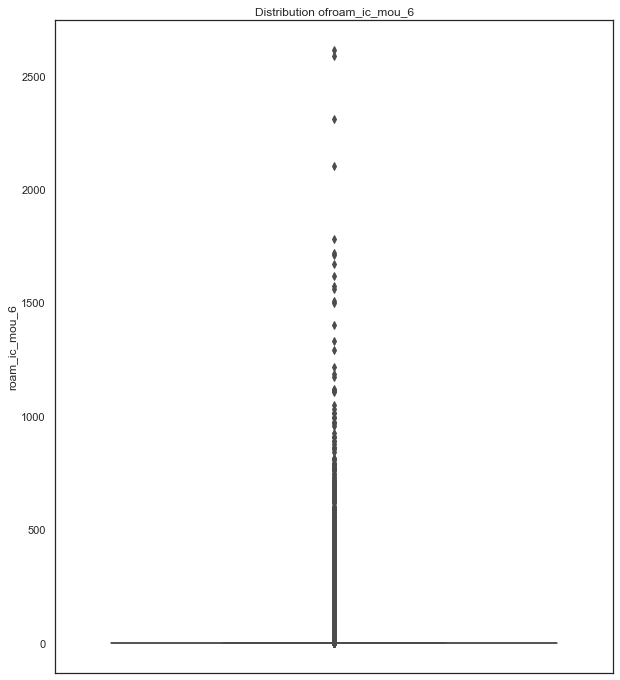

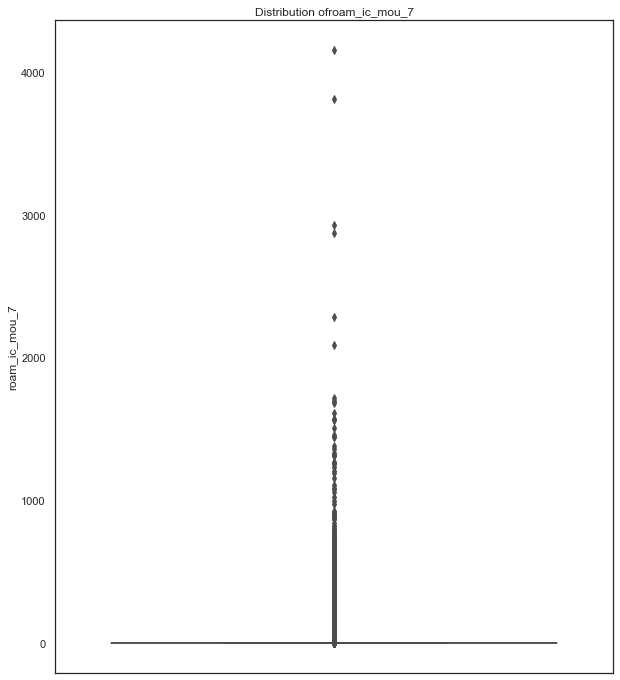

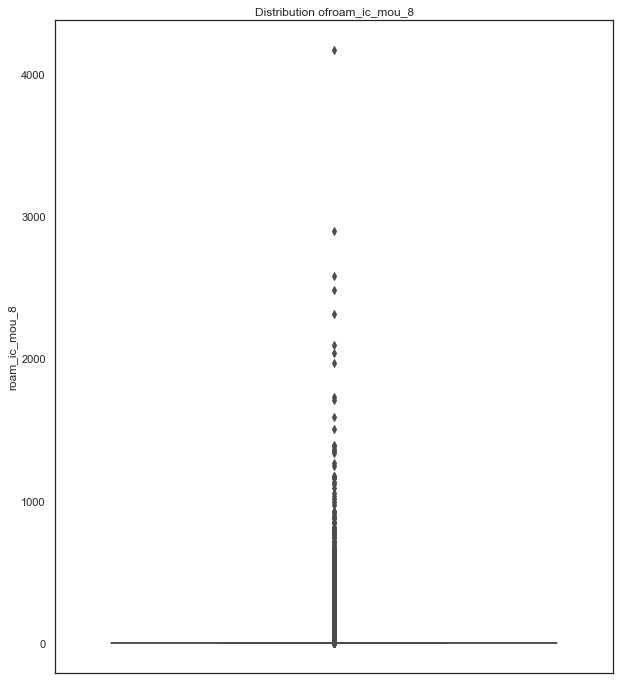

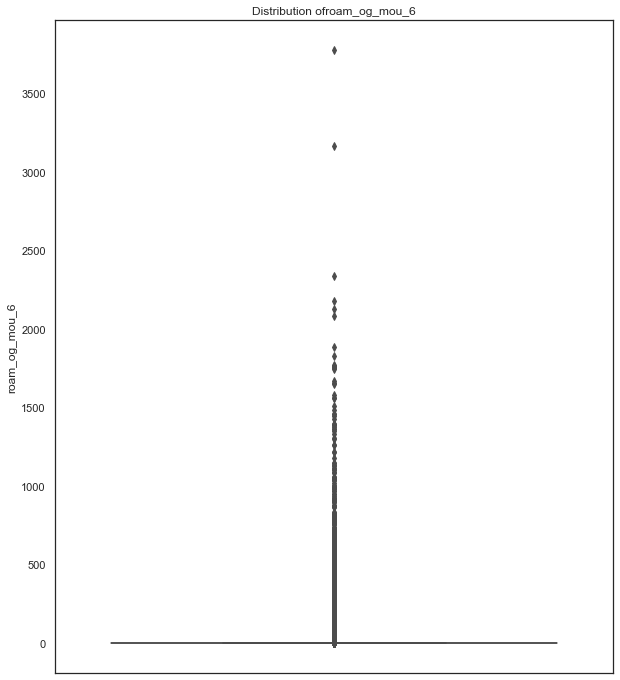

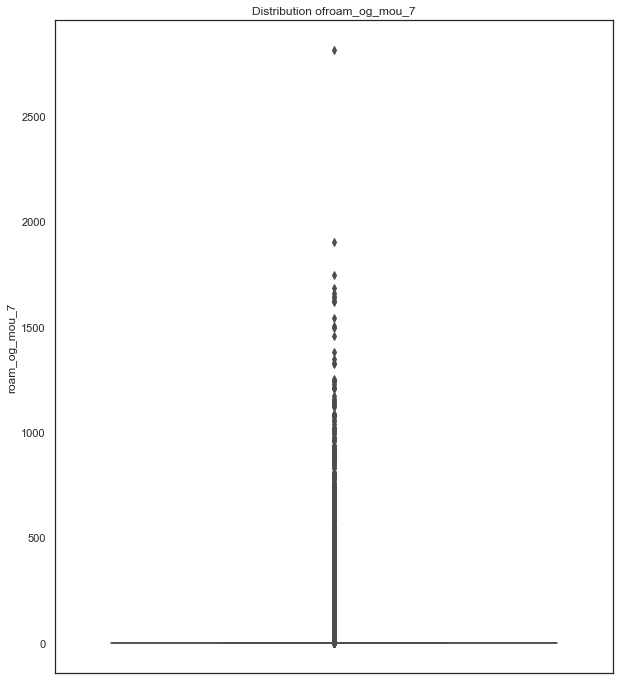

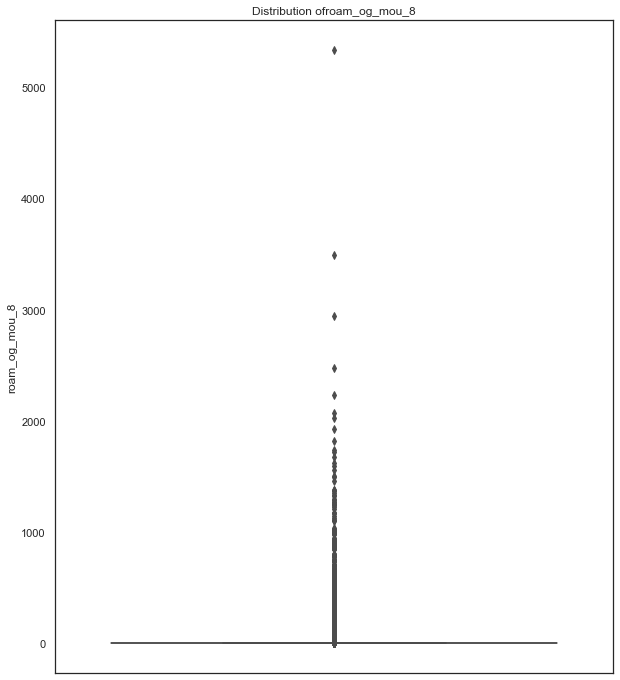

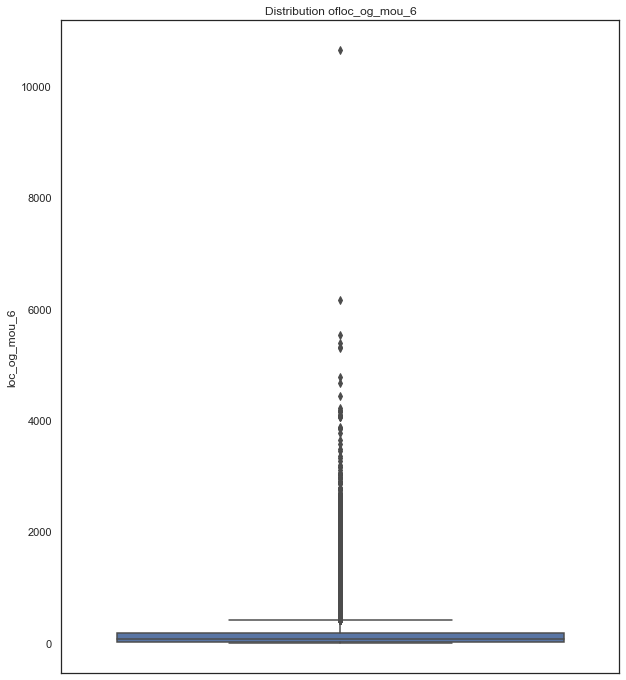

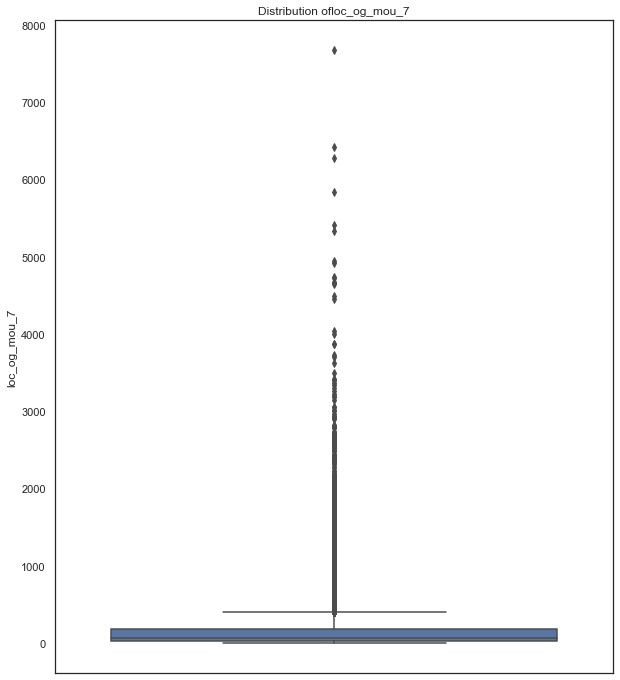

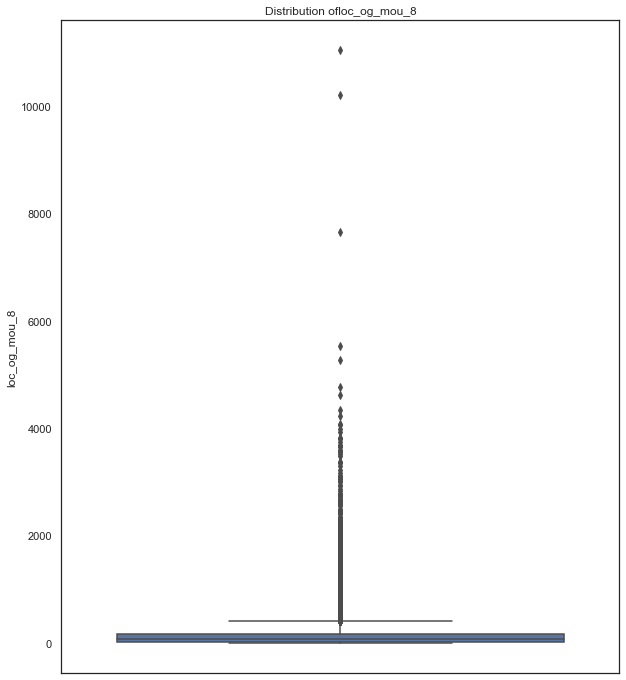

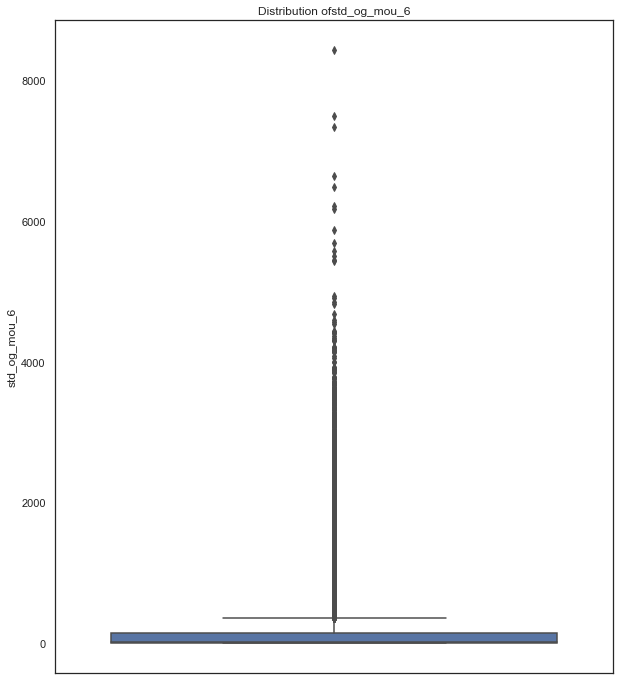

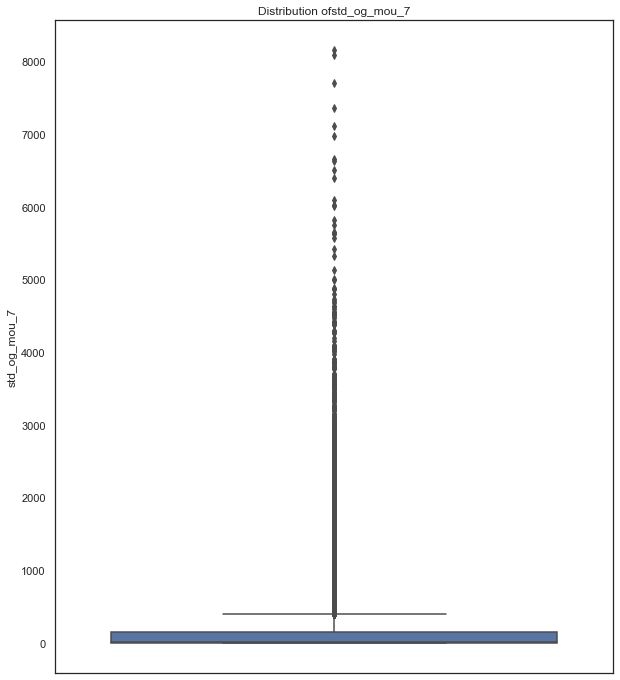

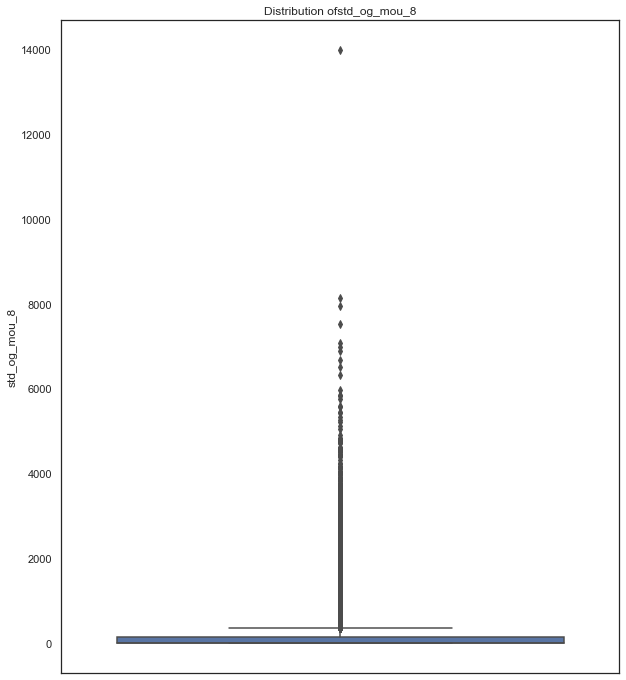

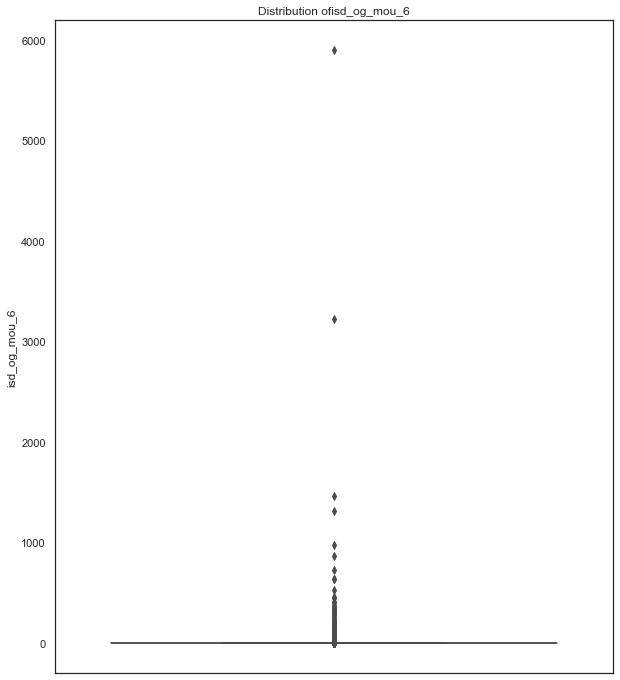

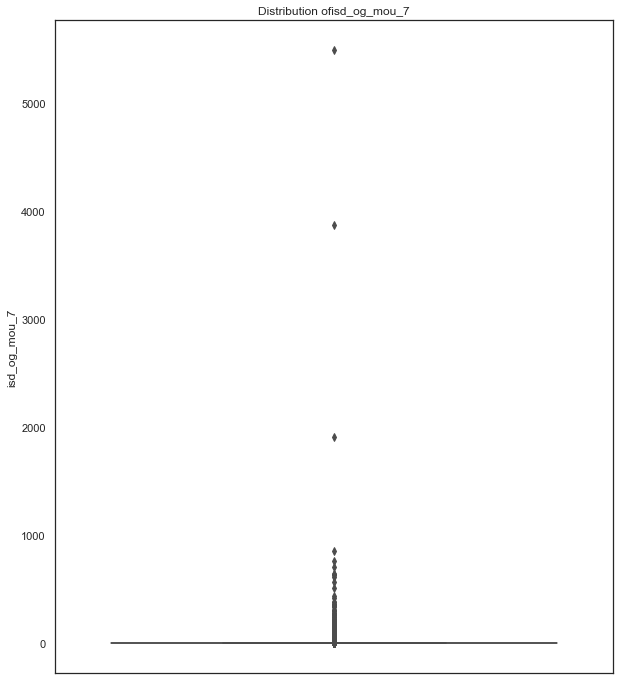

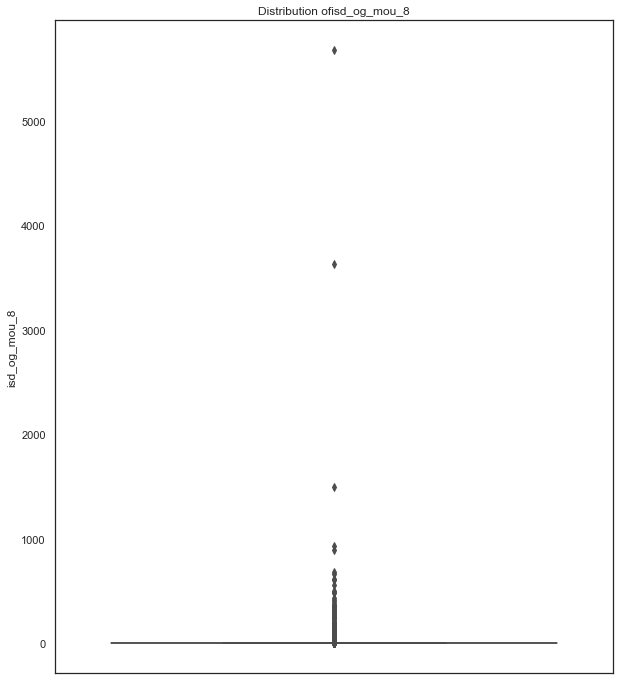

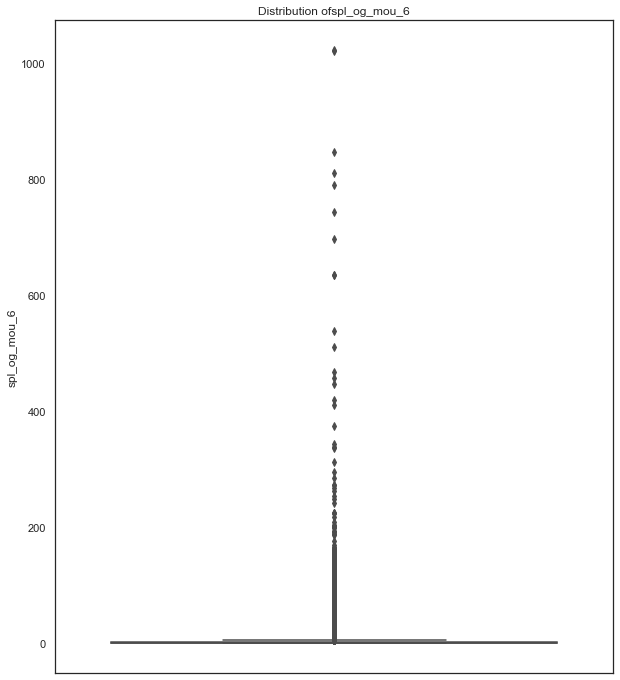

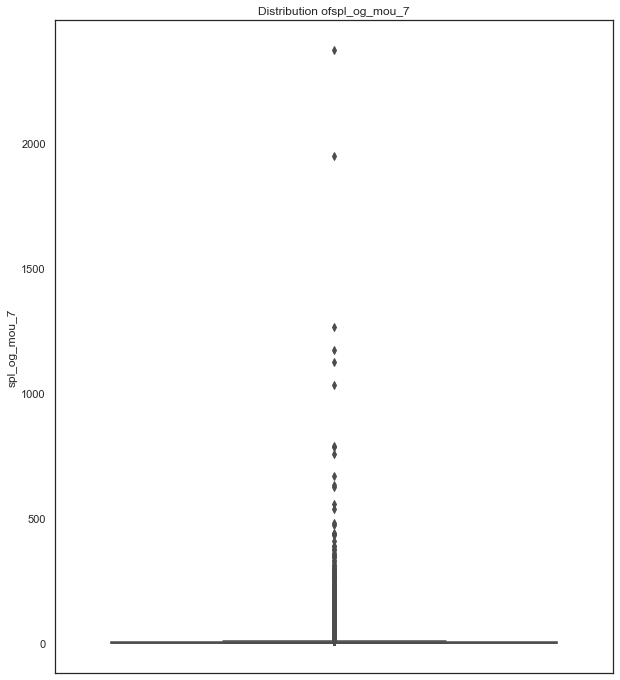

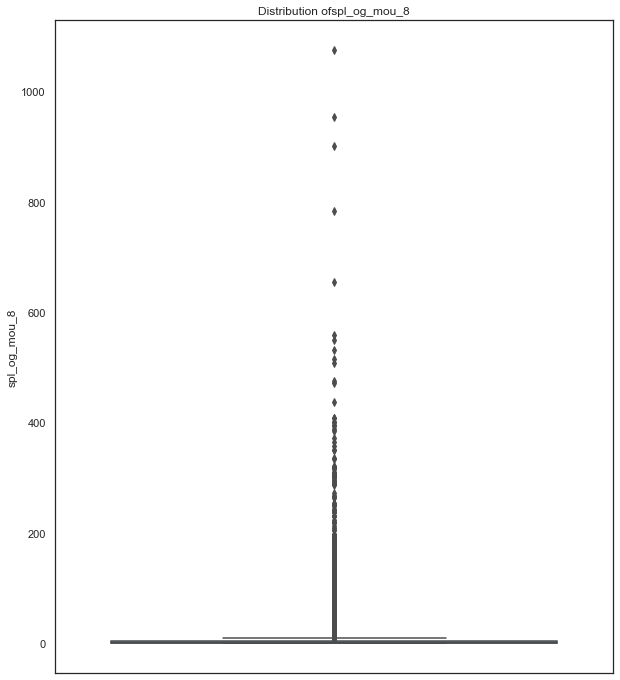

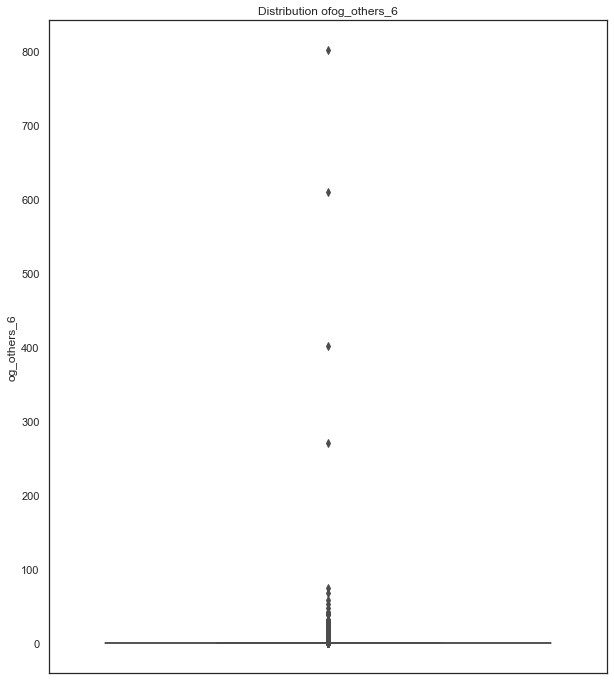

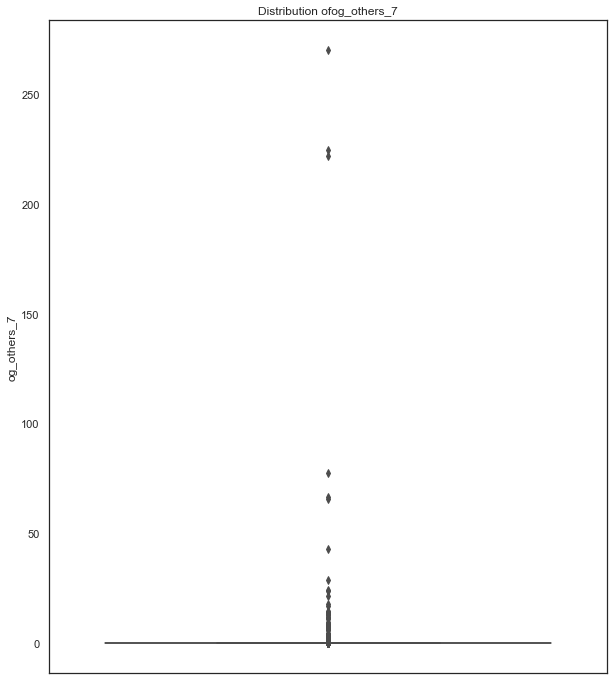

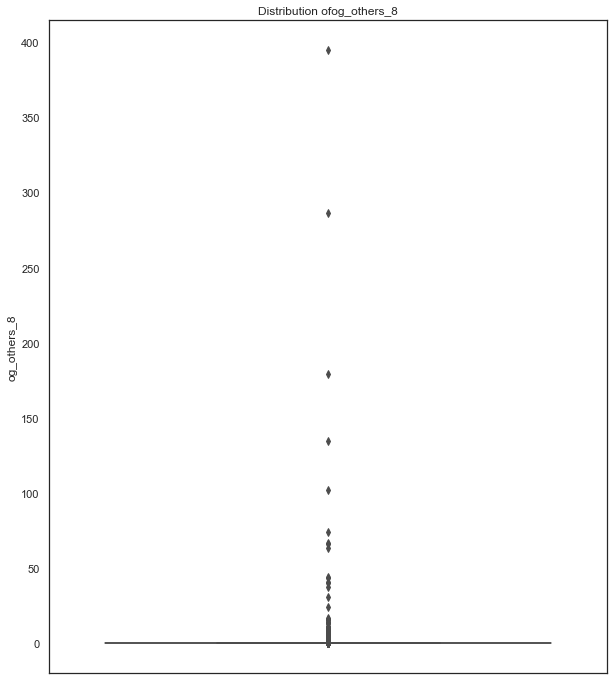

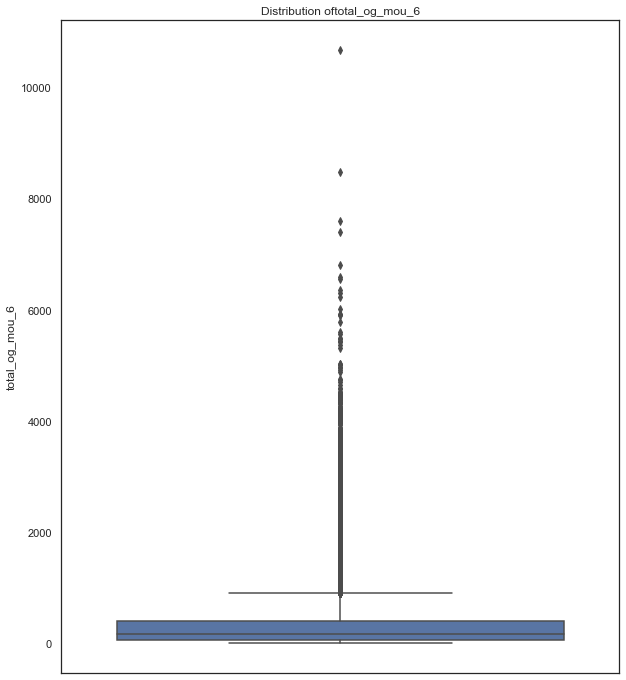

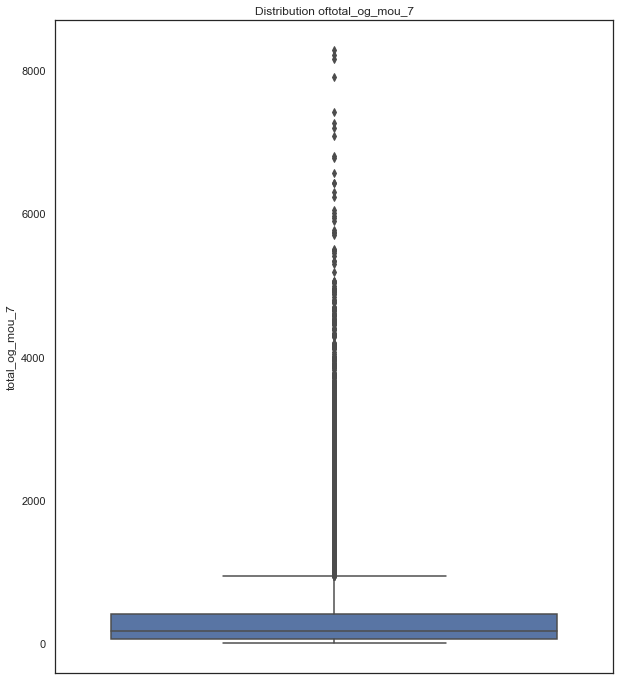

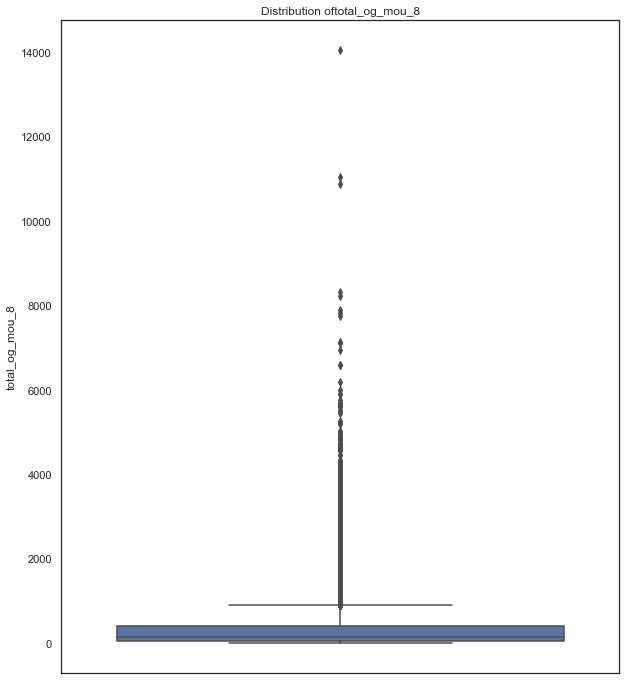

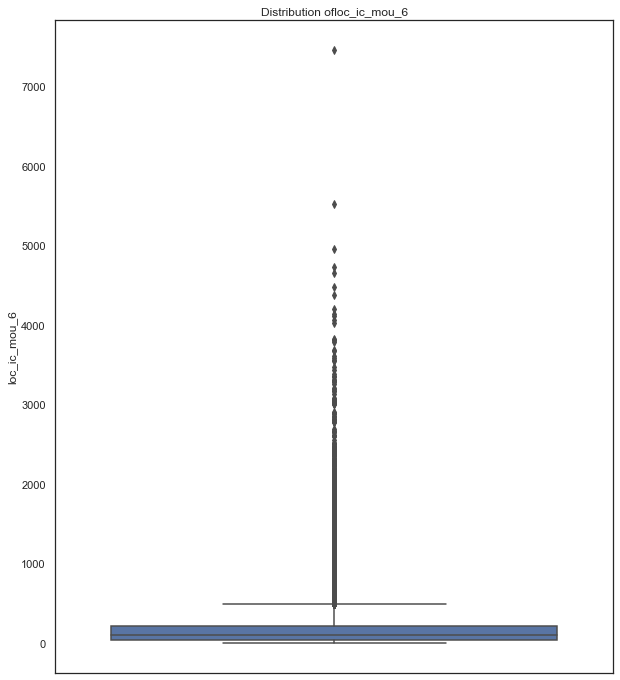

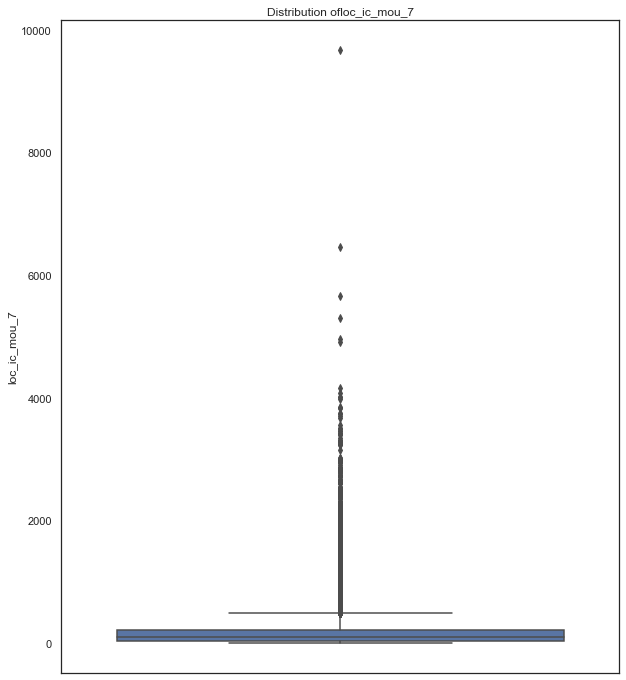

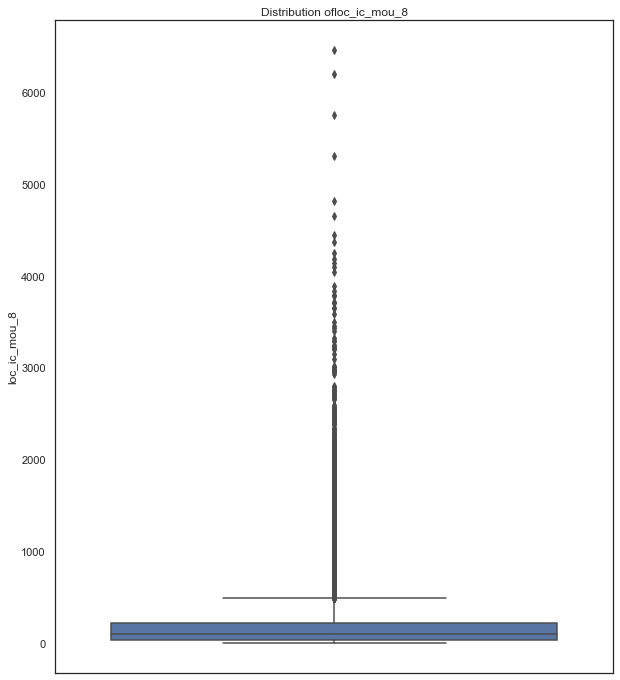

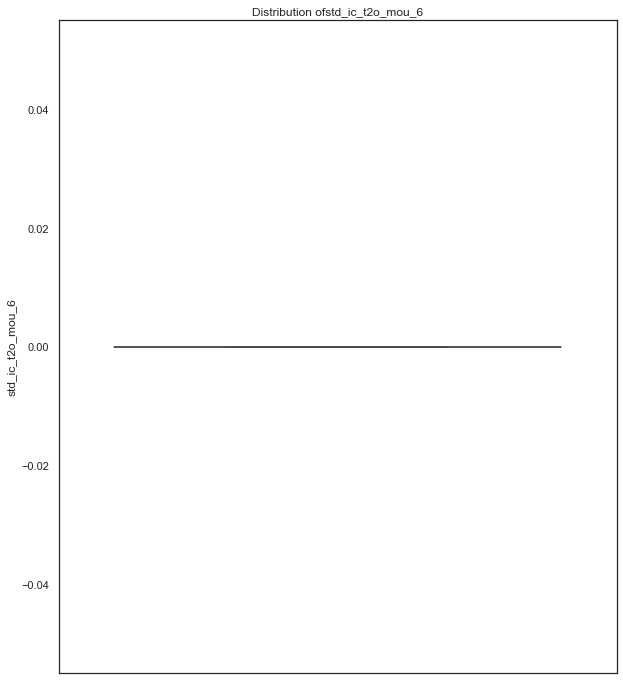

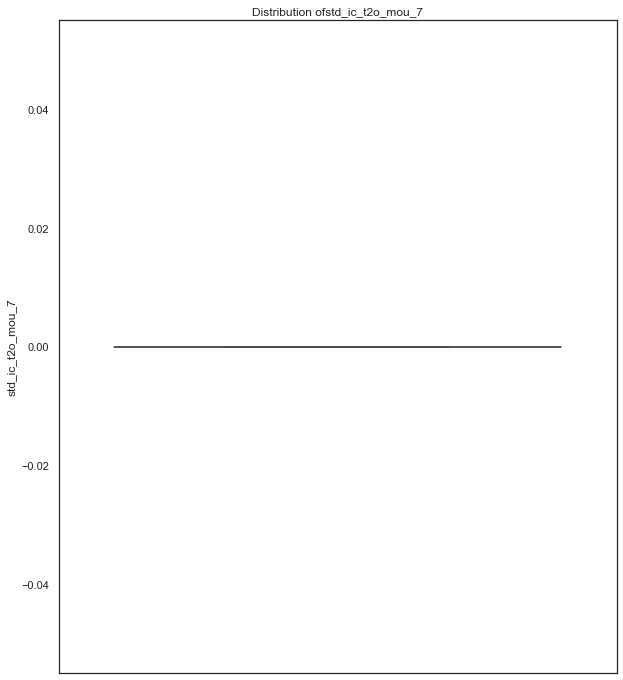

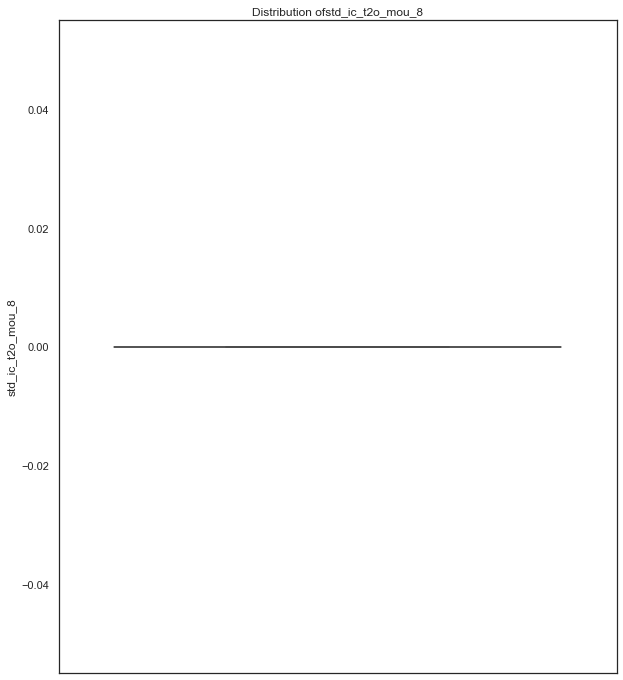

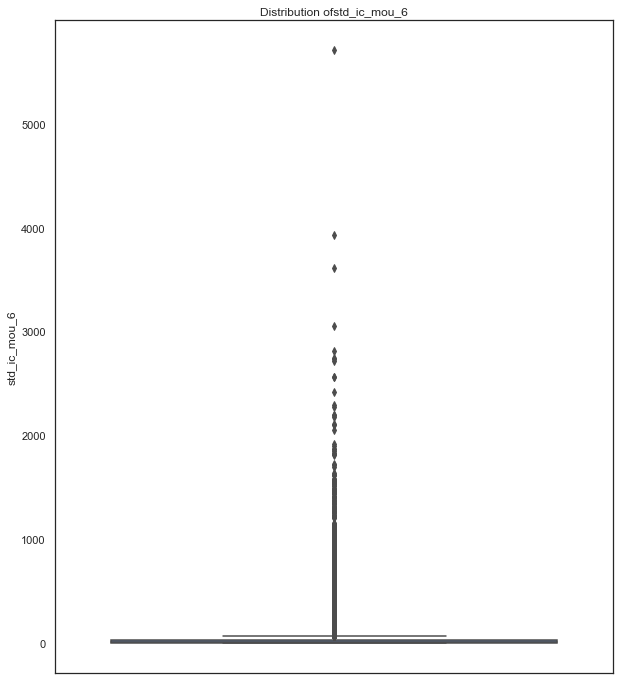

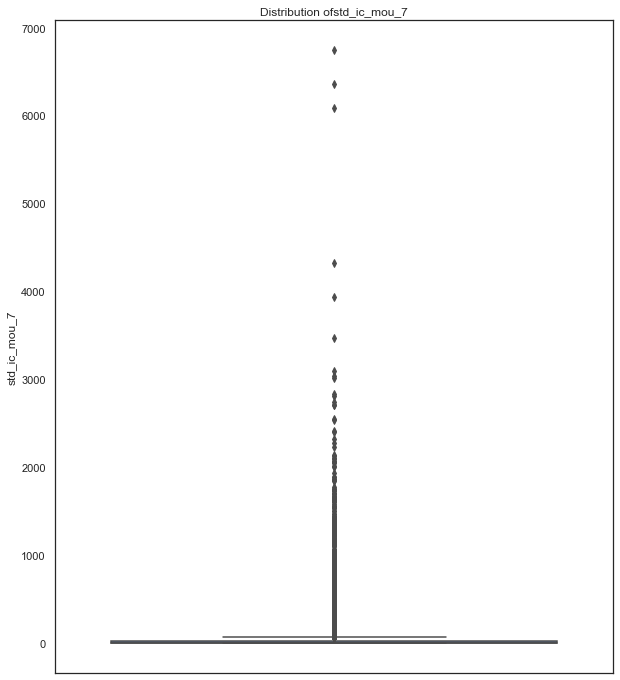

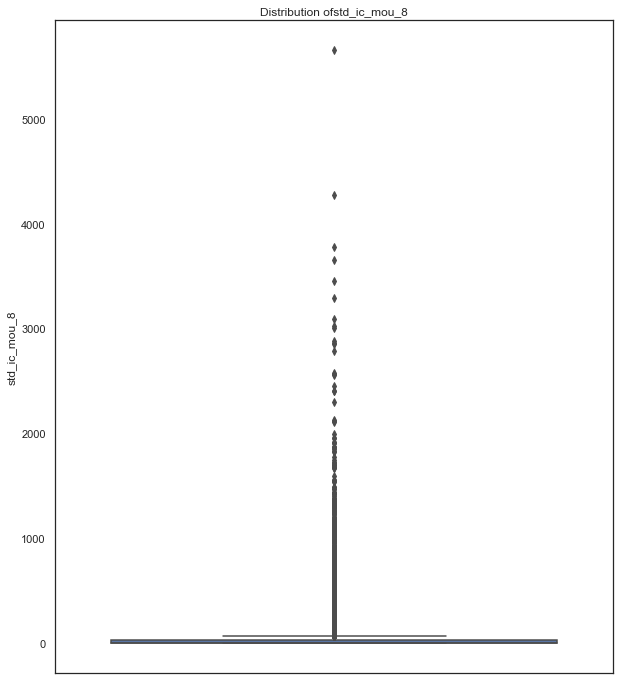

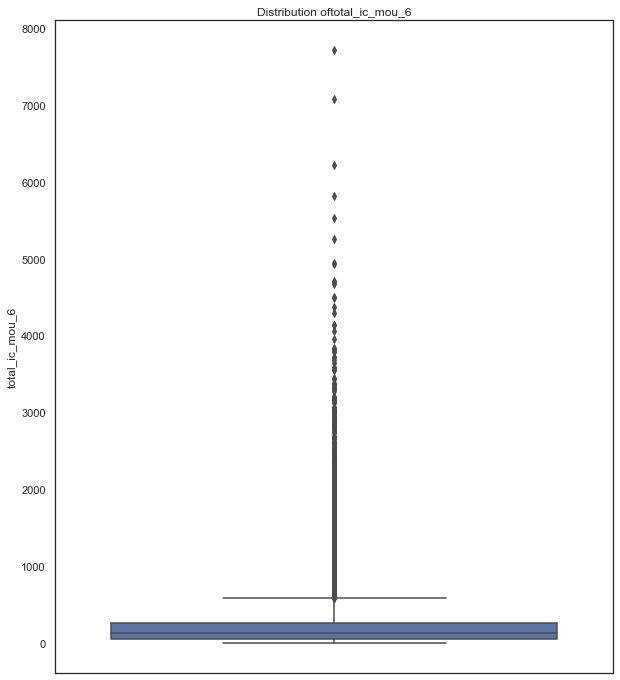

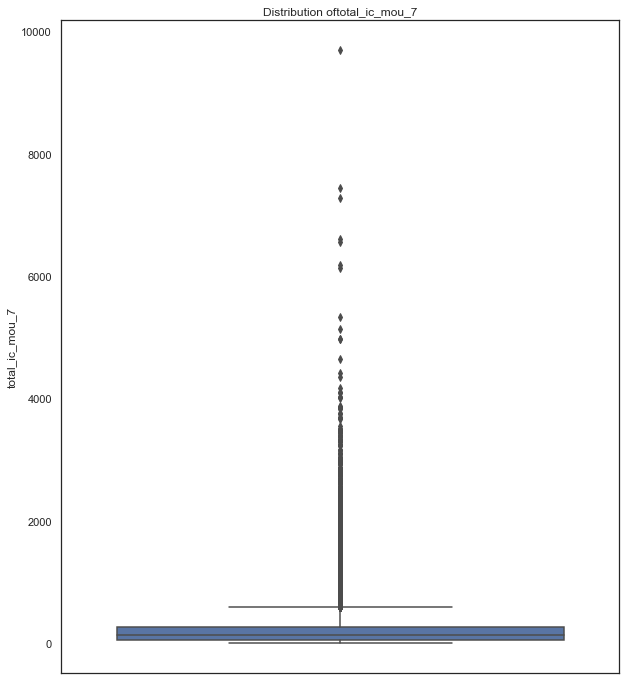

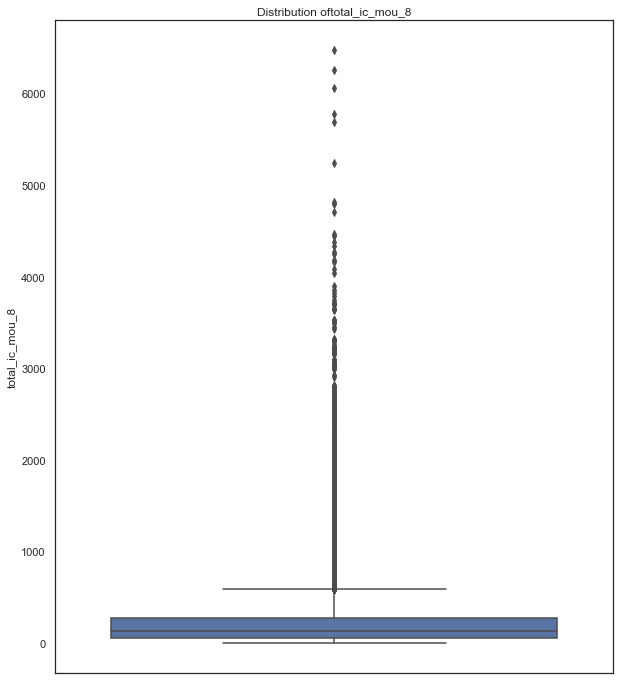

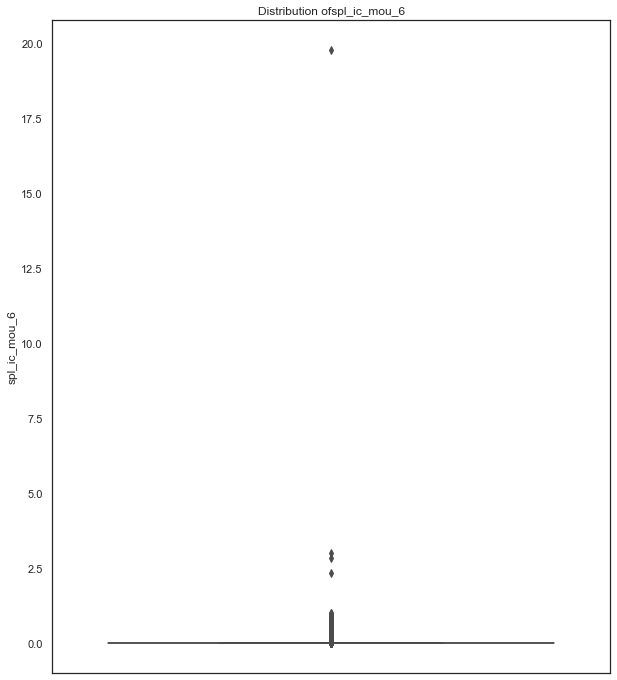

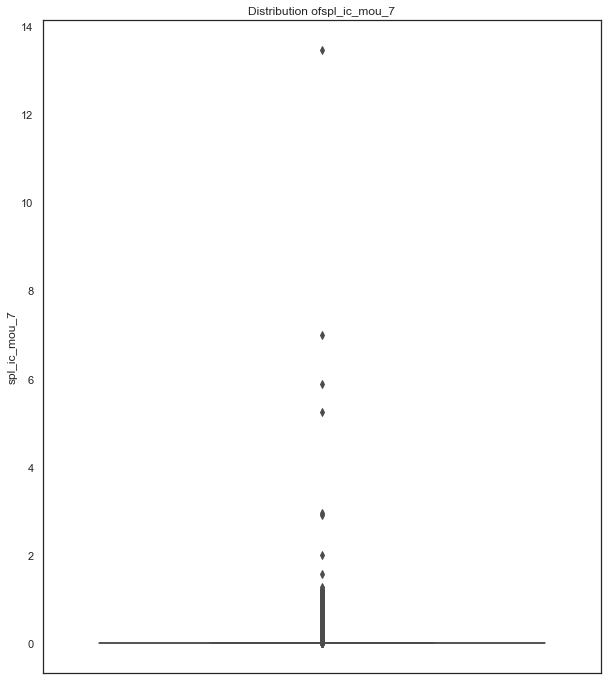

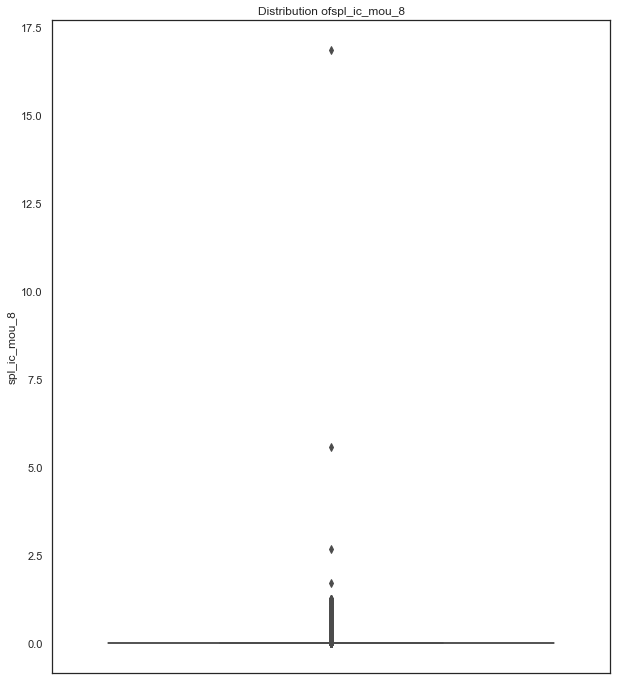

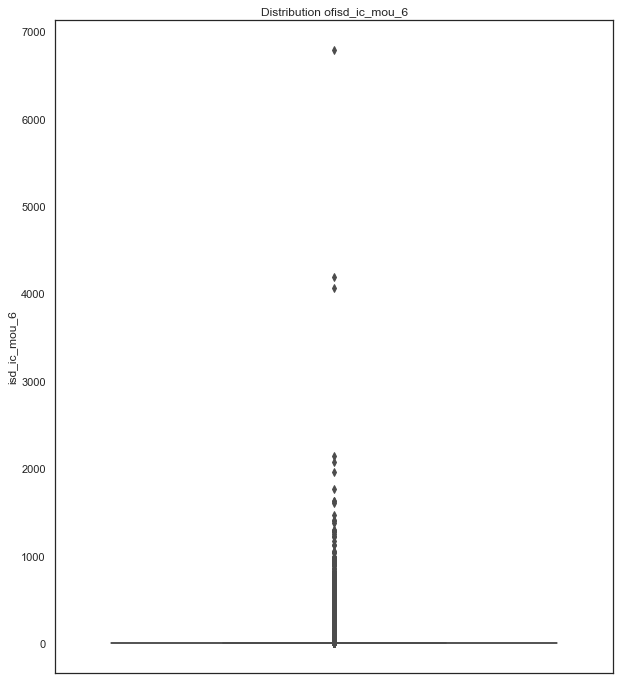

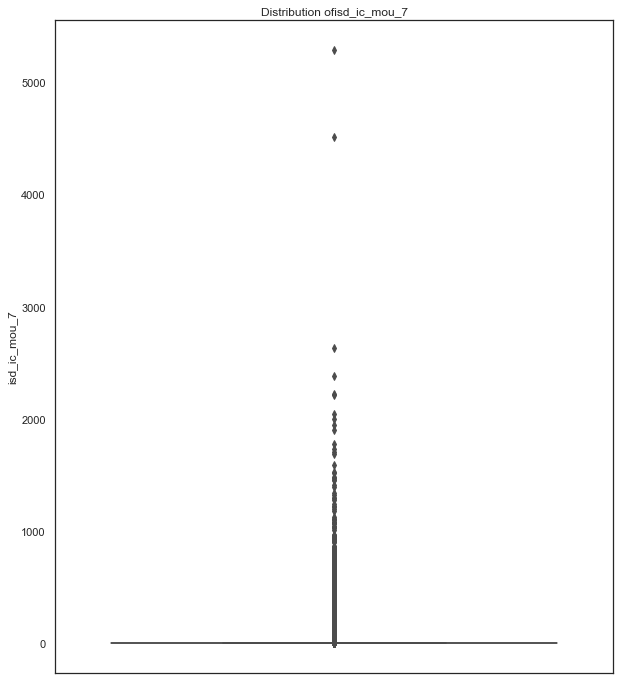

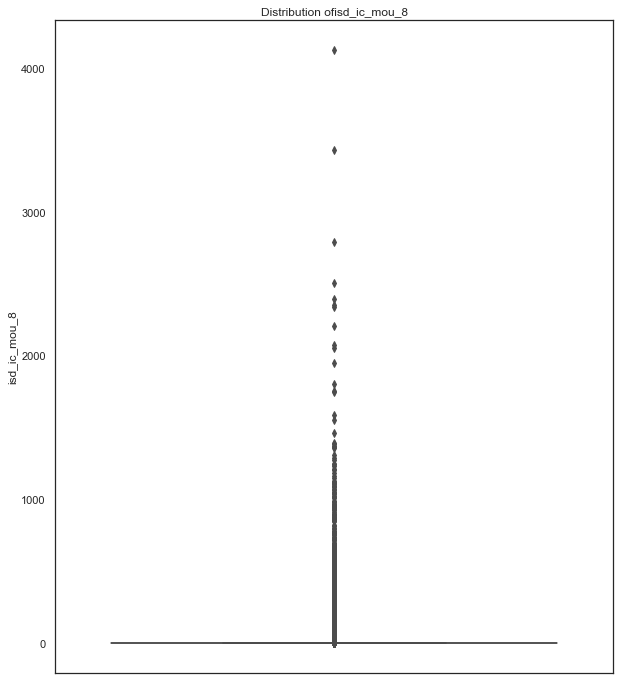

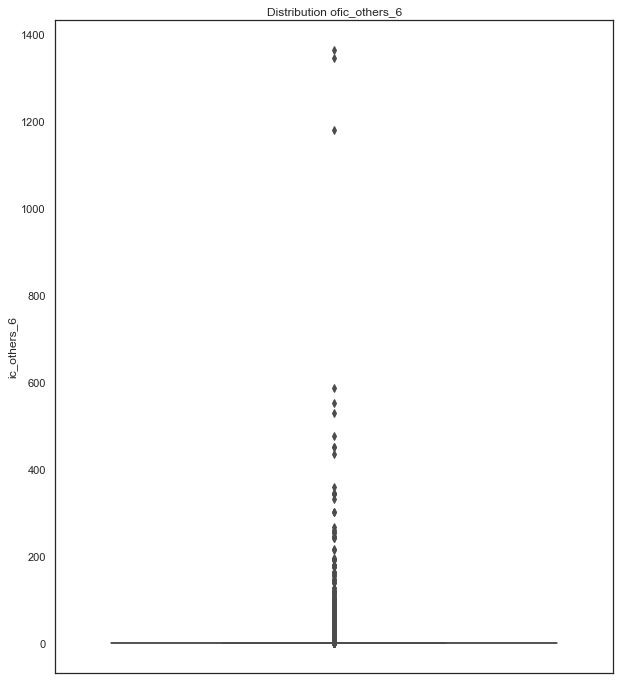

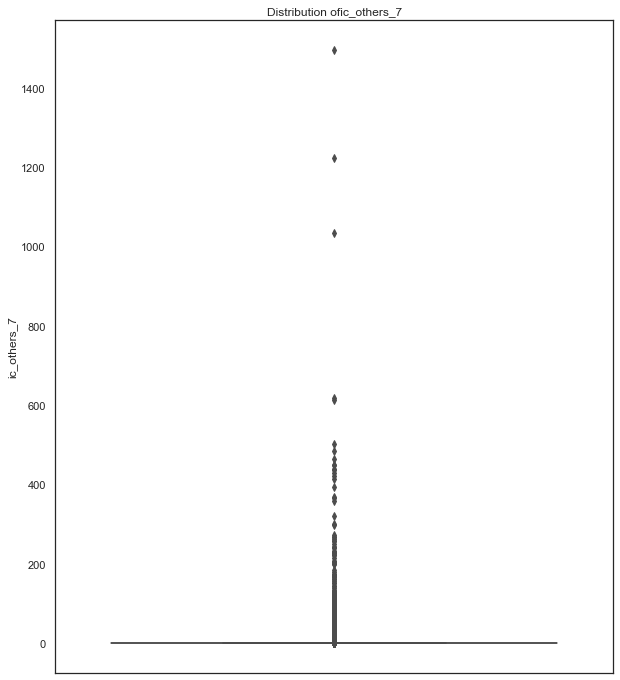

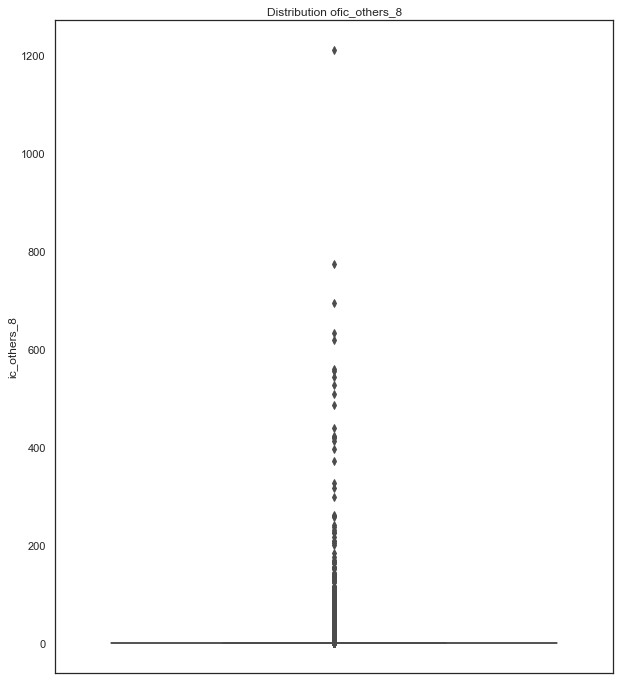

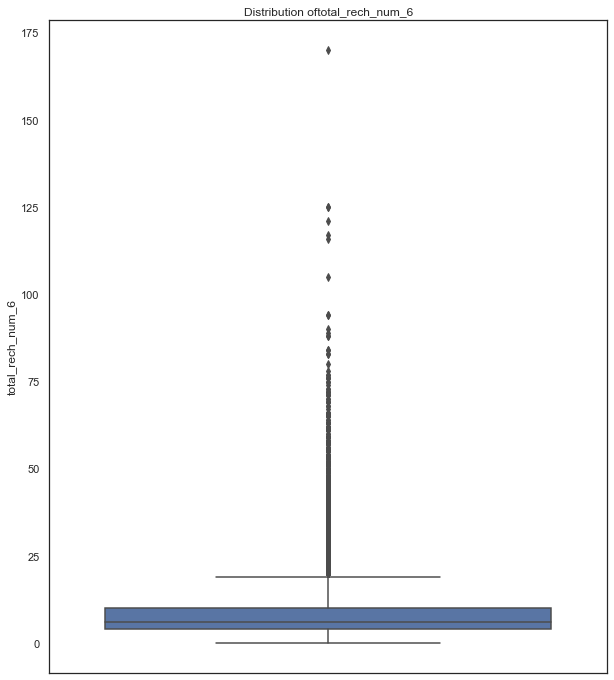

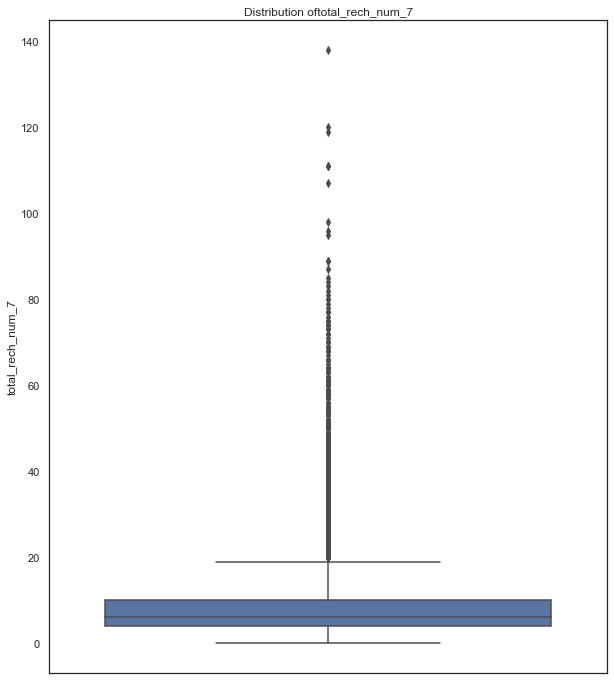

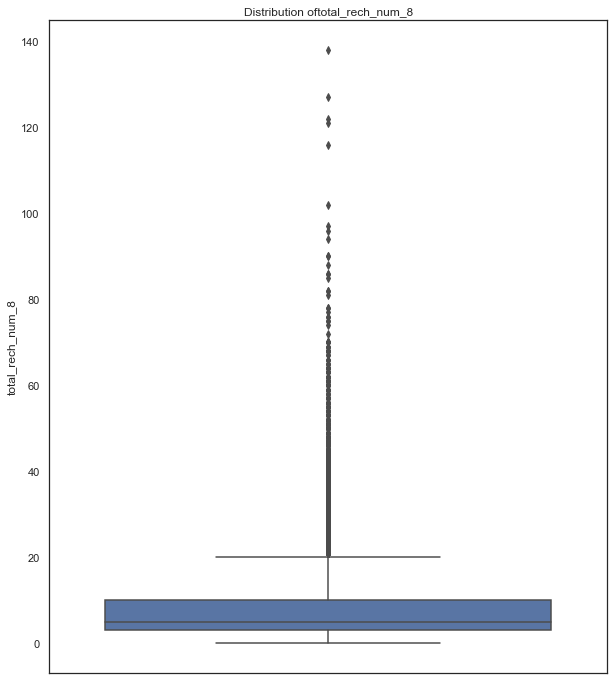

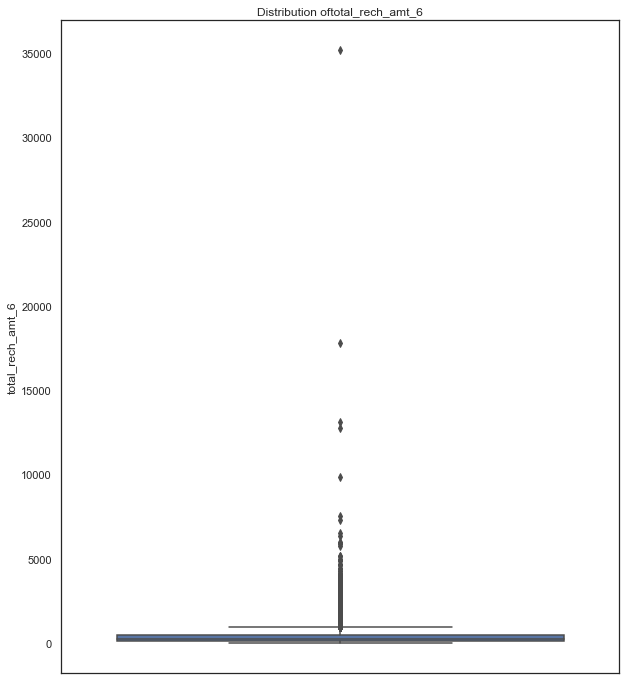

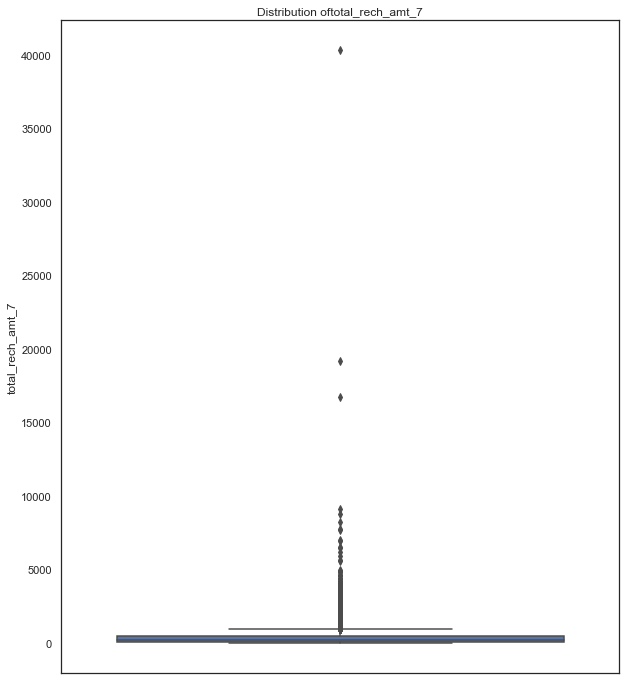

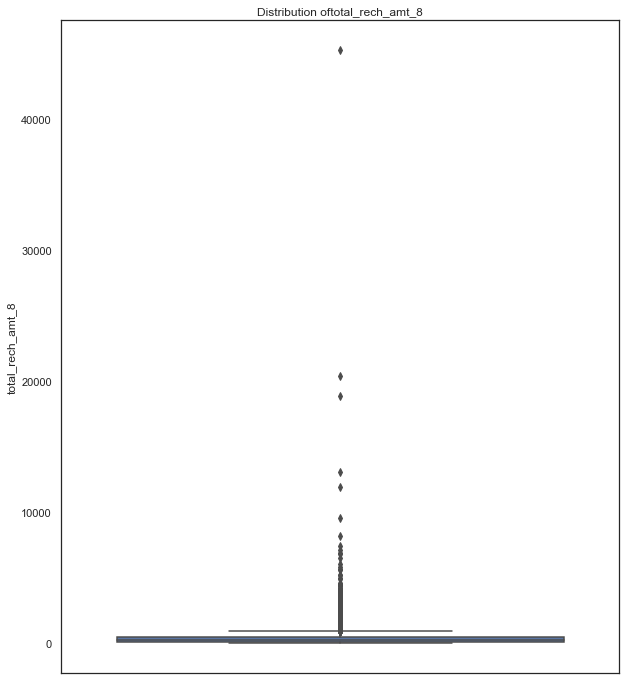

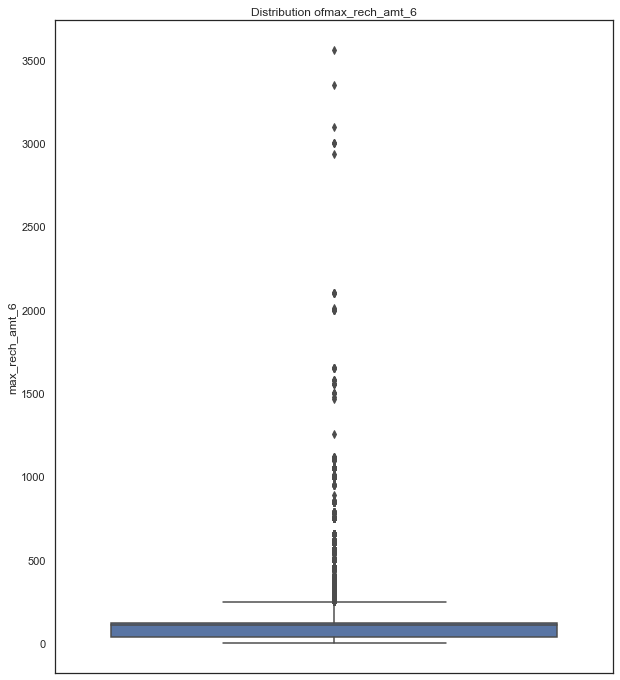

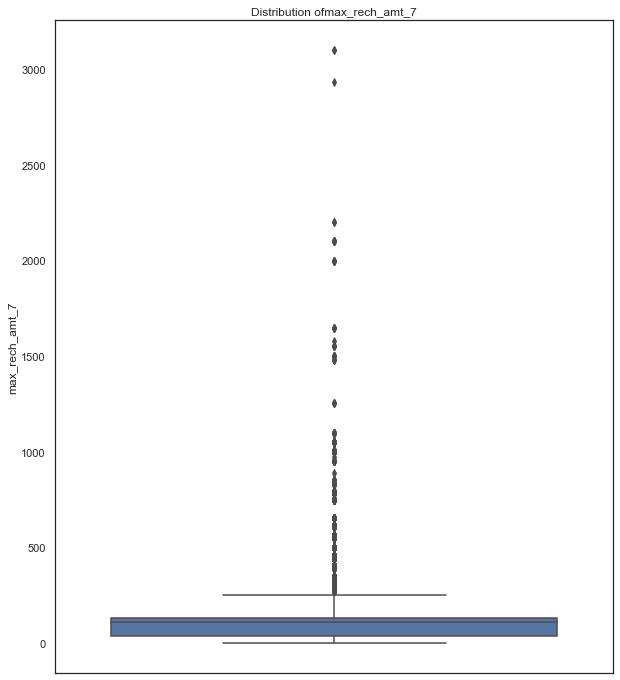

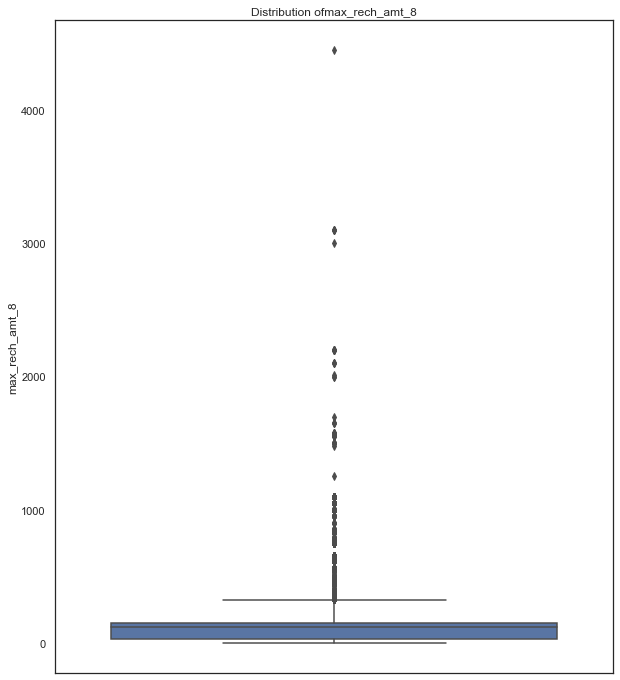

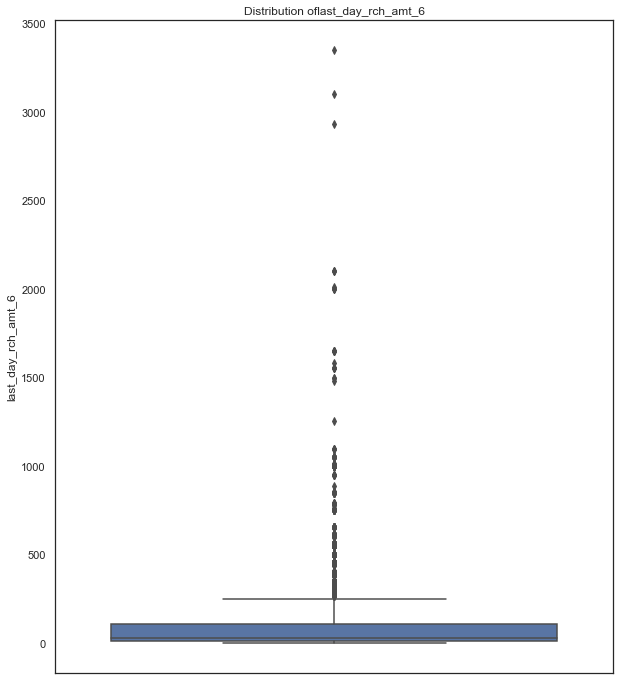

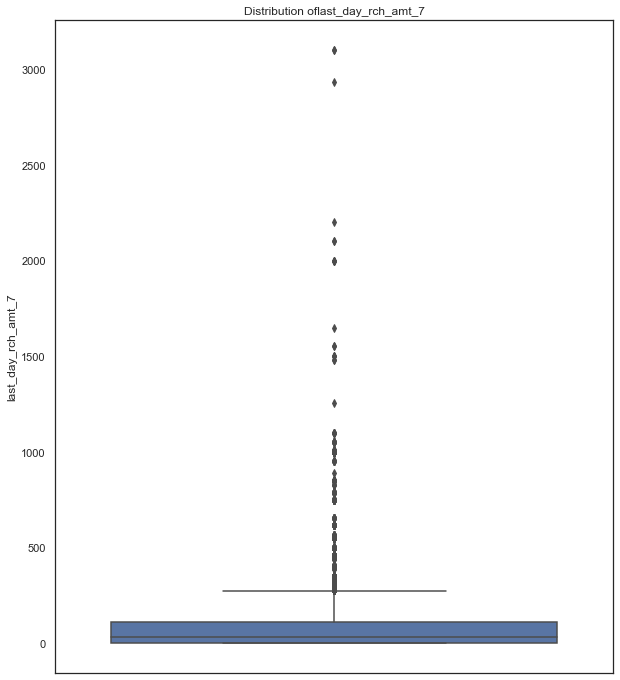

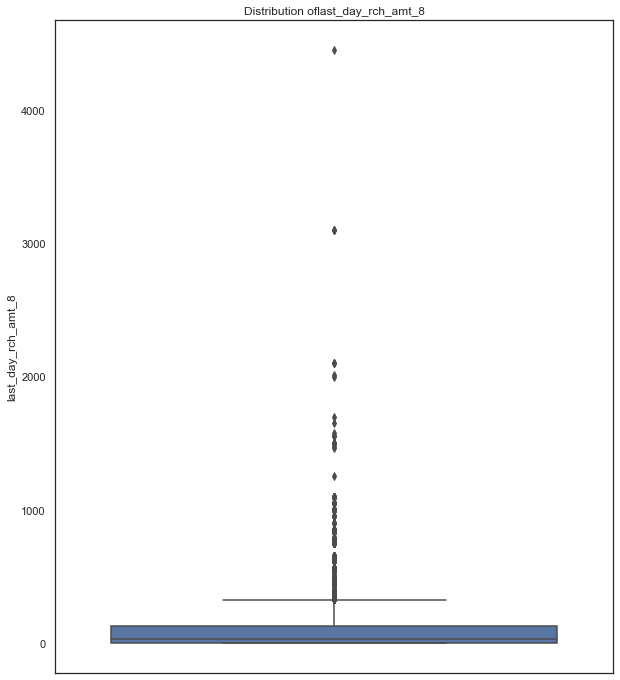

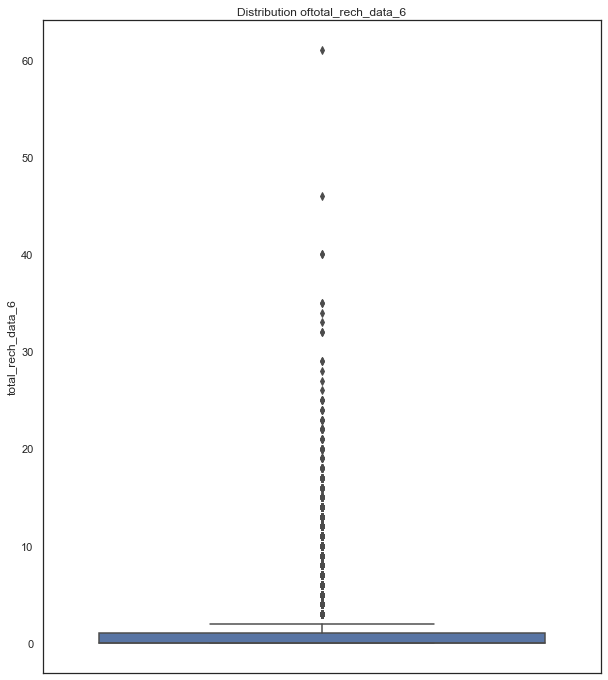

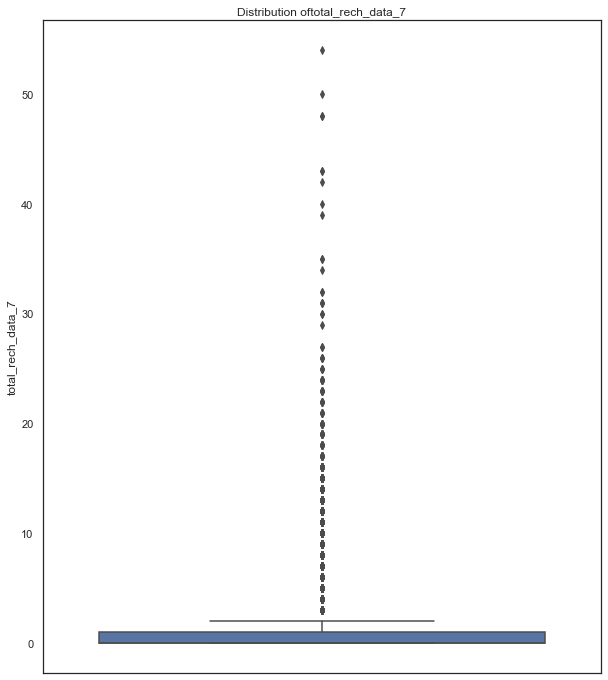

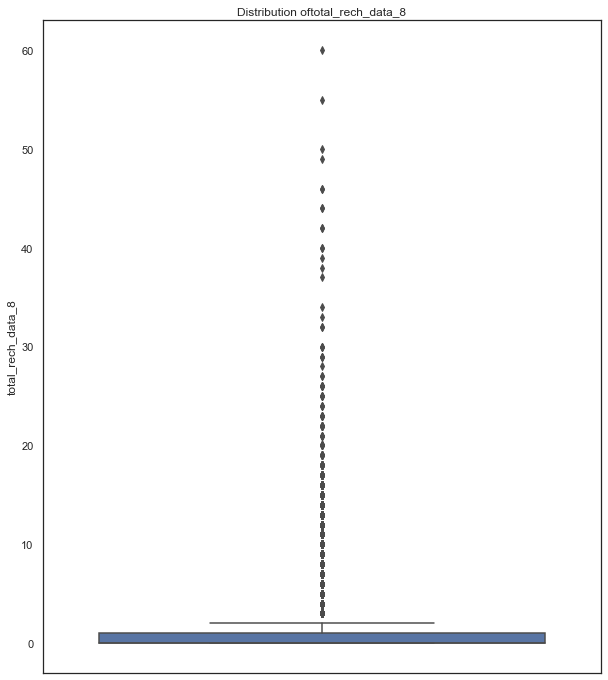

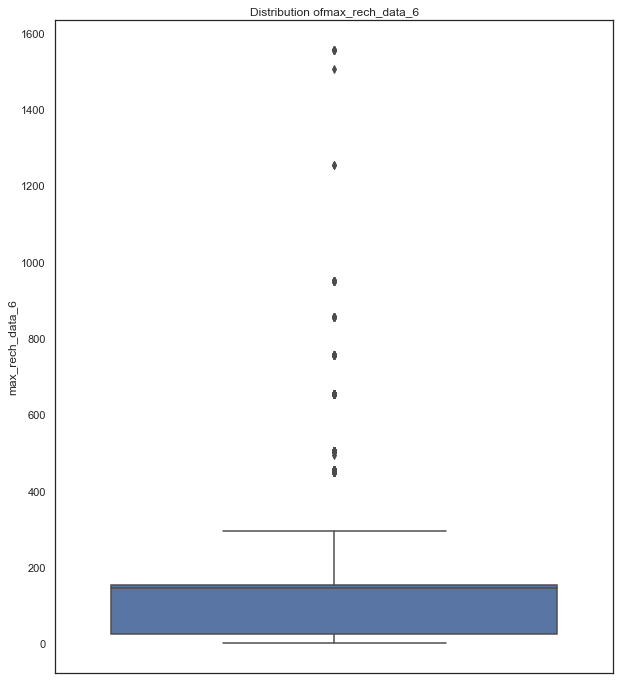

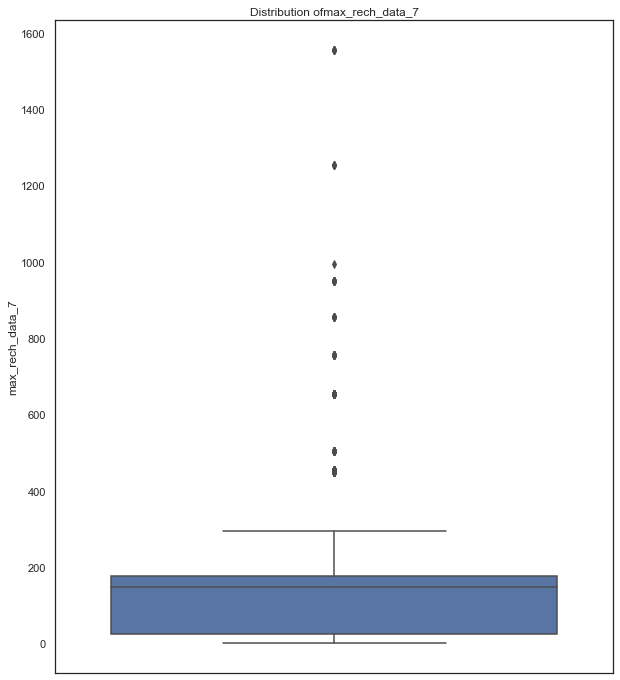

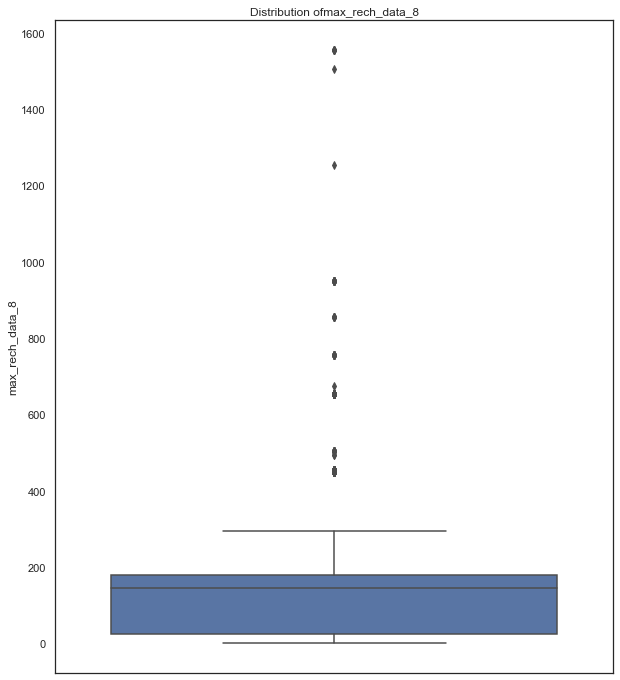

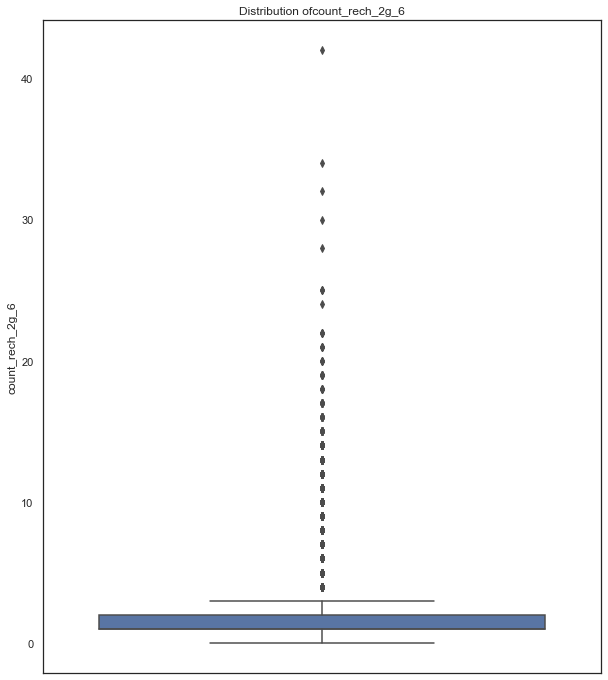

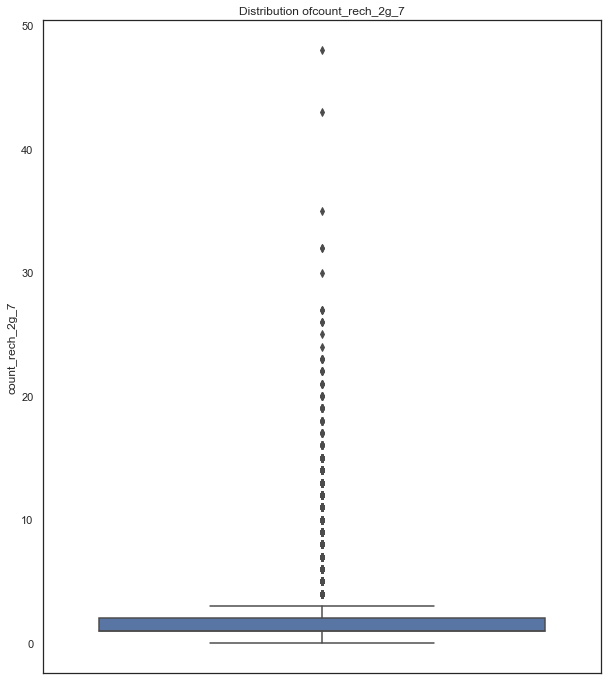

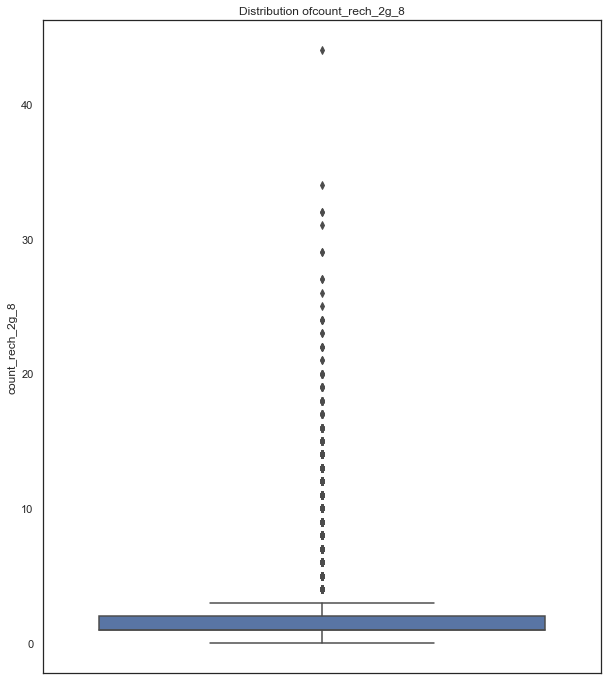

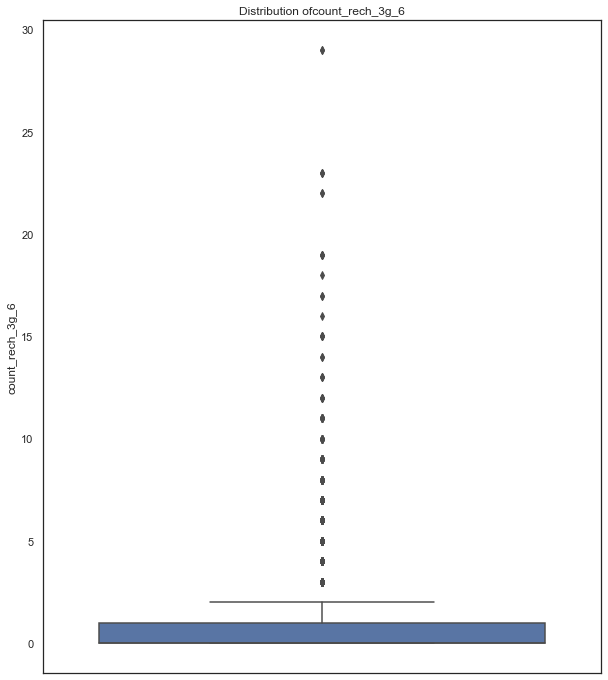

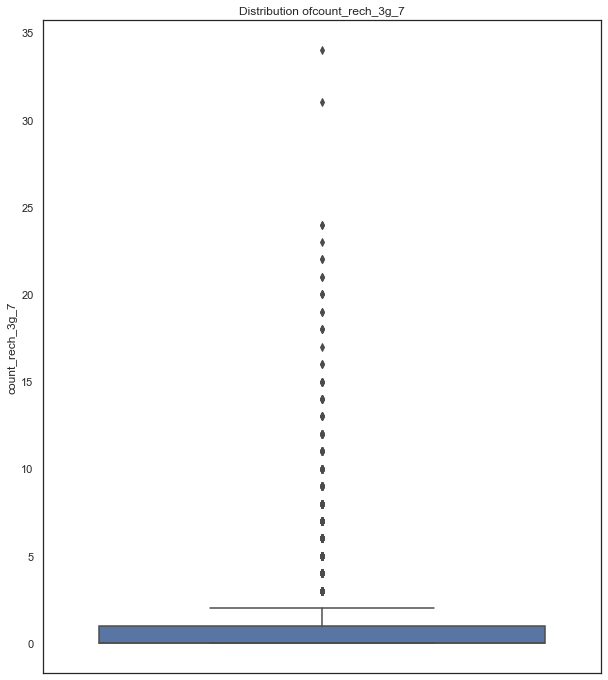

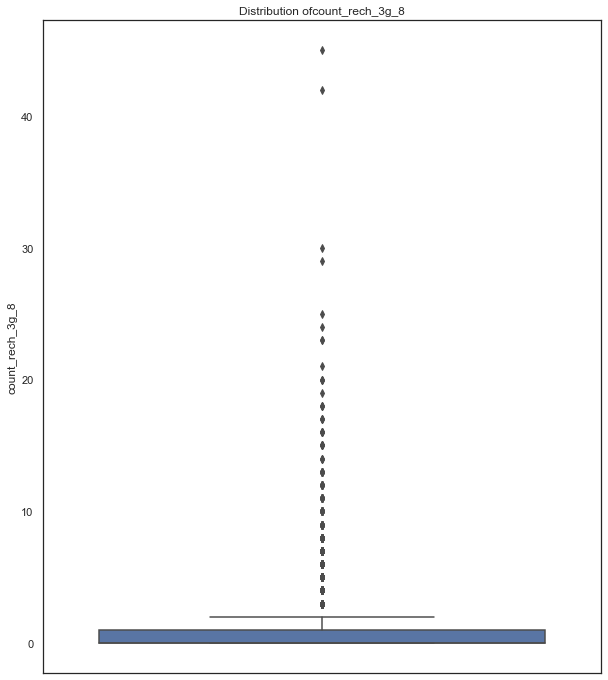

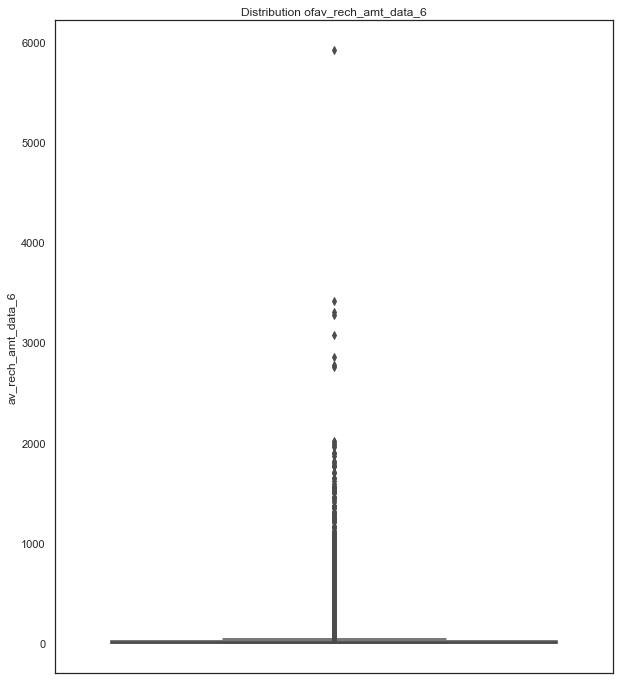

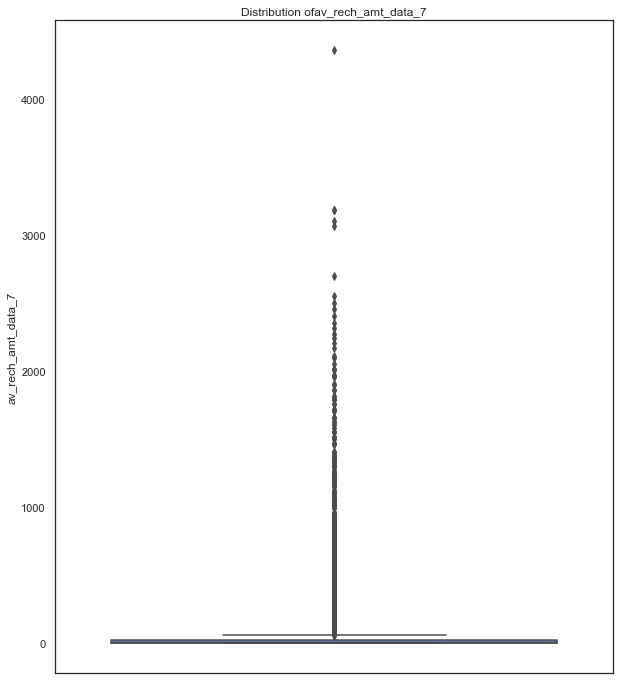

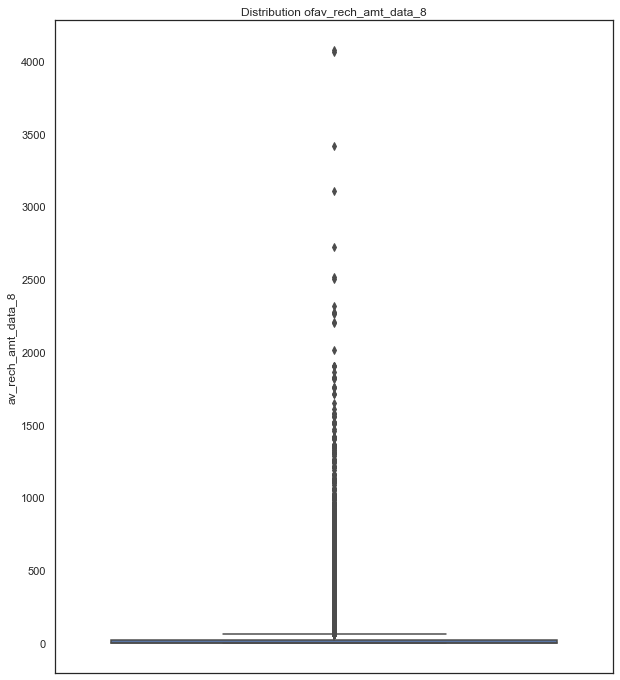

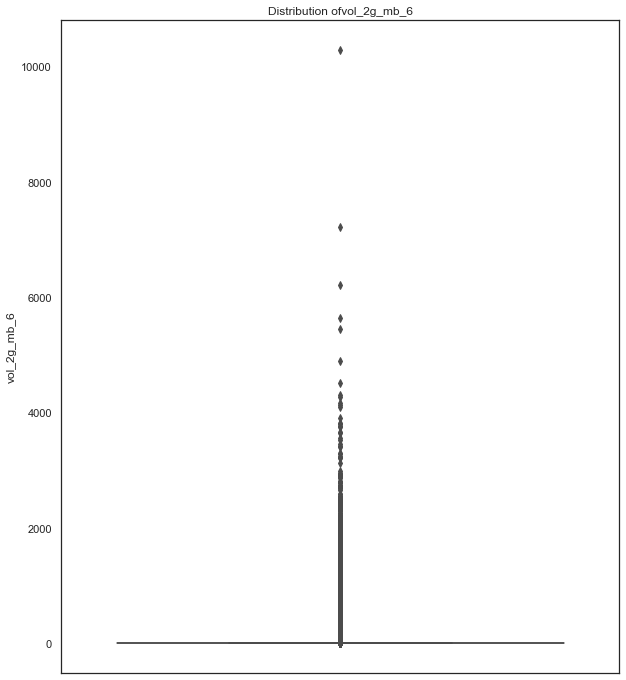

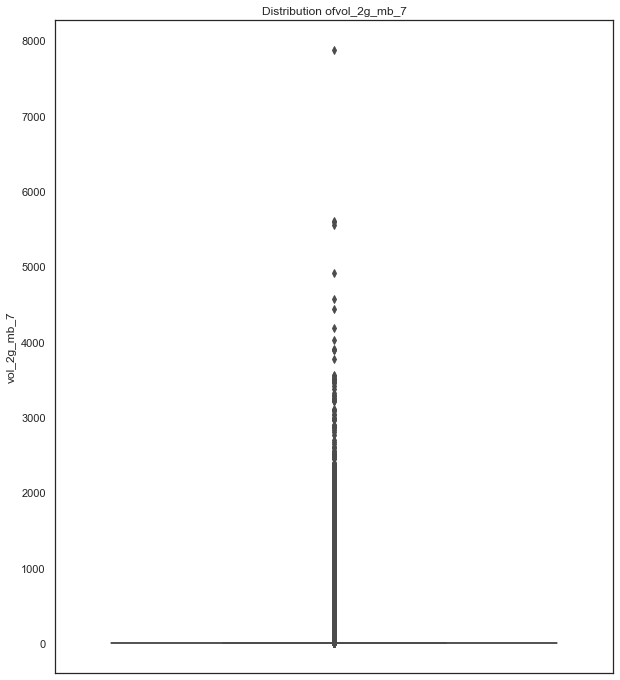

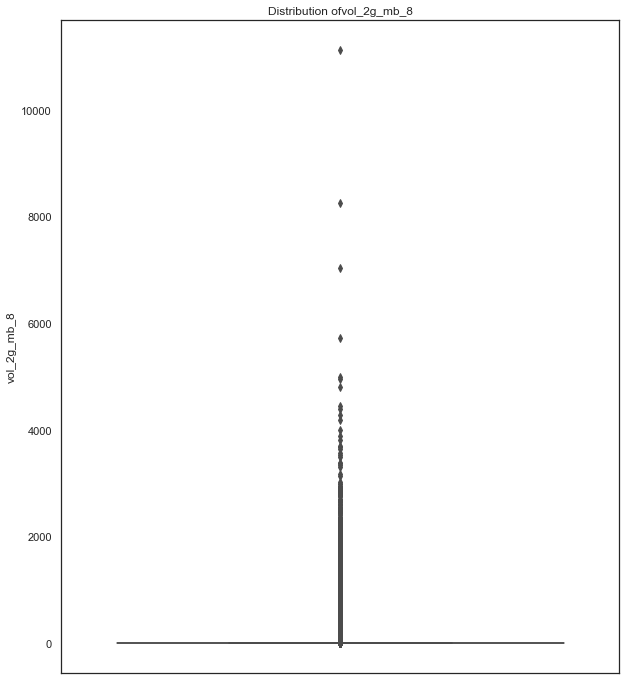

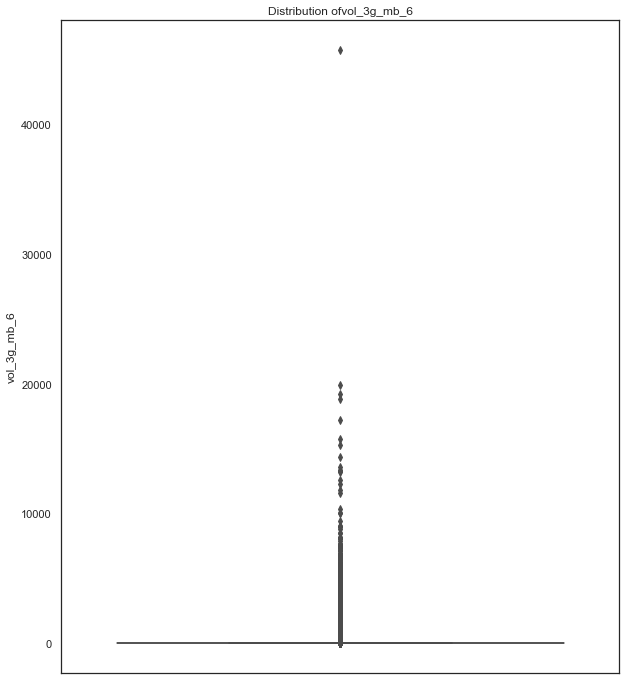

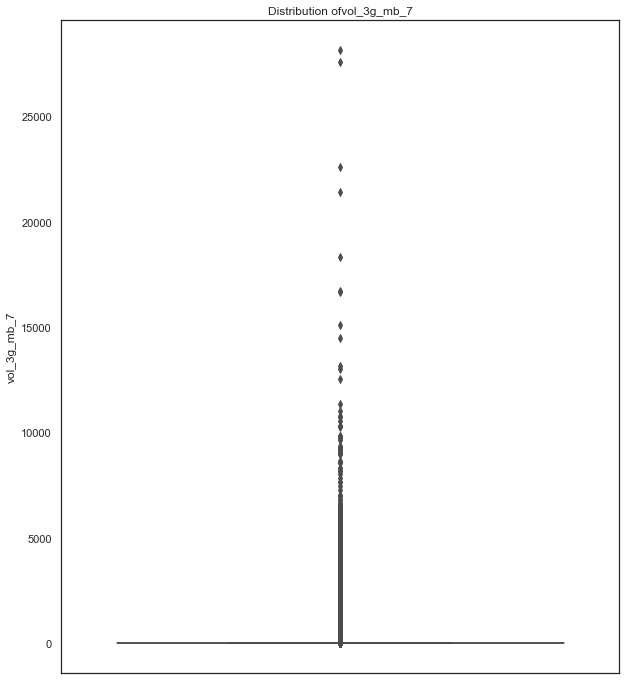

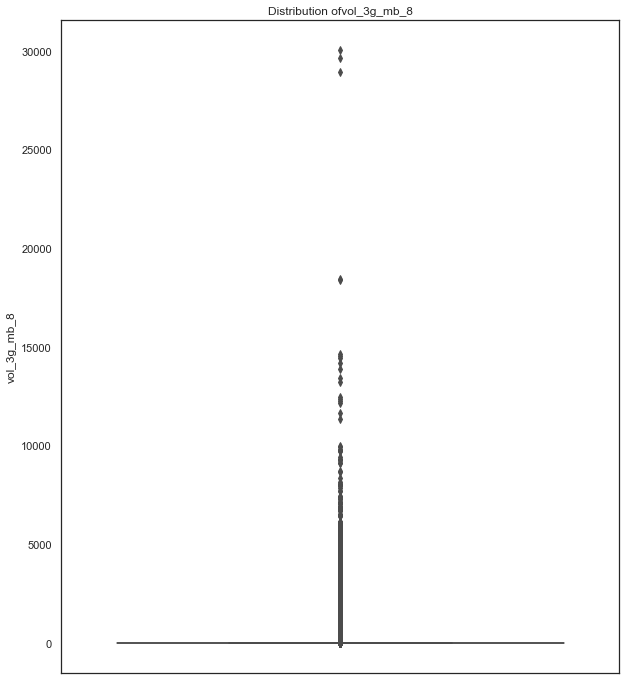

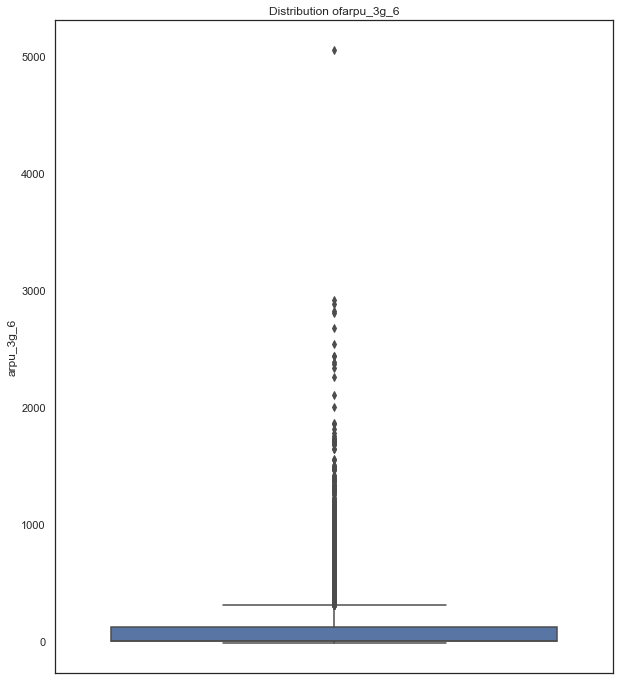

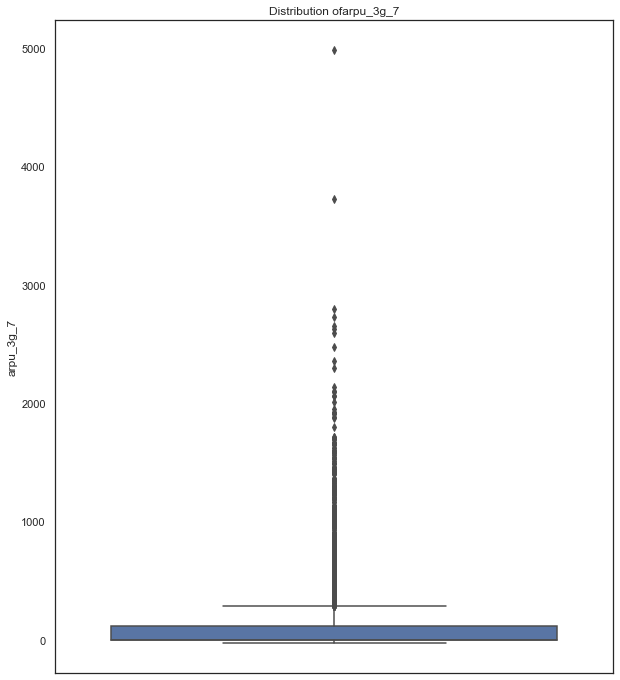

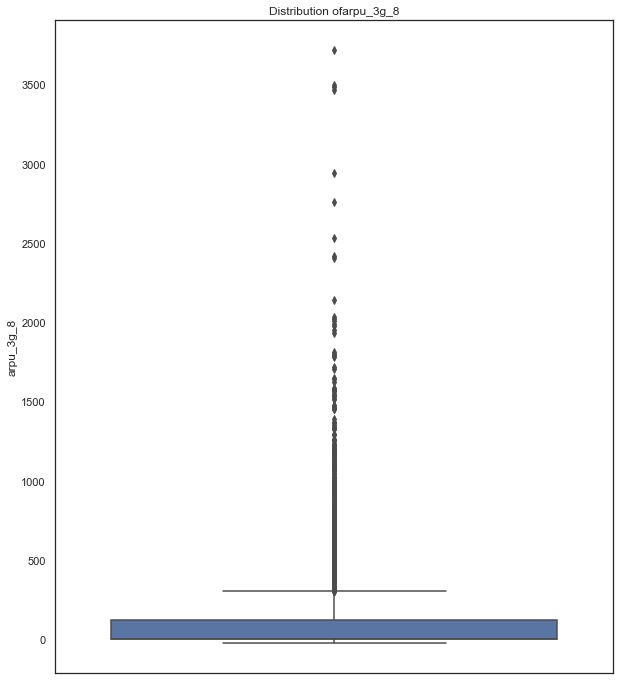

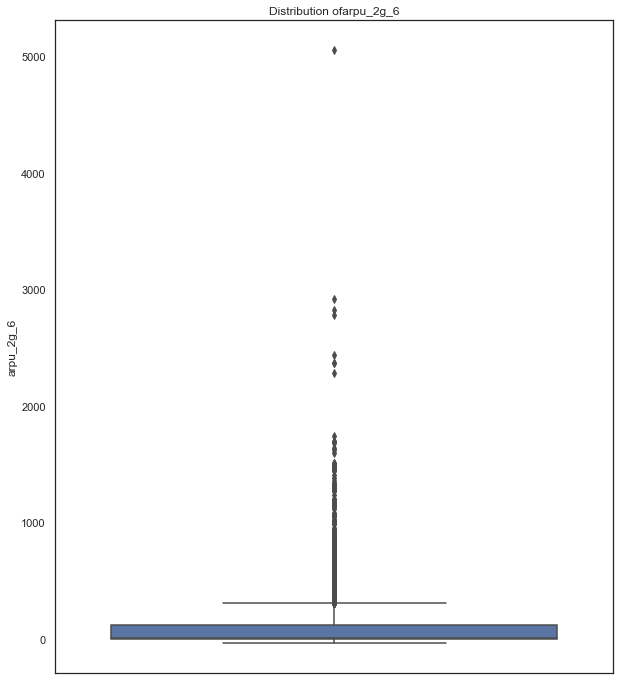

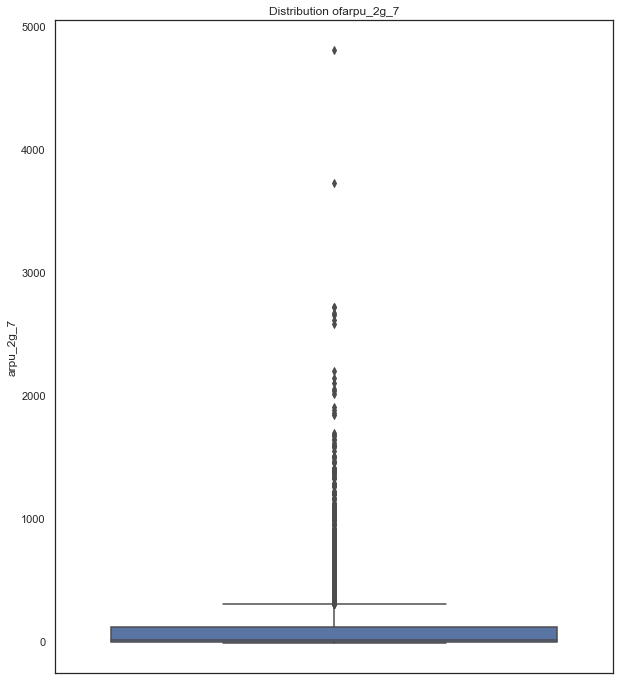

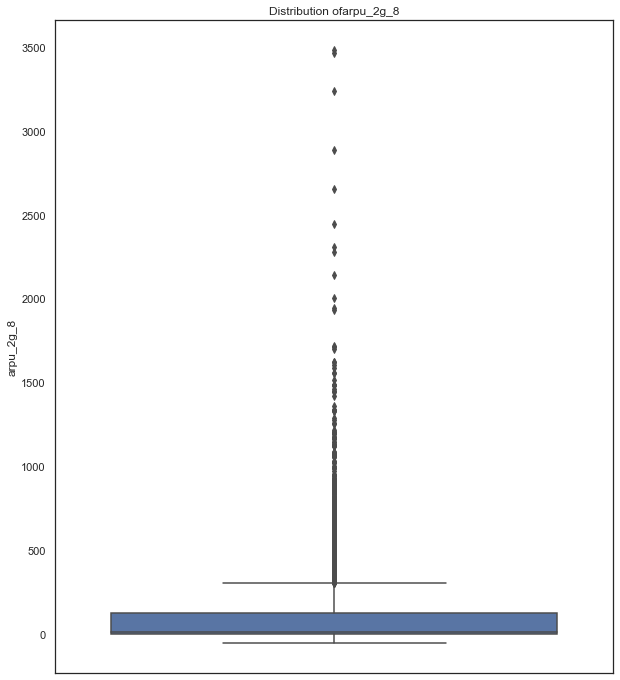

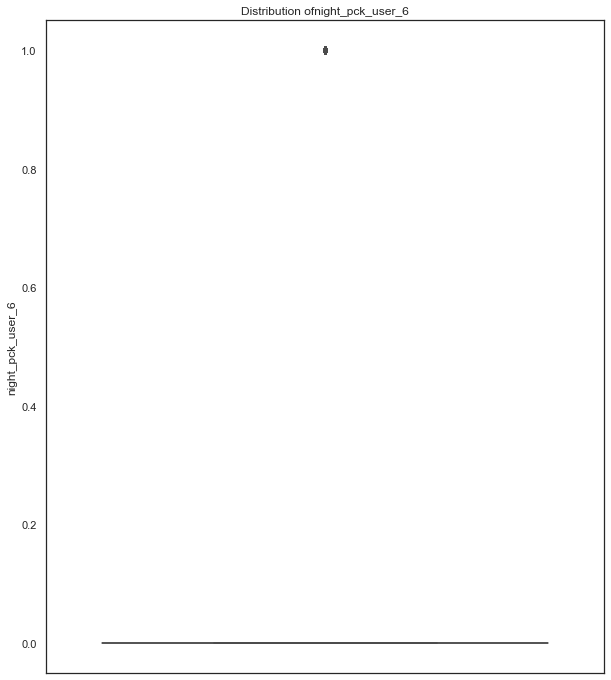

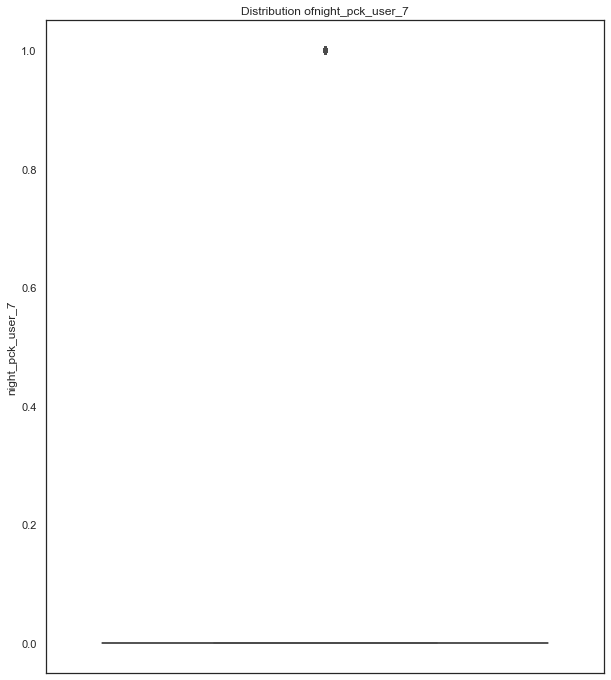

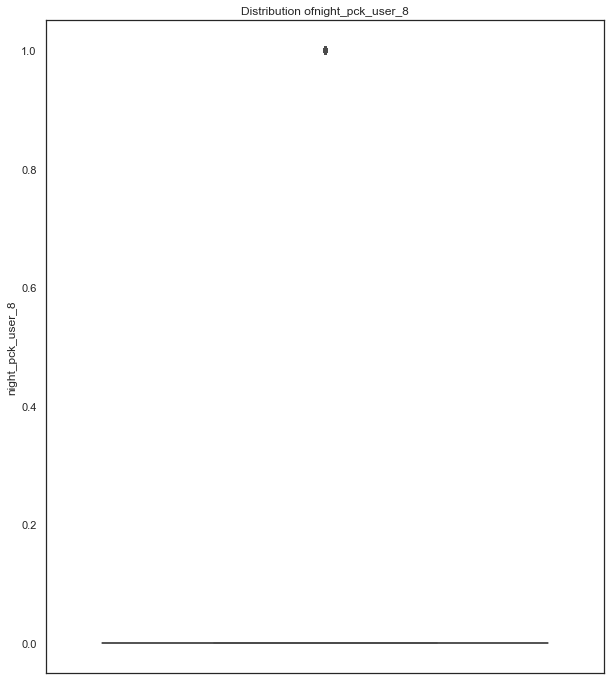

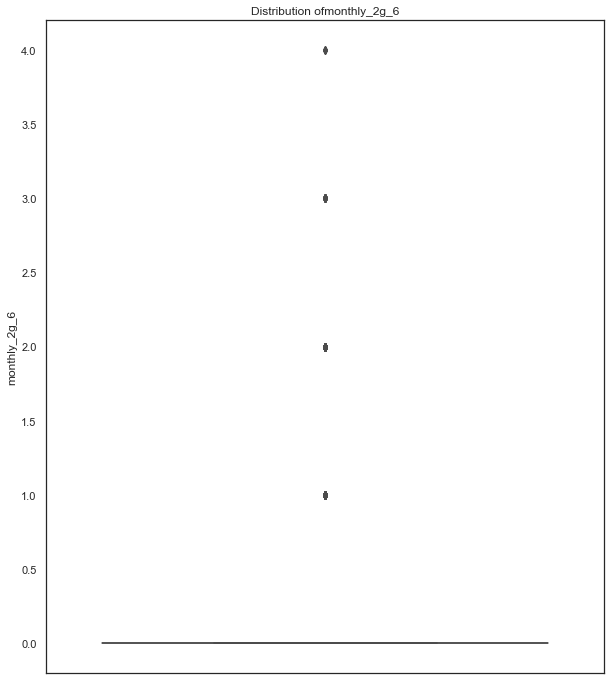

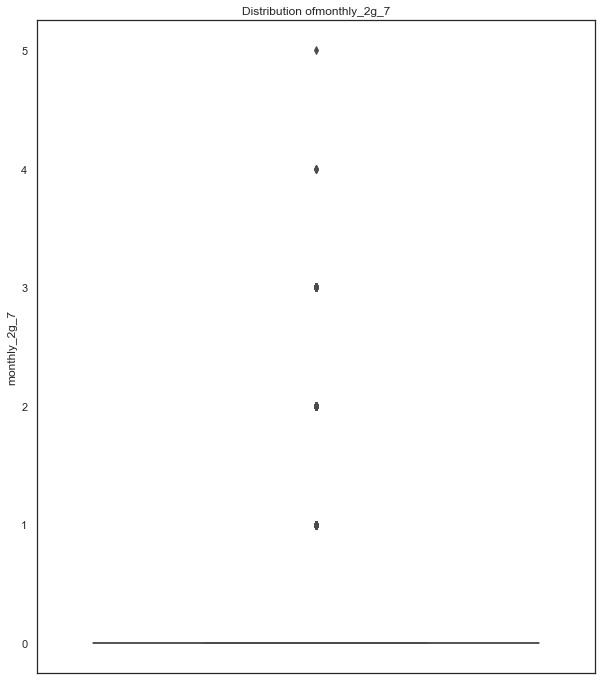

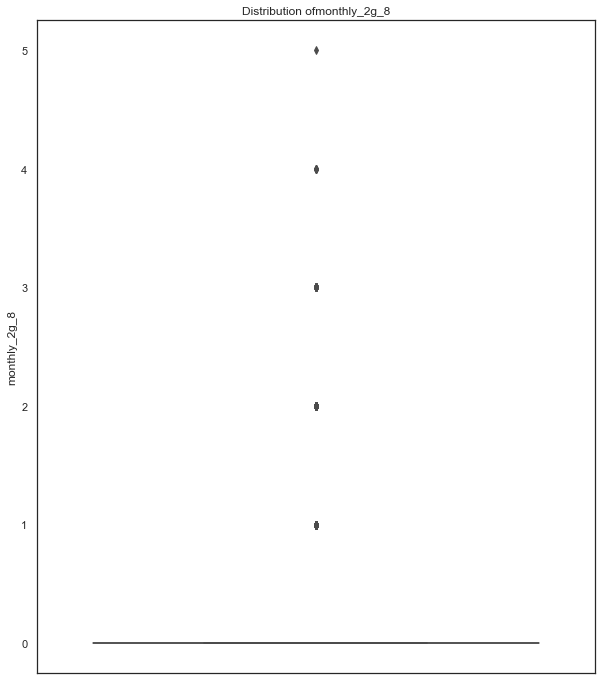

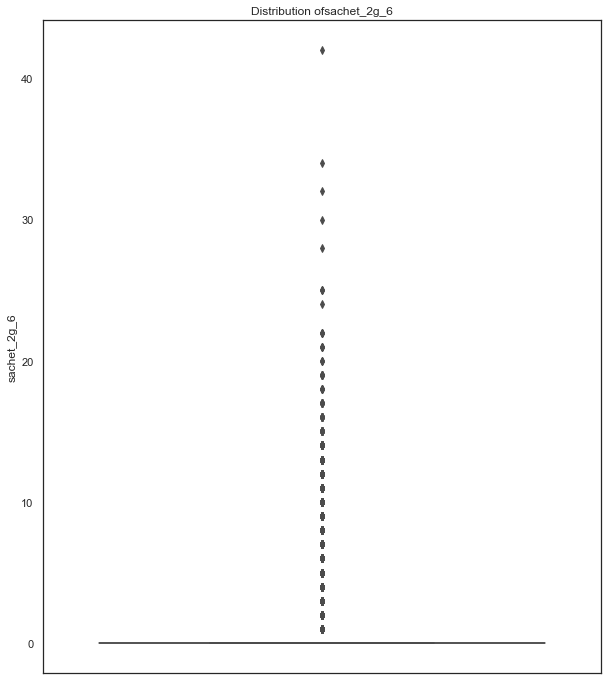

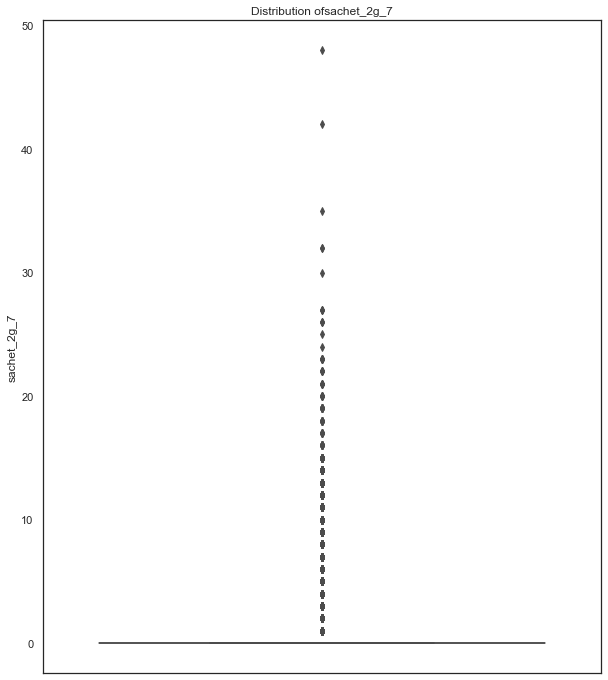

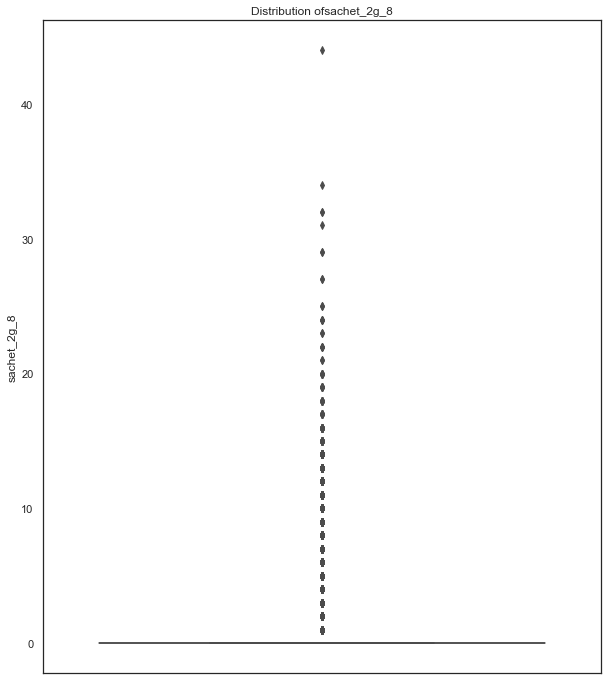

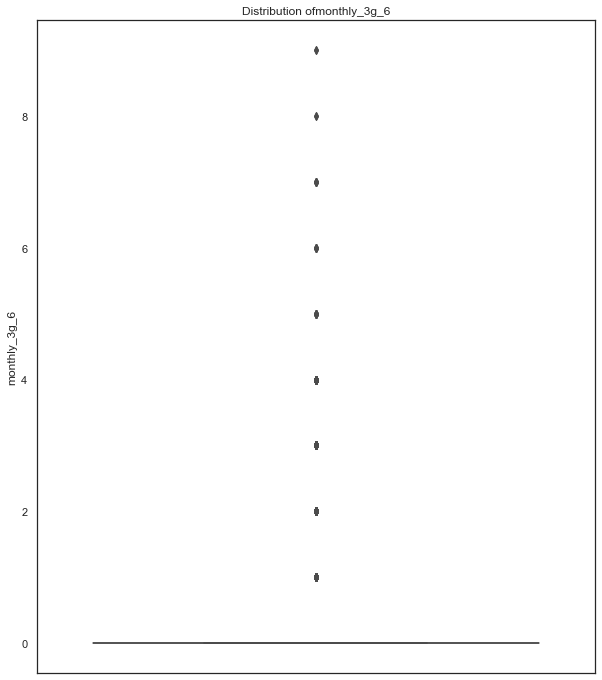

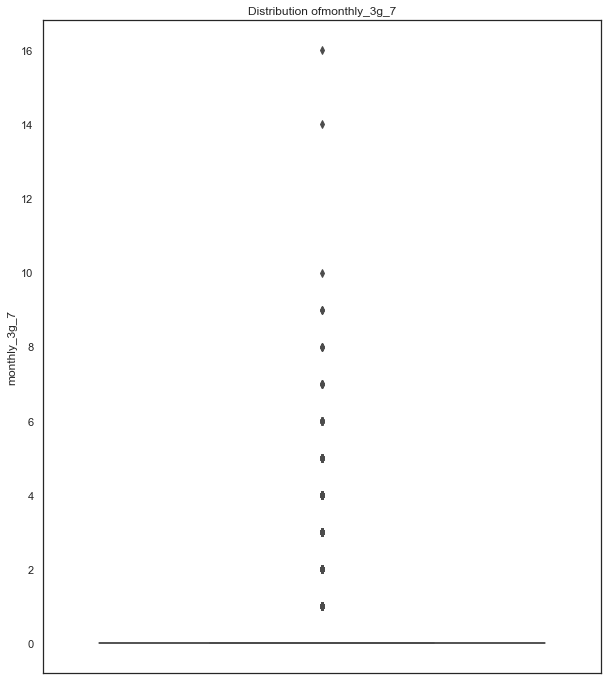

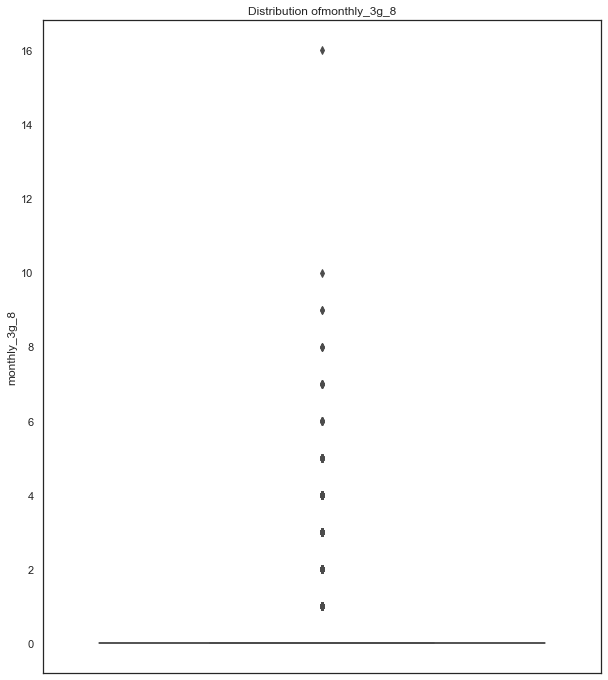

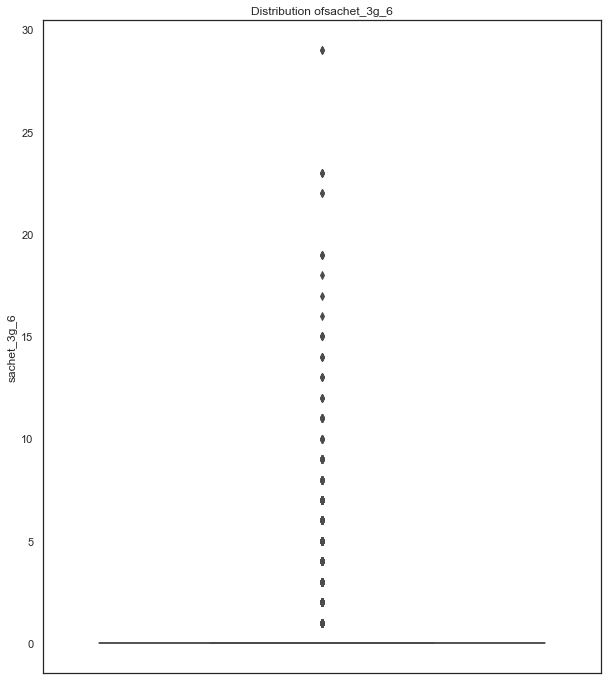

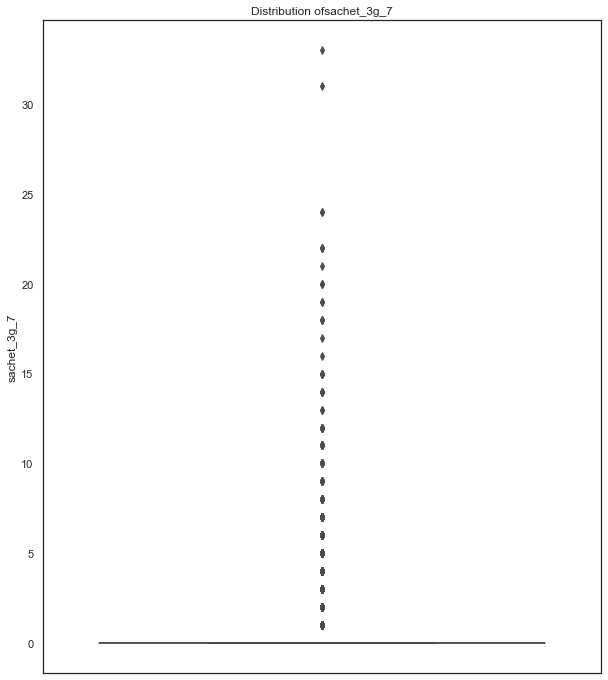

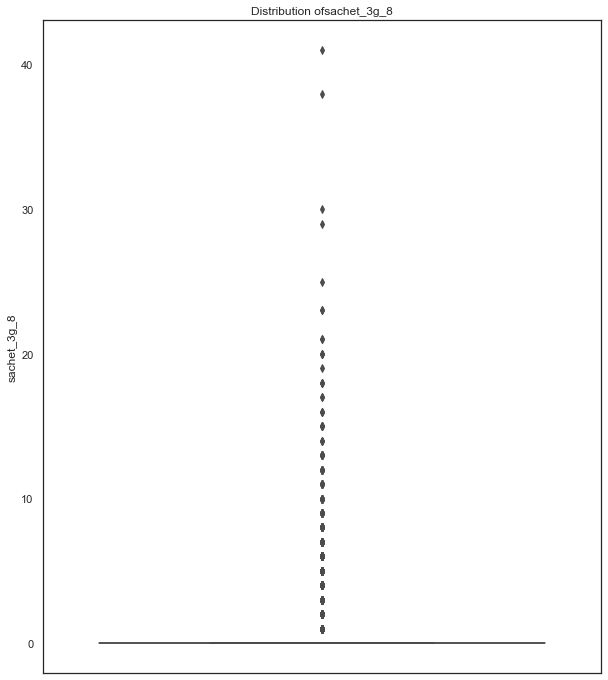

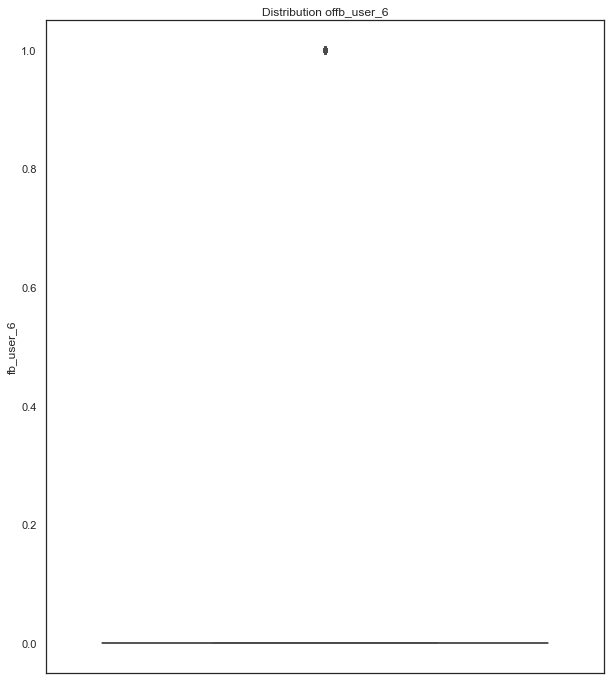

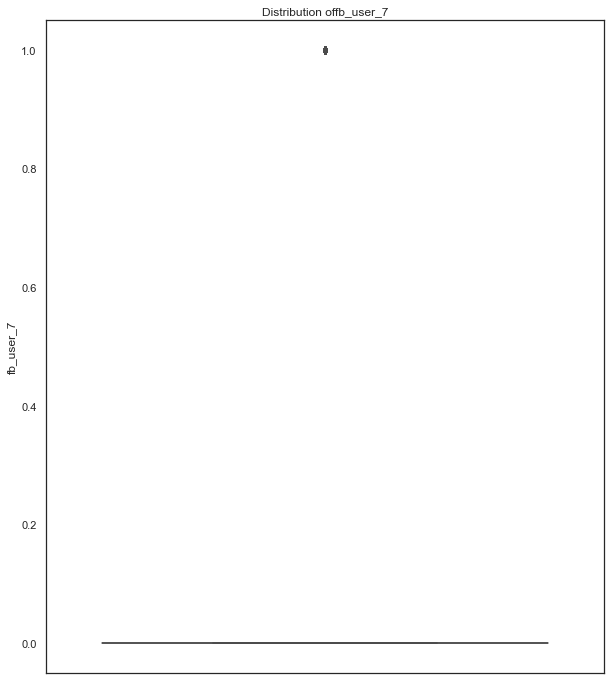

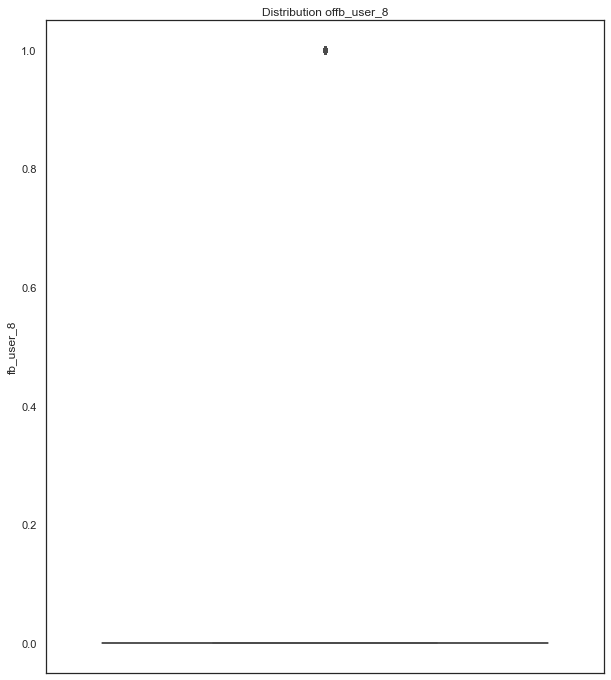

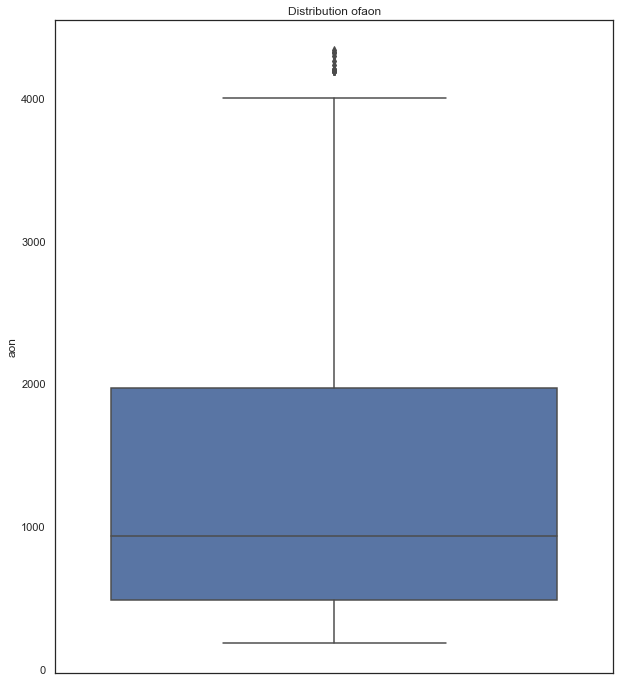

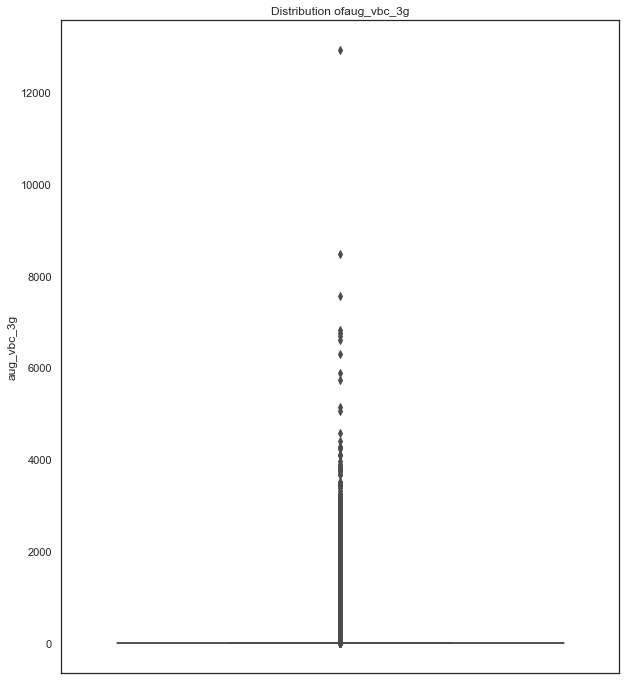

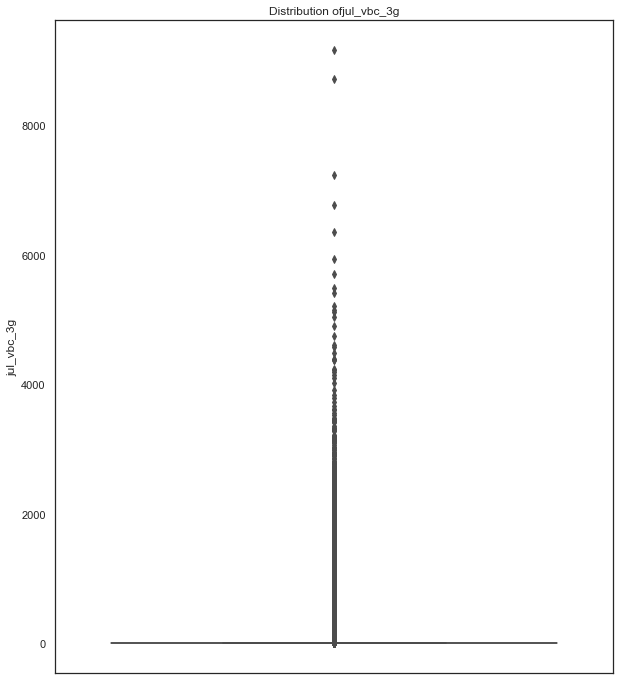

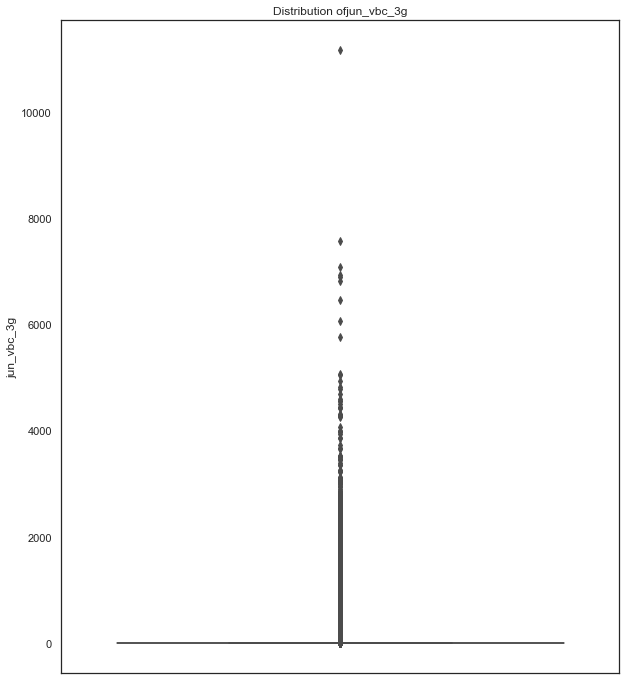

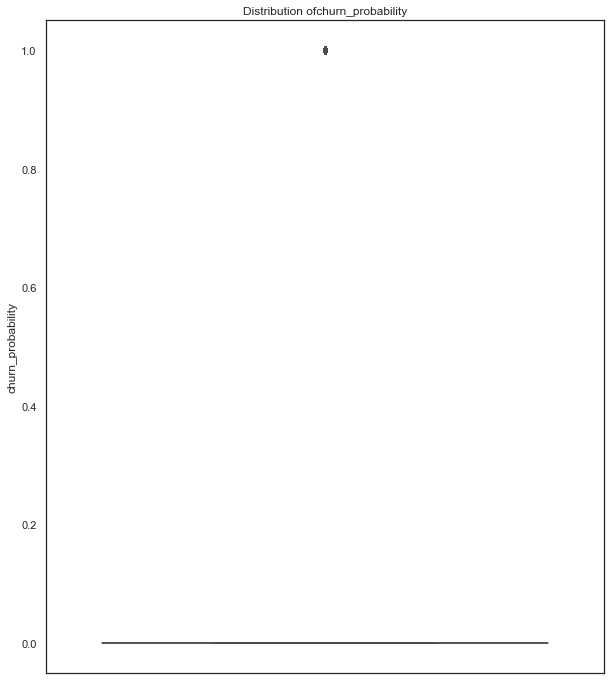

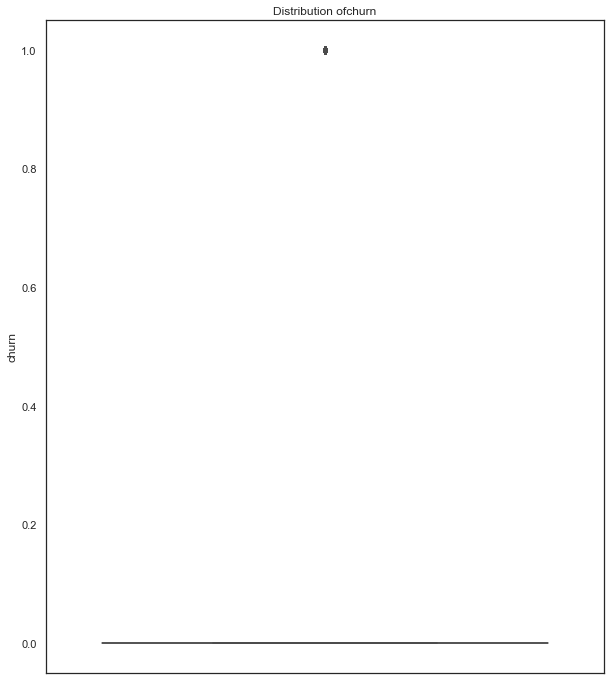

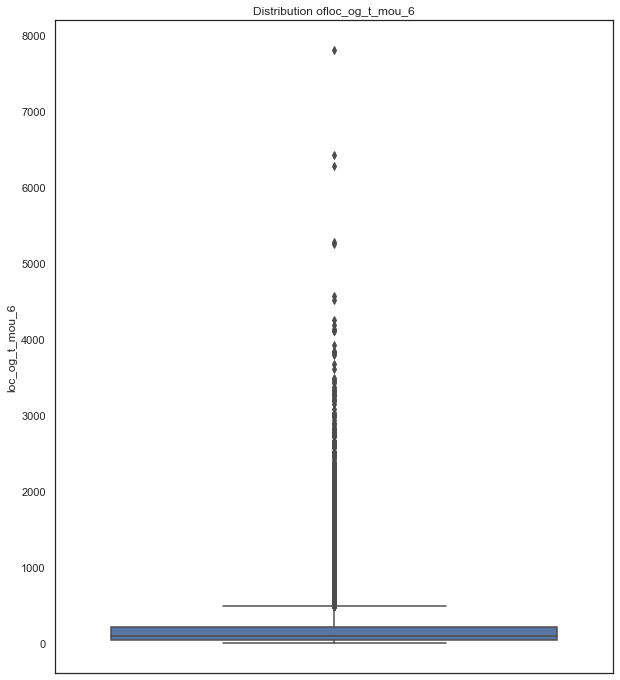

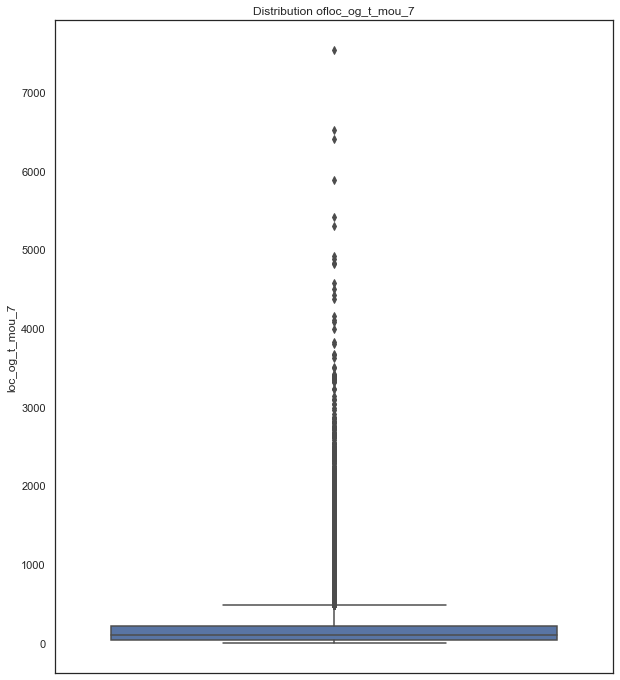

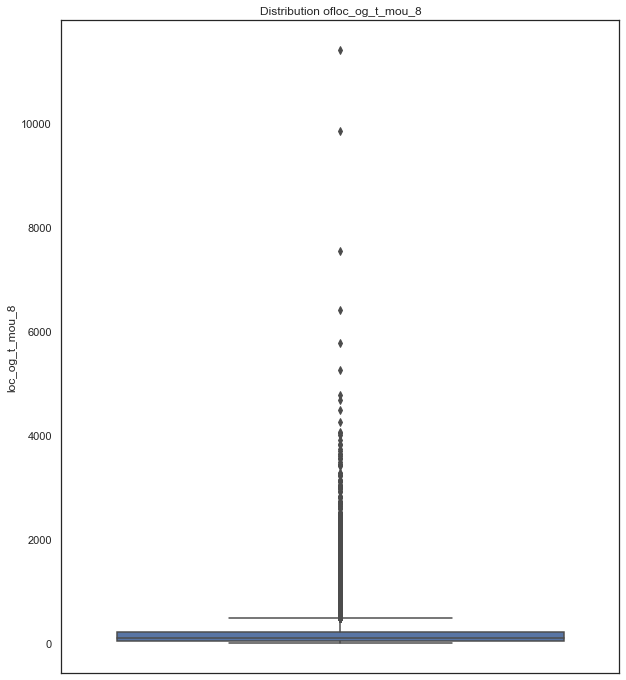

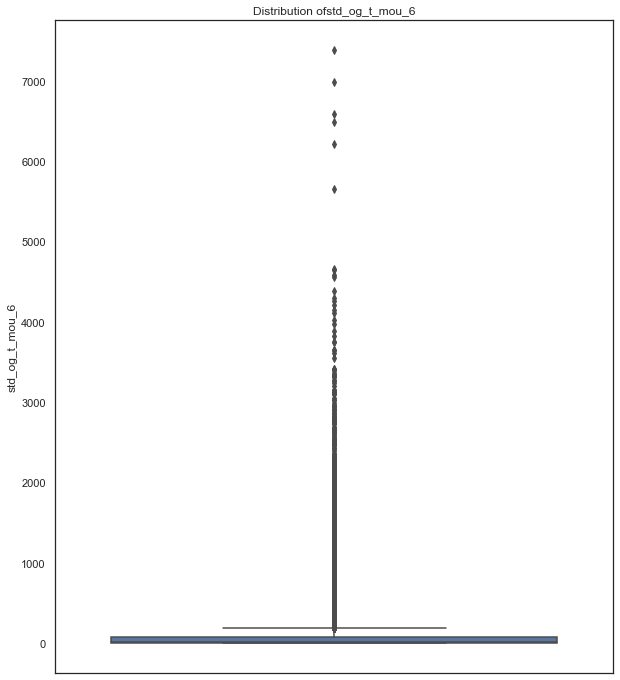

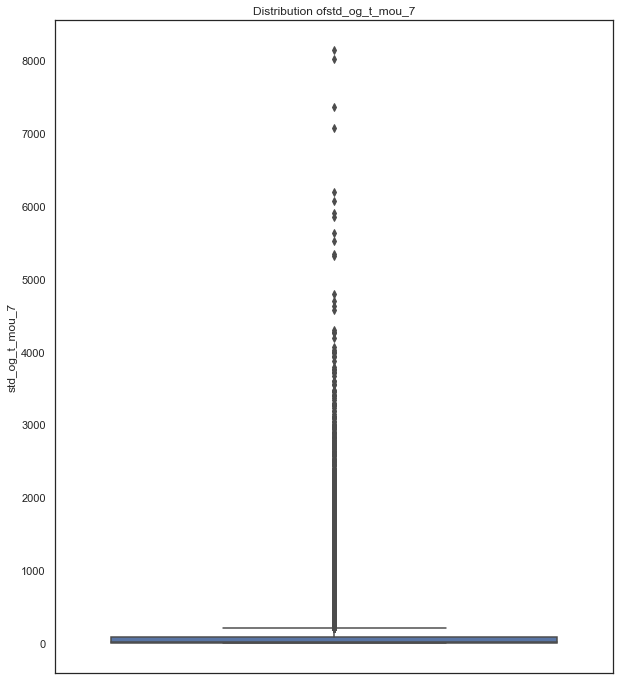

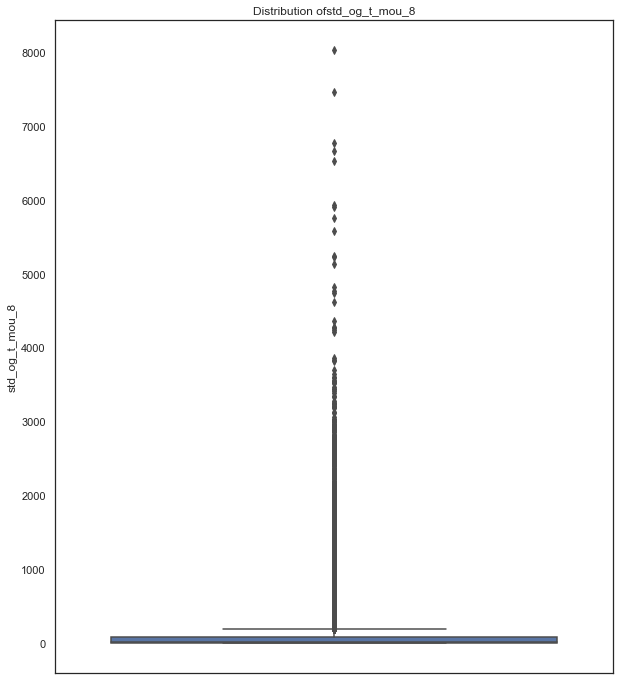

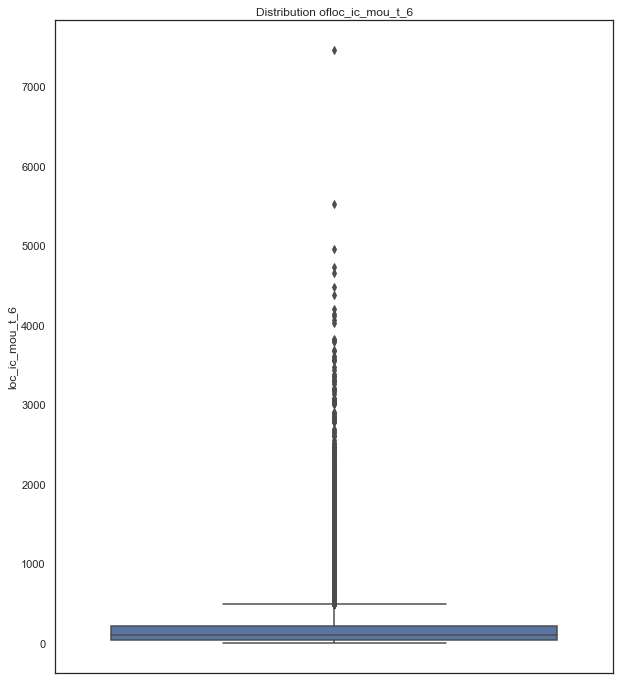

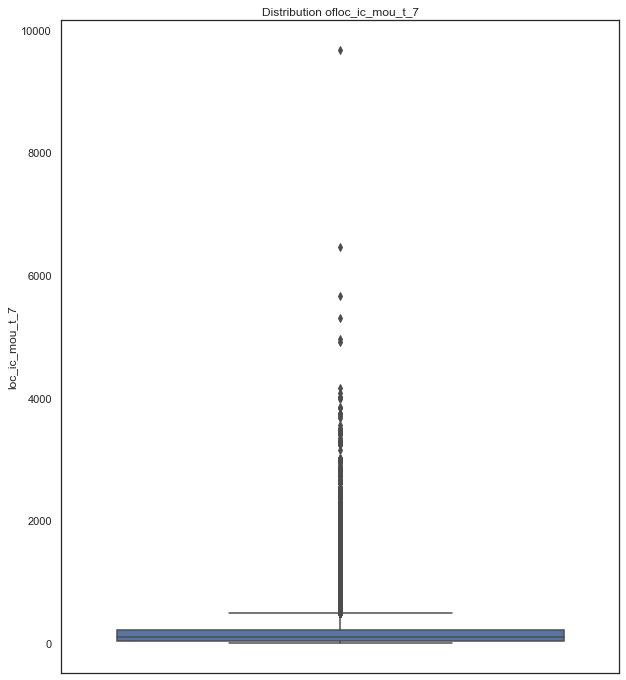

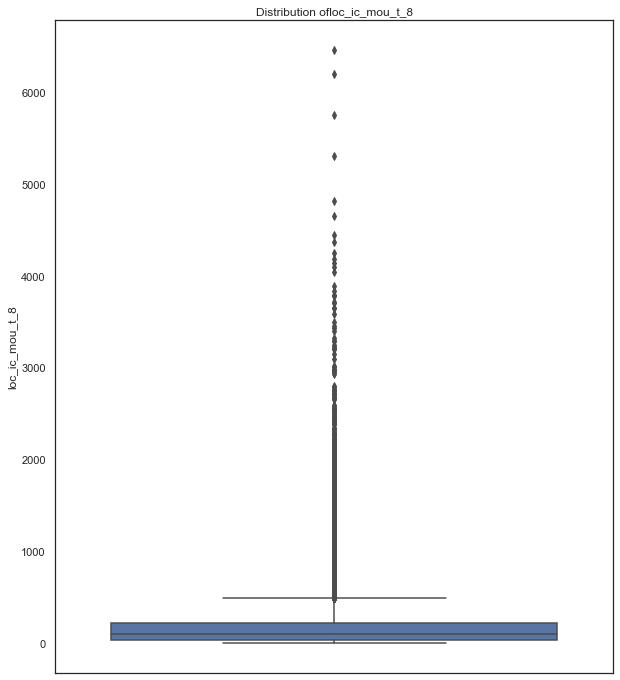

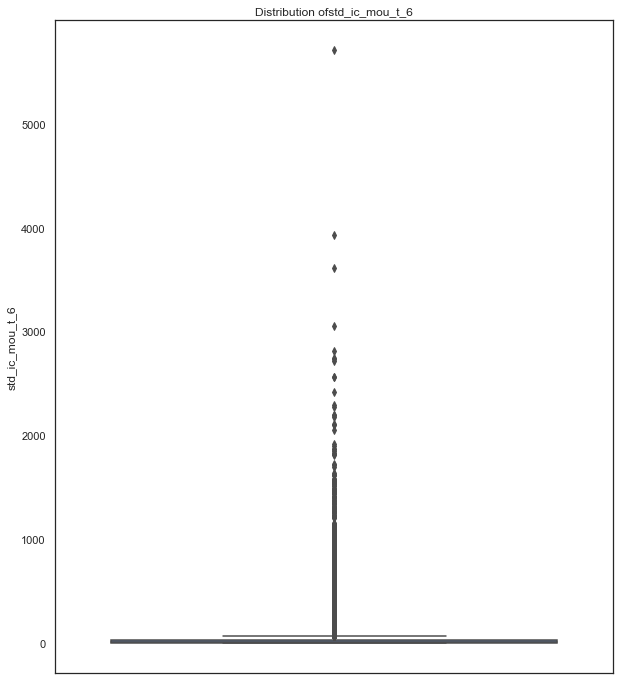

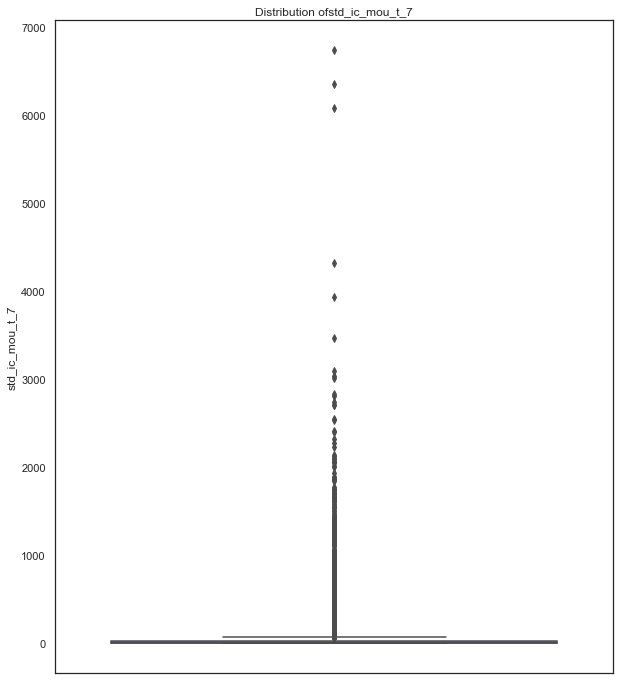

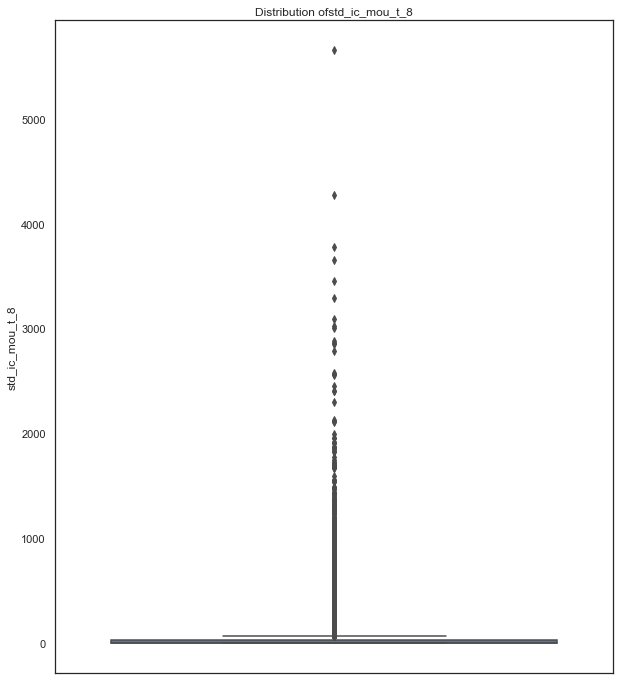

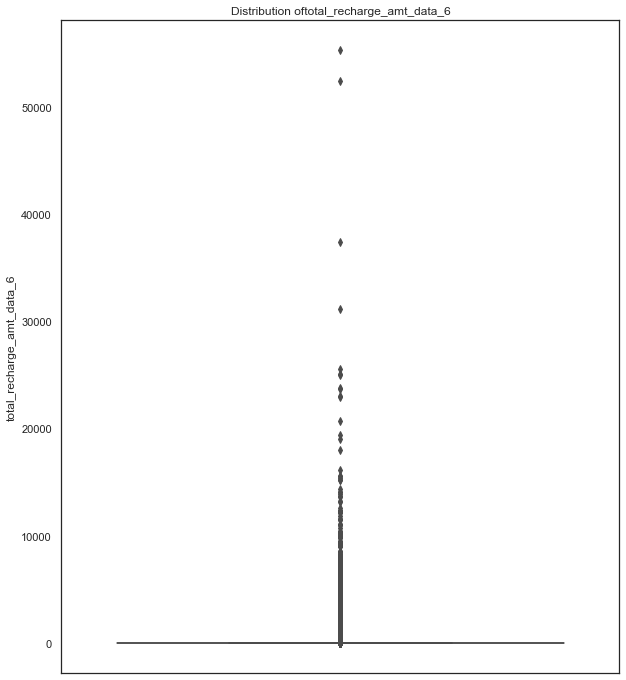

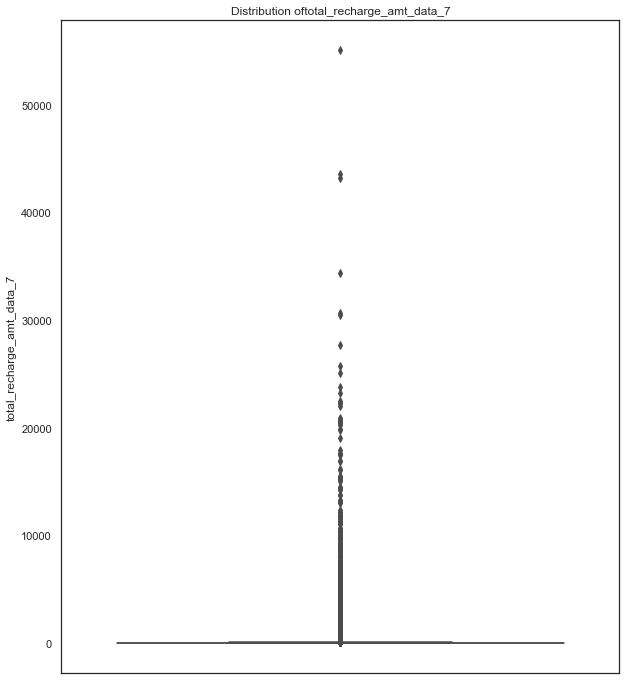

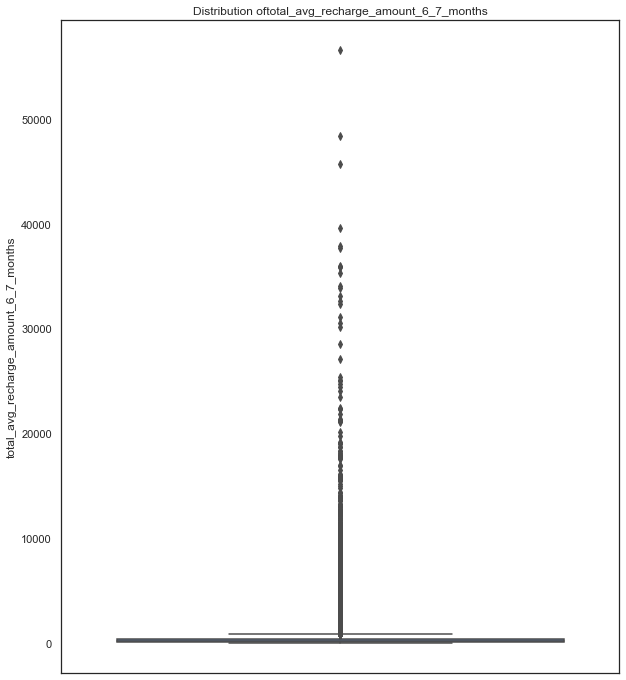

In [187]:

for numeric_variable in df._get_numeric_data():
    plot_box(df,numeric_variable)

#### Bivariate Analysis

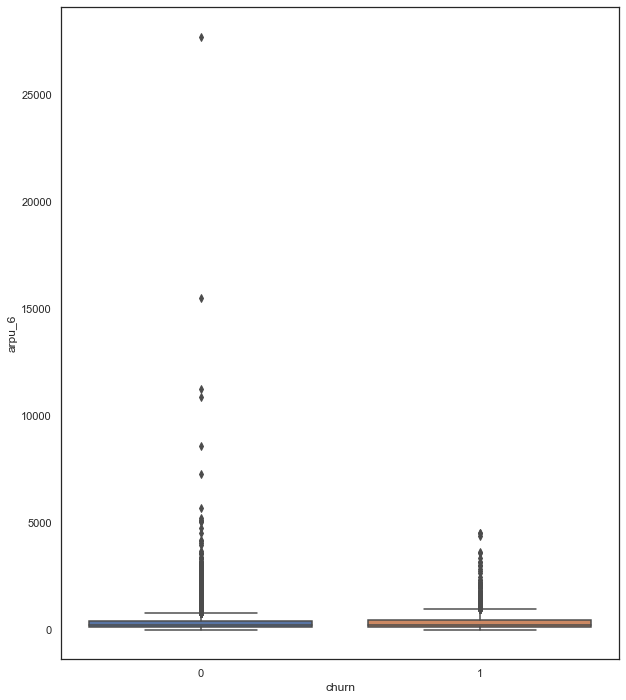

In [188]:
sns.boxplot(x='churn',y='arpu_6',data=df);

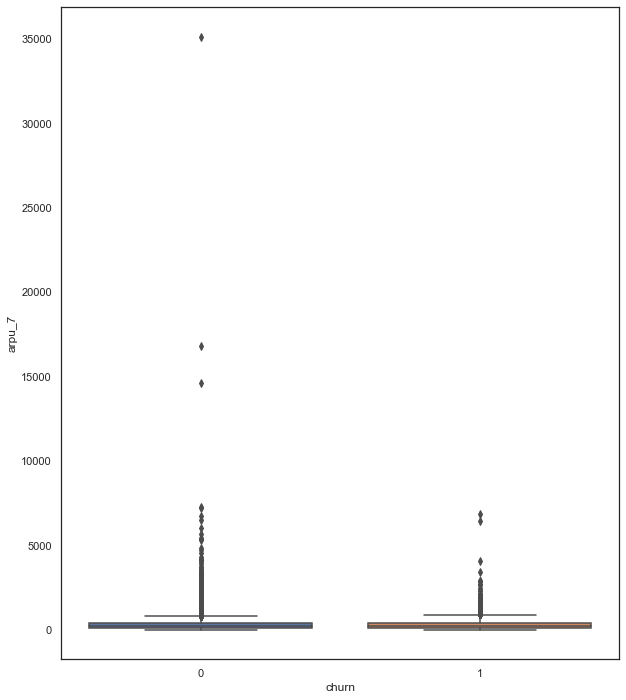

In [189]:
sns.boxplot(x='churn',y='arpu_7',data=df);

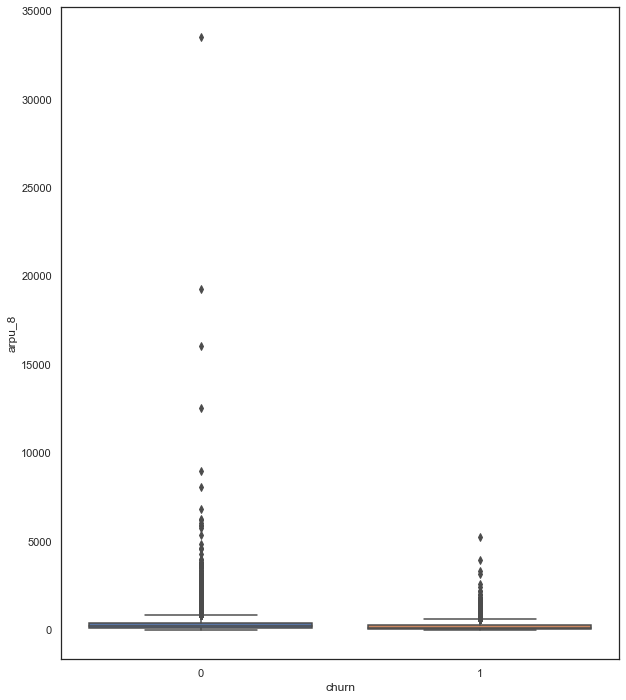

In [190]:
sns.boxplot(x='churn',y='arpu_8',data=df);

**Insights**
* we can see that churned customers have low revenue in 8th month.


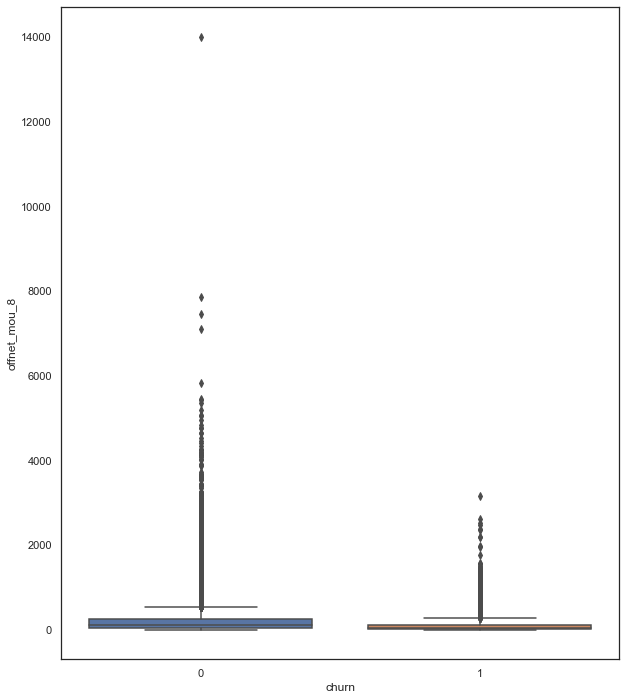

In [191]:
sns.boxplot(x='churn',y='offnet_mou_8',data=df);

In [192]:
avg_rate_pu=df[['arpu_6', 'arpu_7', 'arpu_8']] # arpu6,7,8
internet=df[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']]
roaming=df[['roam_og_mou_6','roam_og_mou_7', 'roam_og_mou_8']]
total_out_going=df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']]


In [193]:
for i in dir():
    if type(globals()[i]) == pd.DataFrame:
        print(i)

X
X_test
X_train
_
_115
_124
_125
_129
_15
_150
_156
_158
_165
_172
_182
_184
_185
_22
_29
_39
_41
_42
_71
_86
_87
_9
_94
__
___
avg_rate_pu
churn
churned_ids
cutoff
dates
df
df1
high_valued_customers
internet
pca_column_frame
pcs_dataframe
roaming
test_df
total_out_going
train_df
y_pred
y_pred_final
y_test_df


In [194]:
avg_rate_pu=df.churn # arpu6,7,8
internet=df.churn
roaming=df.churn
total_out_going=df.churn
avg_rate_pu


0        0
3        0
4        0
5        0
6        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn, Length: 61847, dtype: int64

In [195]:
df=df.fillna(0)

In [196]:
df.filter(regex='og').columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_og_t_mou_6',
       'loc_og_t_mou_7', 'loc_og_t_mou_8', 'std_og_t_mou_6', 'std_og_t_mou_7',
       'std_og_t_mou_8'],
      dtype='object')

In [197]:
#checking if column have outliers 
numeric_columns=[col for col in df.columns]
churn=df[numeric_columns]
churn.describe()


Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
churn=((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).any()

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['churn','id','circle_id','sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8','isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8'])
y=df.churn

In [199]:
#Using standard scaler
scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)


In [200]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

In [201]:
len(X_train.columns)

125

In [202]:
from sklearn.decomposition import PCA
pca = PCA(random_state=30)
pca.fit(X_train)

PCA(random_state=30)

In [203]:
pca.components_

array([[-1.65685537e-19, -7.77156117e-16,  1.11022302e-16, ...,
         1.31232249e-01,  1.33843377e-01,  1.61236451e-01],
       [-7.39359542e-20, -1.66533454e-16, -2.49800181e-16, ...,
        -7.87872843e-02, -7.87017711e-02, -6.08458461e-02],
       [-2.51620416e-20, -2.77555756e-17, -2.48200982e-16, ...,
        -3.23372663e-02, -4.08257566e-02, -5.45655109e-02],
       ...,
       [-0.00000000e+00,  1.31527423e-01, -5.00088463e-02, ...,
        -2.20748648e-03, -5.09657425e-03,  6.89760661e-03],
       [-0.00000000e+00,  2.41034432e-01, -9.29993374e-02, ...,
         2.44497748e-03,  5.64488589e-03, -7.63968115e-03],
       [ 9.99998602e-01,  5.69052594e-04,  1.48562528e-03, ...,
        -1.12179876e-04, -2.58997314e-04,  3.50522036e-04]])

In [204]:
pca.explained_variance_ratio_

array([1.65957109e-01, 1.11673098e-01, 7.41210703e-02, 5.51277121e-02,
       4.27868621e-02, 3.78294241e-02, 2.72686023e-02, 2.64574525e-02,
       2.26801700e-02, 2.15687911e-02, 2.09009387e-02, 1.87109942e-02,
       1.74193612e-02, 1.67776912e-02, 1.64675017e-02, 1.61289182e-02,
       1.59297438e-02, 1.34728362e-02, 1.30919891e-02, 1.24881863e-02,
       1.06133031e-02, 9.76901248e-03, 9.57577155e-03, 9.01607218e-03,
       8.91893190e-03, 8.26981286e-03, 8.01318655e-03, 7.83721098e-03,
       7.73219188e-03, 7.47954104e-03, 6.99048592e-03, 6.82009062e-03,
       6.51229360e-03, 6.45109132e-03, 6.30876745e-03, 6.12978049e-03,
       5.85110759e-03, 5.16389274e-03, 5.01950070e-03, 4.89958364e-03,
       4.74246717e-03, 4.42726938e-03, 4.40755743e-03, 4.35642833e-03,
       4.15903296e-03, 3.94640073e-03, 3.78086890e-03, 3.60263670e-03,
       3.57781519e-03, 3.52333066e-03, 3.45000403e-03, 3.37819735e-03,
       3.19024138e-03, 3.14027614e-03, 2.83223049e-03, 2.74337523e-03,
      

In [205]:
#Taking different PCA components
colnames = list(X_train.columns)
pcs_dataframe = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'PC4':pca.components_[3],'Features':colnames})
pcs_dataframe.head(35)

,PC1,PC2,PC3,PC4,Features
0,-1.656855e-19,-7.393595e-20,-2.516204e-20,-1.919842e-19,loc_og_t2o_mou
1,-7.771561e-16,-1.665335e-16,-2.775558e-17,-2.498002e-16,std_og_t2o_mou
2,1.110223e-16,-2.498002e-16,-2.482010e-16,-3.677614e-16,loc_ic_t2o_mou
3,1.181387e-01,1.303618e-01,-6.656868e-02,-3.129135e-02,arpu_6
4,1.196821e-01,1.310607e-01,-8.177762e-02,-2.951869e-02,arpu_7
5,1.155668e-01,1.235575e-01,-7.165959e-02,-3.544736e-02,arpu_8
6,3.747660e-02,1.464762e-01,-1.228288e-01,7.523744e-03,onnet_mou_6
7,3.900200e-02,1.552385e-01,-1.408926e-01,9.814399e-03,onnet_mou_7
8,3.810356e-02,1.455100e-01,-1.354221e-01,7.943649e-03,onnet_mou_8
9,5.411503e-02,1.528418e-01,-6.618941e-02,-5.918430e-03,offnet_mou_6


In [206]:
var_cumu = np.cumsum(pca.explained_variance_ratio_).round(4)
var_cumu

array([0.166 , 0.2776, 0.3518, 0.4069, 0.4497, 0.4875, 0.5148, 0.5412,
       0.5639, 0.5855, 0.6064, 0.6251, 0.6425, 0.6593, 0.6757, 0.6919,
       0.7078, 0.7213, 0.7344, 0.7469, 0.7575, 0.7672, 0.7768, 0.7858,
       0.7948, 0.803 , 0.811 , 0.8189, 0.8266, 0.8341, 0.8411, 0.8479,
       0.8544, 0.8609, 0.8672, 0.8733, 0.8791, 0.8843, 0.8893, 0.8942,
       0.899 , 0.9034, 0.9078, 0.9122, 0.9163, 0.9203, 0.9241, 0.9277,
       0.9312, 0.9348, 0.9382, 0.9416, 0.9448, 0.9479, 0.9507, 0.9535,
       0.9561, 0.9587, 0.9611, 0.9636, 0.9659, 0.9682, 0.9703, 0.9724,
       0.9745, 0.9763, 0.9781, 0.9799, 0.9813, 0.9828, 0.9843, 0.9855,
       0.9867, 0.9878, 0.9889, 0.9898, 0.9907, 0.9916, 0.9924, 0.9932,
       0.994 , 0.9947, 0.9954, 0.996 , 0.9966, 0.9971, 0.9975, 0.9979,
       0.9983, 0.9986, 0.9989, 0.9992, 0.9994, 0.9996, 0.9997, 0.9999,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
      

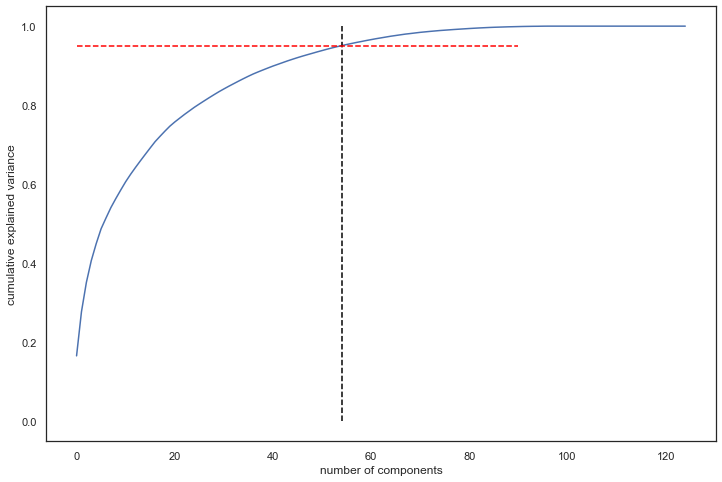

In [207]:
fig = plt.figure(figsize=(12, 8))

plt.plot(var_cumu)

plt.vlines(x=54, ymax=1, ymin=0, colors="black", linestyles="--")
plt.hlines(y=0.95, xmax=90, xmin=0, colors="red", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [209]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(49477, 54)

In [210]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat

array([[ 1.00000000e+00, -9.76597659e-07,  7.69250381e-08, ...,
        -2.63259414e-05, -3.47915728e-05,  2.65979164e-05],
       [-9.76597659e-07,  1.00000000e+00,  2.85036025e-06, ...,
        -4.72736666e-05, -1.34818202e-05,  5.36607975e-05],
       [ 7.69250381e-08,  2.85036025e-06,  1.00000000e+00, ...,
         1.55634402e-06, -1.04064950e-04,  1.08064749e-04],
       ...,
       [-2.63259414e-05, -4.72736666e-05,  1.55634402e-06, ...,
         1.00000000e+00, -2.28574375e-03,  1.76597595e-03],
       [-3.47915728e-05, -1.34818202e-05, -1.04064950e-04, ...,
        -2.28574375e-03,  1.00000000e+00, -5.83219392e-03],
       [ 2.65979164e-05,  5.36607975e-05,  1.08064749e-04, ...,
         1.76597595e-03, -5.83219392e-03,  1.00000000e+00]])

In [211]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(12370, 54)

In [212]:
Logreg= LogisticRegression(class_weight='balanced')
model_pc2 = Logreg.fit(df_train_pca,y_train)

In [213]:
#Making prediction on the test data
pred_probs_test= model_pc2.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'1.00'

In [214]:
pca_column_frame = pcs_dataframe.head(54)
pca_column_frame

,PC1,PC2,PC3,PC4,Features
0,-1.656855e-19,-7.393595e-20,-2.516204e-20,-1.919842e-19,loc_og_t2o_mou
1,-7.771561e-16,-1.665335e-16,-2.775558e-17,-2.498002e-16,std_og_t2o_mou
2,1.110223e-16,-2.498002e-16,-2.482010e-16,-3.677614e-16,loc_ic_t2o_mou
3,1.181387e-01,1.303618e-01,-6.656868e-02,-3.129135e-02,arpu_6
4,1.196821e-01,1.310607e-01,-8.177762e-02,-2.951869e-02,arpu_7
5,1.155668e-01,1.235575e-01,-7.165959e-02,-3.544736e-02,arpu_8
6,3.747660e-02,1.464762e-01,-1.228288e-01,7.523744e-03,onnet_mou_6
7,3.900200e-02,1.552385e-01,-1.408926e-01,9.814399e-03,onnet_mou_7
8,3.810356e-02,1.455100e-01,-1.354221e-01,7.943649e-03,onnet_mou_8
9,5.411503e-02,1.528418e-01,-6.618941e-02,-5.918430e-03,offnet_mou_6


In [215]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
29498,0
8837,0
48534,0
52452,0
24643,0


In [253]:
y_pred= pd.DataFrame(pred_probs_test)

In [254]:
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [255]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)

In [256]:
y_pred_final

,churn,0
0,0,0.000027
1,0,0.000011
2,0,0.000033
3,0,0.000036
4,0,0.000029
...,...,...
12365,0,0.000074
12366,0,0.000033
12367,0,0.000068
12368,0,0.000043


In [257]:
y_pred_final['Churn_Prob']=y_pred_final[0]

In [258]:
y_pred_final=y_pred_final[['churn',"Churn_Prob"]]

In [259]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [260]:
y_pred_final['predicted'].value_counts()

0    11607
1      763
Name: predicted, dtype: int64

In [261]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[11607,     0],
       [    0,   763]])

In [262]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

1.0

In [263]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)


In [264]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    con_mat1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total=sum(sum(con_mat1))
    accuracy = (con_mat1[0,0]+con_mat1[1,1])/total
    sensitivity = con_mat1[0,0]/(con_mat1[0,0]+con_mat1[0,1])
    specificity = con_mat1[1,1]/(con_mat1[1,0]+con_mat1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.061681          0.0          1.0
0.1   0.1  1.000000          1.0          1.0
0.2   0.2  1.000000          1.0          1.0
0.3   0.3  1.000000          1.0          1.0
0.4   0.4  1.000000          1.0          1.0
0.5   0.5  1.000000          1.0          1.0
0.6   0.6  1.000000          1.0          1.0
0.7   0.7  1.000000          1.0          1.0
0.8   0.8  1.000000          1.0          1.0
0.9   0.9  1.000000          1.0          1.0


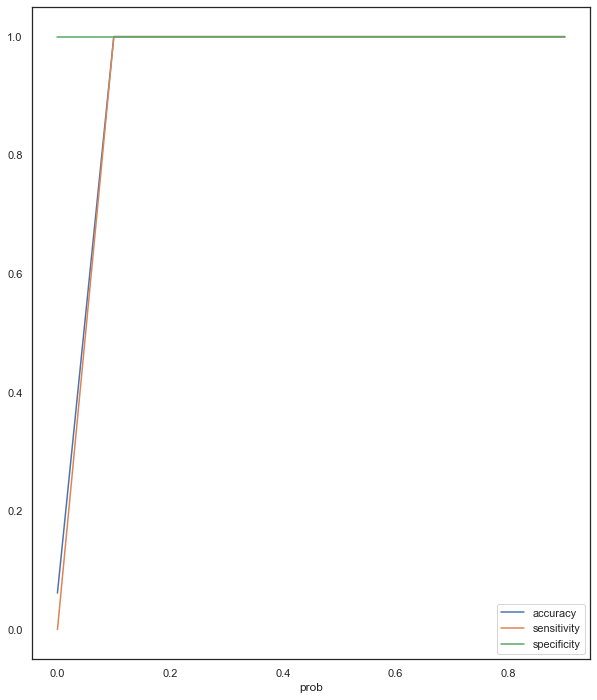

In [265]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff.plot.line(x='prob', y=['accuracy','sensitivity','specificity']);

In [266]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [267]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

1.0

In [268]:
print(metrics.classification_report(y_test,y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11607
           1       1.00      1.00      1.00       763

    accuracy                           1.00     12370
   macro avg       1.00      1.00      1.00     12370
weighted avg       1.00      1.00      1.00     12370



In [269]:
y_pred_final=y_pred_final[['final_predicted']]

In [ ]:
y_pred

In [271]:
y_pred_final.to_csv('solution.csv')